#  Najboljši anime

## Uvod 

Anime se je v zadnjih nekaj letih močno razvil in dosegel tudi srca ljubiteljev serij okrog sveta. K temu so močno pripomogli ponudniki spletnih videotek. Sprva so bili takšni namenjeni izključno animejem (Cruchyroll ali Funimation), vendar pa se v zadnjih letih pojavlja trend, da anime ponujano tudi ostali velikani pretočnih storitev (Netflix). Seveda si vsak navdušenec (aka. anime fan) na svoji poti skozi svet animejev oblikuje nek prepoznaven okus in s tem ni nič narobe. Pa vseeno se pojavijo animeji, ki stopijo korak dlje bodisi v produkciji ali pa vsebini. Le-ti so ponavadi večkrat omenjeni, ko pride do pogovorov o animejih in večkrat se znajdejo na "Top listah" povprečnega gledalca. 
Sam bom analiziral podatke iz najbolj popularne spletne strani z anime informacijami My Anime List (MAL). To kar je IMDB filmom je MAL animejem. Analiza je namenjen vsem: izkušenim navdušencem animejev, da se lahko naslednjič pohvalijo ostalim, da je prav njihova "top lista" objektivno najboljša in da imajo vsi ostali slab okus; navdušencem začetnikom, ki jih samo zanima katere animeje se bolj splača gledati, da bodo bolj gotovo prinesli zadovoljstvo ali pa navdušencem, ki bi radi pregledali vse najbolje ocenjene in si tako zagotovili vlogo v vsakem anime pogovoru.

#### Priprava

In [470]:
import pandas as pd
import os.path
import re
import math

pd.options.display.max_rows = 50


%matplotlib inline

pot_do_anime = os.path.join("anime.csv")
anime = pd.read_csv(pot_do_anime)
zanri = pd.read_csv("zanri.csv")

In [471]:
anime

name     id  \
0                                                   Cowboy Bebop      1   
1      Cowboy Bebop: Tengoku no Tobira (Cowboy Bebop: The Movie)      5   
2                                                         Trigun      6   
3                                             Witch Hunter Robin      7   
4                        Bouken Ou Beet (Beet the Vandel Buster)      8   
...                                                          ...    ...   
17278                                      Cyber Weapon Z aka(?)  43019   
17279                                   CYaZALEA☆Kiss☆DADANDAAAN  43041   
17280                                 Yami Yami (September 2012)  43043   
17281                                    Unbelievable Space Love  43044   
17282                                        Hikari: Be My Light  43045   

       episodes            status         aired          studio    source  \
0          26.0   Finished Airing   Apr 3, 1998         Sunrise  Original   
1           1.0   Finished Airing   Sep 1, 2001           Bones  Original   
2          26.0   Finished Airing   Apr 1, 1998        Madhouse     Manga   
3          26.0   Finished Airing   Jul 2, 2002         Sunrise  Original   
4          52.0   Finished Airing  Sep 30, 2004  Toei Animation     Manga   
...         ...               ...           ...             ...       ...   
17278       1.0   Finished Airing           NaN             NaN     Manga   
17279       1.0   Finished Airing   May 8, 2020             NaN     Other   
17280       1.0   Finished Airing  Sep 26, 2012             NaN  Original   
17281      10.0   Finished Airing  Jul 17, 2018             NaN  Original   
17282       NaN  Currently Airing  Sep 18, 2019             NaN  Original   

                               rating  score finished airing    year  season  
0      R - 17+ (violence & profanity)   8.79    Apr 24, 1999  1998.0  Spring  
1      R - 17+ (violence & profanity)   8.39             NaN  2001.0  Summer  
2           PG-13 - Teens 13 or older   8.24    Sep 30, 1998  1998.0  Spring  
3           PG-13 - Teens 13 or older   7.28    Dec 24, 2002  2002.0  Summer  
4                       PG - Children   6.98    Sep 29, 2005  2004.0  Summer  
...                               ...    ...             ...     ...     ...  
17278                            None    NaN             NaN     NaN     NaN  
17279       PG-13 - Teens 13 or older    NaN             NaN  2020.0  Spring  
17280                    G - All Ages    NaN             NaN  2012.0  Summer  
17281       PG-13 - Teens 13 or older    NaN             NaN  2018.0  Summer  
17282       PG-13 - Teens 13 or older    NaN      2019 to, ?  2019.0  Summer  

[17283 rows x 12 columns]

In [472]:
zanri

id       genre
0          1      Action
1          1   Adventure
2          1      Comedy
3          1       Drama
4          1      Sci-Fi
...      ...         ...
45482  43041       Music
45483  43041      Parody
45484  43043       Music
45485  43044     Romance
45486  43045  Shounen Ai

[45487 rows x 2 columns]

V zvezek za analizo sem vpeljal knjižnici pandas in re za obdelavo podatkov ter os.path za lažji dostop do podatkov
Prav tako sem nastavil nekaj zadev, da bo vse skupaj bolje pregledno in pa naložil podatke.


## Analiza podatkov

Glavni indikator tega, kako dober je anime je ocena ("score"). MAL ponuja uporabnikom, da sami ocenijo anime in na podlagi teh glasov in vseh glasov iz spletne strani MAL generira oceno s postopkom "weighted rank". 

Formula je sledeča:
\begin{equation}
WR (A) = \frac{v S + m C }{v + m}
\end{equation}
kjer:

$v$ - število uporabnikov, ki je glasovalo za anime A ($\ast$),
$S$ - povprešna ocena uporabnikov animeja A,
$m$ - minimalno število glasov, ki je potrebno, da se ocena sploh izračuna,
$C$ - povprečna ocena vseh Anime in Manga podatkov s strani MAL

$\ast$ - upošteva se samo glasove računov, ki so pogledali vsaj 20% serije

Če anime nima dovolj glasov nima ocene. Zato bom takšne izločil iz analize.

In [473]:
anime = anime.dropna(subset=["score", "studio", "year"]).sort_values("score", ascending=False)

anime["year"] = anime["year"].astype("Int64")
anime["episodes"] = anime["episodes"].astype("Int64")


In [474]:
anime

name     id  episodes  \
3946                      Fullmetal Alchemist: Brotherhood   5114        64   
5647                                           Steins;Gate   9253        24   
9813                           Gintama° (Gintama Season 4)  28977        51   
6431              Hunter x Hunter (2011) (Hunter x Hunter)  11061       148   
741   Ginga Eiyuu Densetsu (Legend of the Galactic Heroes)    820       110   
...                                                    ...    ...       ...   
9804                                        Vampire Holmes  28929        12   
2563                                        Panzer Dragoon   2792         1   
1215             Soujuu Senshi Psychic Wars (Psychic Wars)   1345         1   
4322                           Abunai Sisters: Koko & Mika   5877        10   
387                  Hametsu no Mars (Mars of Destruction)    413         1   

               status         aired                 studio        source  \
3946  Finished Airing   Apr 5, 2009                  Bones         Manga   
5647  Finished Airing   Apr 6, 2011              White Fox  Visual novel   
9813  Finished Airing   Apr 8, 2015  Bandai Namco Pictures         Manga   
6431  Finished Airing   Oct 2, 2011               Madhouse         Manga   
741   Finished Airing   Jan 8, 1988              Magic Bus         Novel   
...               ...           ...                    ...           ...   
9804  Finished Airing   Apr 4, 2015         Studio! Cucuri          Game   
2563  Finished Airing  Oct 25, 1996         Production I.G          Game   
1215  Finished Airing  Feb 22, 1991         Toei Animation       Unknown   
4322  Finished Airing  Jan 15, 2009         Production I.G      Original   
387   Finished Airing   Jul 6, 2005              WAO World  Visual novel   

                              rating  score finished airing  year  season  
3946  R - 17+ (violence & profanity)   9.22     Jul 4, 2010  2009  Spring  
5647       PG-13 - Teens 13 or older   9.12    Sep 14, 2011  2011  Spring  
9813       PG-13 - Teens 13 or older   9.11    Mar 30, 2016  2015  Spring  
6431       PG-13 - Teens 13 or older   9.11    Sep 24, 2014  2011    Fall  
741   R - 17+ (violence & profanity)   9.10    Mar 17, 1997  1988  Winter  
...                              ...    ...             ...   ...     ...  
9804       PG-13 - Teens 13 or older   3.39    Jun 20, 2015  2015  Spring  
2563       PG-13 - Teens 13 or older   3.31             NaN  1996    Fall  
1215                R+ - Mild Nudity   3.14             NaN  1991  Winter  
4322                R+ - Mild Nudity   2.51     Mar 5, 2009  2009  Winter  
387   R - 17+ (violence & profanity)   2.24             NaN  2005  Summer  

[8592 rows x 12 columns]

### Najbolši anime

Pa si poglejmo najprej, kateri animeji spadajo v sam vrh, nato pa bomo še malo analizirali.

In [475]:
anime.head(20)

name  \
3946                                     Fullmetal Alchemist: Brotherhood   
5647                                                          Steins;Gate   
9813                                          Gintama° (Gintama Season 4)   
6431                             Hunter x Hunter (2011) (Hunter x Hunter)   
741                  Ginga Eiyuu Densetsu (Legend of the Galactic Heroes)   
5965                                          Gintama' (Gintama Season 2)   
14687                                  Shingeki no Kyojin Season 3 Part 2   
7208                             Gintama': Enchousen (Gintama: Enchousen)   
12700  3-gatsu no Lion 2nd Season (March Comes In Like A Lion 2nd Season)   
9786                                      Koe no Katachi (A Silent Voice)   
11148                                         Kimi no Na wa. (Your Name.)   
12061                                         Gintama. (Gintama Season 5)   
833                                                               Gintama   
7196                Gintama Movie 2: Kanketsu-hen - Yorozuya yo Eien Nare   
3512                         Clannad: After Story (Clannad ~After Story~)   
12734          Owarimonogatari 2nd Season (Owarimonogatari Second Season)   
2649                                   Code Geass: Hangyaku no Lelouch R2   
11460          Haikyuu!!: Karasuno Koukou vs. Shiratorizawa Gakuen Koukou   
14053                                                   Mob Psycho 100 II   
14040                    Gintama.: Shirogane no Tamashii-hen - Kouhan-sen   

          id  episodes           status         aired                 studio  \
3946    5114        64  Finished Airing   Apr 5, 2009                  Bones   
5647    9253        24  Finished Airing   Apr 6, 2011              White Fox   
9813   28977        51  Finished Airing   Apr 8, 2015  Bandai Namco Pictures   
6431   11061       148  Finished Airing   Oct 2, 2011               Madhouse   
741      820       110  Finished Airing   Jan 8, 1988              Magic Bus   
5965    9969        51  Finished Airing   Apr 4, 2011                Sunrise   
14687  38524        10  Finished Airing  Apr 29, 2019             Wit Studio   
7208   15417        13  Finished Airing   Oct 4, 2012                Sunrise   
12700  35180        22  Finished Airing  Oct 14, 2017                  Shaft   
9786   28851         1  Finished Airing  Sep 17, 2016        Kyoto Animation   
11148  32281         1  Finished Airing  Aug 26, 2016       CoMix Wave Films   
12061  34096        12  Finished Airing   Jan 9, 2017  Bandai Namco Pictures   
833      918       201  Finished Airing   Apr 4, 2006                Sunrise   
7196   15335         1  Finished Airing   Jul 6, 2013                Sunrise   
3512    4181        24  Finished Airing   Oct 3, 2008        Kyoto Animation   
12734  35247         7  Finished Airing  Aug 12, 2017                  Shaft   
2649    2904        25  Finished Airing   Apr 6, 2008                Sunrise   
11460  32935        10  Finished Airing   Oct 8, 2016         Production I.G   
14053  37510        13  Finished Airing   Jan 7, 2019                  Bones   
14040  37491        14  Finished Airing   Jul 9, 2018  Bandai Namco Pictures   

             source                          rating  score finished airing  \
3946          Manga  R - 17+ (violence & profanity)   9.22     Jul 4, 2010   
5647   Visual novel       PG-13 - Teens 13 or older   9.12    Sep 14, 2011   
9813          Manga       PG-13 - Teens 13 or older   9.11    Mar 30, 2016   
6431          Manga       PG-13 - Teens 13 or older   9.11    Sep 24, 2014   
741           Novel  R - 17+ (violence & profanity)   9.10    Mar 17, 1997   
5965          Manga       PG-13 - Teens 13 or older   9.08    Mar 26, 2012   
14687         Manga  R - 17+ (violence & profanity)   9.07     Jul 1, 2019   
7208          Manga       PG-13 - Teens 13 or older   9.04    Mar 28, 2013   
12700         Manga       PG-13 - Teens 13 or older   9.02    Mar 31

Vidimo, da se en naslov ponovi večkrat, saj MAL tretira različne sezone istega animeja, kot različne animeje. Ročno bom odstranil take, ki se ponovijo

In [476]:
Top_no_gintama_duplicates = anime[(anime["name"].str.contains("Gintama", re.IGNORECASE) == False) | (anime["name"].str.contains("Gintama Season 4"))]
Top_no_gintama_duplicates.head(20)

name  \
3946                                     Fullmetal Alchemist: Brotherhood   
5647                                                          Steins;Gate   
9813                                          Gintama° (Gintama Season 4)   
6431                             Hunter x Hunter (2011) (Hunter x Hunter)   
741                  Ginga Eiyuu Densetsu (Legend of the Galactic Heroes)   
14687                                  Shingeki no Kyojin Season 3 Part 2   
12700  3-gatsu no Lion 2nd Season (March Comes In Like A Lion 2nd Season)   
9786                                      Koe no Katachi (A Silent Voice)   
11148                                         Kimi no Na wa. (Your Name.)   
3512                         Clannad: After Story (Clannad ~After Story~)   
12734          Owarimonogatari 2nd Season (Owarimonogatari Second Season)   
2649                                   Code Geass: Hangyaku no Lelouch R2   
11460          Haikyuu!!: Karasuno Koukou vs. Shiratorizawa Gakuen Koukou   
14053                                                   Mob Psycho 100 II   
176                         Sen to Chihiro no Kamikakushi (Spirited Away)   
10952                                    Kizumonogatari III: Reiketsu-hen   
15961         Kaguya-sama wa Kokurasetai?: Tensai-tachi no Renai Zunousen   
0                                                            Cowboy Bebop   
7521                                     Monogatari Series: Second Season   
13670                    Made in Abyss Movie 3: Fukaki Tamashii no Reimei   

          id  episodes           status         aired                 studio  \
3946    5114        64  Finished Airing   Apr 5, 2009                  Bones   
5647    9253        24  Finished Airing   Apr 6, 2011              White Fox   
9813   28977        51  Finished Airing   Apr 8, 2015  Bandai Namco Pictures   
6431   11061       148  Finished Airing   Oct 2, 2011               Madhouse   
741      820       110  Finished Airing   Jan 8, 1988              Magic Bus   
14687  38524        10  Finished Airing  Apr 29, 2019             Wit Studio   
12700  35180        22  Finished Airing  Oct 14, 2017                  Shaft   
9786   28851         1  Finished Airing  Sep 17, 2016        Kyoto Animation   
11148  32281         1  Finished Airing  Aug 26, 2016       CoMix Wave Films   
3512    4181        24  Finished Airing   Oct 3, 2008        Kyoto Animation   
12734  35247         7  Finished Airing  Aug 12, 2017                  Shaft   
2649    2904        25  Finished Airing   Apr 6, 2008                Sunrise   
11460  32935        10  Finished Airing   Oct 8, 2016         Production I.G   
14053  37510        13  Finished Airing   Jan 7, 2019                  Bones   
176      199         1  Finished Airing  Jul 20, 2001          Studio Ghibli   
10952  31758         1  Finished Airing   Jan 6, 2017                  Shaft   
15961  40591        12  Finished Airing  Apr 11, 2020           A-1 Pictures   
0          1        26  Finished Airing   Apr 3, 1998                Sunrise   
7521   17074        26  Finished Airing   Jul 7, 2013                  Shaft   
13670  36862         1  Finished Airing  Jan 17, 2020          Kinema Citrus   

             source                          rating  score finished airing  \
3946          Manga  R - 17+ (violence & profanity)   9.22     Jul 4, 2010   
5647   Visual novel       PG-13 - Teens 13 or older   9.12    Sep 14, 2011   
9813          Manga       PG-13 - Teens 13 or older   9.11    Mar 30, 2016   
6431          Manga       PG-13 - Teens 13 or older   9.11    Sep 24, 2014   
741           Novel  R - 17+ (violence & profanity)   9.10    Mar 17, 1997   
14687         Manga  R - 17+ (violence & profanity)   9.07     Jul 1, 2019   
12700         Manga       PG-13 - Teens 13 or older   9.02    Mar 31, 2018   
9786          Manga       PG-13 - Teens 13 or older   9.01             NaN   
11148      Original       PG-13 - Teens 13 or older   9.00          

Torej najbolje ocenjen anime vseh časov je očino *Fullmetal Alchemist: Brotherhood*. Opazimo, da so vsi v prvih 20 že zaključenih. Poglejmo še za tiste, ki prihajajo.

In [477]:
Airing.head(10)

name     id  episodes  \
16048                                    Tian Guan Ci Fu  40730        11   
16075                   Haikyuu!!: To the Top 2nd Season  40776        12   
11                                             One Piece     21      <NA>   
16013                                 Kingdom 3rd Season  40682      <NA>   
16061                                Jujutsu Kaisen (TV)  40748        24   
15660    Golden Kamuy 3rd Season (Golden Kamuy Season 3)  40059        12   
14310            Quanzhi Gaoshou 2 (The King's Avatar 2)  37932        12   
211                        Detective Conan (Case Closed)    235      <NA>   
16998                         Douluo Dalu: Xiaowu Juebie  42498      <NA>   
16449  Tonikaku Kawaii (TONIKAWA: Over the Moon For You)  41389      <NA>   

                 status         aired                           studio source  \
16048  Currently Airing  Oct 31, 2020       Haoliners Animation League  Novel   
16075  Currently Airing   Oct 3, 2020                   Production I.G  Manga   
11     Currently Airing  Oct 20, 1999                   Toei Animation  Manga   
16013  Currently Airing   Apr 6, 2020                  Studio Signpost  Manga   
16061  Currently Airing   Oct 3, 2020                            MAPPA  Manga   
15660  Currently Airing   Oct 5, 2020                      Geno Studio  Manga   
14310  Currently Airing  Sep 25, 2020  Colored-Pencil Animation Design  Novel   
211    Currently Airing   Jan 8, 1996                TMS Entertainment  Manga   
16998  Currently Airing  May 23, 2020     Sparkly Key Animation Studio  Novel   
16449  Currently Airing   Oct 3, 2020                       Seven Arcs  Manga   

                               rating  score finished airing  year  season  
16048                            None   8.72     Jan 2, 2021  2020    Fall  
16075       PG-13 - Teens 13 or older   8.52      2020 to, ?  2020    Fall  
11          PG-13 - Teens 13 or older   8.49      1999 to, ?  1999    Fall  
16013  R - 17+ (violence & profanity)   8.42      2020 to, ?  2020  Spring  
16061  R - 17+ (violence & profanity)   8.33      2020 to, ?  2020    Fall  
15660  R - 17+ (violence & profanity)   8.32      2020 to, ?  2020    Fall  
14310       PG-13 - Teens 13 or older   8.21      2020 to, ?  2020  Summer  
211         PG-13 - Teens 13 or older   8.17      1996 to, ?  1996  Winter  
16998       PG-13 - Teens 13 or older   8.13      2020 to, ?  2020  Spring  
16449                            None   7.92      2020 to, ?  2020    Fall

### Najboljši anime po žanrah

Najprej preverimo sploh, koliko žanr MAL priznava.

In [478]:
G = zanri["genre"].unique()
for genre in G:
    display(genre)

'Action'

'Adventure'

'Comedy'

'Drama'

'Sci-Fi'

'Space'

'Mystery'

'Shounen'

'Police'

'Magic'

'Fantasy'

'Sports'

'Josei'

'Romance'

'Cars'

'Seinen'

'Horror'

'Thriller'

'School'

'Ecchi'

'Vampire'

'Military'

'Historical'

'Dementia'

'Mecha'

'Demons'

'Samurai'

'Game'

'Shoujo'

'Harem'

'Music'

'Shoujo Ai'

'Shounen Ai'

'Kids'

'Hentai'

'Parody'

'Yuri'

'Yaoi'

Presenečeno opazimo, da manjka *Slice of Life*, verjetno je bila kje manjša napaka v kodi za ekstraktiranje podatkov in je zato ni :(
    

In [479]:
anime_by_genre = {}
for genre in G:
    anime_by_genre[genre] = zanri[zanri.genre == genre]
    pd.merge(anime, anime_by_genre[genre])

pd.merge(anime, anime_by_genre["Action"])

name     id  \
0                              Fullmetal Alchemist: Brotherhood   5114   
1                                   Gintama° (Gintama Season 4)  28977   
2                      Hunter x Hunter (2011) (Hunter x Hunter)  11061   
3                                   Gintama' (Gintama Season 2)   9969   
4                            Shingeki no Kyojin Season 3 Part 2  38524   
...                                                         ...    ...   
2800  Byston Well Monogatari: Garzey no Tsubasa (Garzey's Wing)   1657   
2801                                                    Gibiate  40074   
2802                                                Wonder Momo  22377   
2803                  Soujuu Senshi Psychic Wars (Psychic Wars)   1345   
2804                                Abunai Sisters: Koko & Mika   5877   

      episodes           status         aired                 studio  \
0           64  Finished Airing   Apr 5, 2009                  Bones   
1           51  Finished Airing   Apr 8, 2015  Bandai Namco Pictures   
2          148  Finished Airing   Oct 2, 2011               Madhouse   
3           51  Finished Airing   Apr 4, 2011                Sunrise   
4           10  Finished Airing  Apr 29, 2019             Wit Studio   
...        ...              ...           ...                    ...   
2800         3  Finished Airing  Sep 21, 1996              J.C.Staff   
2801        12  Finished Airing  Jul 15, 2020           l-a-unch・BOX   
2802         5  Finished Airing   Feb 6, 2014             Graphinica   
2803         1  Finished Airing  Feb 22, 1991         Toei Animation   
2804        10  Finished Airing  Jan 15, 2009         Production I.G   

        source                          rating  score finished airing  year  \
0        Manga  R - 17+ (violence & profanity)   9.22     Jul 4, 2010  2009   
1        Manga       PG-13 - Teens 13 or older   9.11    Mar 30, 2016  2015   
2        Manga       PG-13 - Teens 13 or older   9.11    Sep 24, 2014  2011   
3        Manga       PG-13 - Teens 13 or older   9.08    Mar 26, 2012  2011   
4        Manga  R - 17+ (violence & profanity)   9.07     Jul 1, 2019  2019   
...        ...                             ...    ...             ...   ...   
2800  Original       PG-13 - Teens 13 or older   4.17     Apr 9, 1997  1996   
2801  Original  R - 17+ (violence & profanity)   4.00    Sep 30, 2020  2020   
2802      Game       PG-13 - Teens 13 or older   3.64     Mar 6, 2014  2014   
2803   Unknown                R+ - Mild Nudity   3.14             NaN  1991   
2804  Original                R+ - Mild Nudity   2.51     Mar 5, 2009  2009   

      season   genre  
0     Spring  Action  
1     Spring  Action  
2       Fall  Action  
3     Spring  Action  
4     Spring  Action  
...      ...     ...  
2800  Summer  Action  
2801  Summer  Action  
2802  Winter  Action  
2803  Winter  Action  
2804  Winter  Action  

[2805 rows x 13 columns]

Sedaj pa poglejmo najboljših 10 za vsak žanr posebej.

In [480]:
for genre in sorted(anime_by_genre):
    display(genre)
    merge = pd.merge(anime, anime_by_genre[genre])
    filter_gintama =  merge[(merge["name"].str.contains("Gintama", re.IGNORECASE) == False) | (merge["name"].str.contains("Gintama Season 4"))]
    filter_AoT = filter_gintama[(filter_gintama["name"].str.contains("Shingeki no Kyojin", re.IGNORECASE) == False) | (filter_gintama["name"].str.contains("Shingeki no Kyojin Season 3 Part 2"))]
    filter_SnS = filter_AoT[(filter_AoT["name"].str.contains("Shokugeki no Souma", re.IGNORECASE) == False) | (filter_AoT["score"] == 8.36)]
    filter_demon = filter_SnS[(filter_SnS["name"].str.contains("Natsume Yuujinchou Go", re.IGNORECASE) == False) | (filter_SnS["score"] == 8.68) ]
     
    display(filter_demon[["name", "score"]].head(10))

'Action'

name  score
0                          Fullmetal Alchemist: Brotherhood   9.22
1                               Gintama° (Gintama Season 4)   9.11
2                  Hunter x Hunter (2011) (Hunter x Hunter)   9.11
4                        Shingeki no Kyojin Season 3 Part 2   9.07
9                        Code Geass: Hangyaku no Lelouch R2   8.91
10                                        Mob Psycho 100 II   8.86
12                         Kizumonogatari III: Reiketsu-hen   8.82
14                                             Cowboy Bebop   8.79
15  Fate/stay night Movie: Heaven's Feel - III. Spring Song   8.76
16                        Mononoke Hime (Princess Mononoke)   8.73

'Adventure'

name  score
0                  Fullmetal Alchemist: Brotherhood   9.22
1          Hunter x Hunter (2011) (Hunter x Hunter)   9.11
2     Sen to Chihiro no Kamikakushi (Spirited Away)   8.84
3                                      Cowboy Bebop   8.79
4  Made in Abyss Movie 3: Fukaki Tamashii no Reimei   8.78
5                     Mushishi Zoku Shou 2nd Season   8.77
6                                     Made in Abyss   8.76
7                 Mononoke Hime (Princess Mononoke)   8.73
8     Mushishi Zoku Shou (MUSHI-SHI -Next Passage-)   8.73
9                                      Vinland Saga   8.72

'Cars'

name  score
0                                                            Redline   8.29
1                                              Initial D First Stage   8.28
2                                              Initial D Final Stage   8.25
3                                             Initial D Fourth Stage   8.16
4                                             Initial D Second Stage   8.13
5                                              Initial D Fifth Stage   8.09
6                                              Initial D Third Stage   7.90
7                              New Initial D Movie: Legend 3 - Mugen   7.84
8                                                             Capeta   7.83
9  New Initial D Movie: Legend 2 - Tousou (Initial D Legend 2 Racer)   7.80

'Comedy'

name  score
0                              Fullmetal Alchemist: Brotherhood   9.22
1                                   Gintama° (Gintama Season 4)   9.11
7                  Clannad: After Story (Clannad ~After Story~)   8.96
8    Owarimonogatari 2nd Season (Owarimonogatari Second Season)   8.93
9    Haikyuu!!: Karasuno Koukou vs. Shiratorizawa Gakuen Koukou   8.90
10                                            Mob Psycho 100 II   8.86
13  Kaguya-sama wa Kokurasetai?: Tensai-tachi no Renai Zunousen   8.79
14                                                 Cowboy Bebop   8.79
15                             Monogatari Series: Second Season   8.78
16                Haikyuu!! Second Season (Haikyu!! 2nd Season)   8.77

'Dementia'

name  score
0  Neon Genesis Evangelion: The End of Evangelion   8.51
1                                    Perfect Blue   8.45
2                         Neon Genesis Evangelion   8.31
3                                         Paprika   8.07
4                                            FLCL   8.03
5                         Serial Experiments Lain   8.02
6                Mawaru Penguindrum (Penguindrum)   7.99
7       Higurashi no Naku Koro ni (When They Cry)   7.97
8                               Devilman: Crybaby   7.86
9                                       Mind Game   7.80

'Demons'

name  score
0    Natsume Yuujinchou Shi (Natsume's Book of Friends Season 4)   8.68
1              Kimetsu no Yaiba (Demon Slayer: Kimetsu no Yaiba)   8.67
2   Natsume Yuujinchou Roku (Natsume's Book of Friends Season 6)   8.66
3    Natsume Yuujinchou San (Natsume's Book of Friends Season 3)   8.60
5   Zoku Natsume Yuujinchou (Natsume's Book of Friends Season 2)   8.57
6                       Kimetsu no Yaiba Movie: Mugen Ressha-hen   8.50
7                                 Kenpuu Denki Berserk (Berserk)   8.48
8                   Yuu☆Yuu☆Hakusho (Yu Yu Hakusho: Ghost Files)   8.44
9                                                       Mononoke   8.42
10                  Natsume Yuujinchou Movie: Utsusemi ni Musubu   8.41

'Drama'

name  score
0                                    Fullmetal Alchemist: Brotherhood   9.22
1                Ginga Eiyuu Densetsu (Legend of the Galactic Heroes)   9.10
2                                  Shingeki no Kyojin Season 3 Part 2   9.07
3  3-gatsu no Lion 2nd Season (March Comes In Like A Lion 2nd Season)   9.02
4                                     Koe no Katachi (A Silent Voice)   9.01
5                                         Kimi no Na wa. (Your Name.)   9.00
6                        Clannad: After Story (Clannad ~After Story~)   8.96
7                                  Code Geass: Hangyaku no Lelouch R2   8.91
8          Haikyuu!!: Karasuno Koukou vs. Shiratorizawa Gakuen Koukou   8.90
9                       Sen to Chihiro no Kamikakushi (Spirited Away)   8.84

'Ecchi'

name  score
0                             Saenai Heroine no Sodatekata Fine   8.46
3                            No Game No Life (No Game, No Life)   8.24
5                                                Nisemonogatari   8.18
6                                               Tsukimonogatari   8.15
8                                                  Kill la Kill   8.12
9                                                    Golden Boy   8.02
10                  Nekomonogatari: Kuro (Nekomonogatari Black)   7.99
11                    Nanatsu no Taizai (The Seven Deadly Sins)   7.96
12  Isekai no Seikishi Monogatari (Tenchi Muyo! War on Geminar)   7.87
13                               Saenai Heroine no Sodatekata ♭   7.80

'Fantasy'

name  score
0                         Fullmetal Alchemist: Brotherhood   9.22
1                 Hunter x Hunter (2011) (Hunter x Hunter)   9.11
2                       Shingeki no Kyojin Season 3 Part 2   9.07
3         Made in Abyss Movie 3: Fukaki Tamashii no Reimei   8.78
4                            Mushishi Zoku Shou 2nd Season   8.77
5  Fate/stay night Movie: Heaven's Feel - III. Spring Song   8.76
6                                            Made in Abyss   8.76
7                        Mononoke Hime (Princess Mononoke)   8.73
8            Mushishi Zoku Shou (MUSHI-SHI -Next Passage-)   8.73
9                                     Mushishi (Mushi-Shi)   8.70

'Game'

name  score
0  3-gatsu no Lion 2nd Season (March Comes In Like A Lion 2nd Season)   9.02
1                                                       Chihayafuru 3   8.54
2                        3-gatsu no Lion (March comes in like a lion)   8.44
3                                                       Chihayafuru 2   8.44
4                                               No Game No Life: Zero   8.37
5  Gyakkyou Burai Kaiji: Ultimate Survivor (Kaiji: Ultimate Survivor)   8.28
6      Gyakkyou Burai Kaiji: Hakairoku-hen (Kaiji: Against All Rules)   8.25
7                                                         Chihayafuru   8.25
8                                  No Game No Life (No Game, No Life)   8.24
9                                Quanzhi Gaoshou Zhi Dianfeng Rongyao   8.23

'Harem'

name  score
0                            Saenai Heroine no Sodatekata Fine   8.46
1         Ouran Koukou Host Club (Ouran High School Host Club)   8.21
2                         Kami nomi zo Shiru Sekai: Megami-hen   8.10
3    Kami nomi zo Shiru Sekai II (The World God Only Knows II)   7.96
4                      Grisaia no Rakuen (The Eden of Grisaia)   7.89
5  Isekai no Seikishi Monogatari (Tenchi Muyo! War on Geminar)   7.87
6                               Saenai Heroine no Sodatekata ♭   7.80
7              Hayate no Gotoku!! (Hayate the Combat Butler!!)   7.75
8          Kami nomi zo Shiru Sekai (The World God Only Knows)   7.75
9                          Kami nomi zo Shiru Sekai: Tenri-hen   7.73

'Hentai'

name  score
0                                                   Mankitsu Happening   7.74
1                           Rance 01: Hikari wo Motomete The Animation   7.65
2                                           Ane wa Yanmama Junyuu-chuu   7.61
3                                  Eroge! H mo Game mo Kaihatsu Zanmai   7.58
4                                        Youkoso! Sukebe Elf no Mori e   7.51
5  Kanojo x Kanojo x Kanojo: Sanshimai to no DokiDoki Kyoudou Seikatsu   7.49
6                        Kuroinu: Kedakaki Seijo wa Hakudaku ni Somaru   7.45
7                                             Tsugou no Yoi Sexfriend?   7.45
8                                                    Maki-chan to Now.   7.44
9               Stringendo: Angel-tachi no Private Lesson (Stringendo)   7.43

'Historical'

name  score
0                                   Gintama° (Gintama Season 4)   9.11
8                                 Mushishi Zoku Shou 2nd Season   8.77
9         Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen   8.73
10                Mushishi Zoku Shou (MUSHI-SHI -Next Passage-)   8.73
11                                                 Vinland Saga   8.72
12                                              Tian Guan Ci Fu   8.72
13                                         Mushishi (Mushi-Shi)   8.70
14            Kimetsu no Yaiba (Demon Slayer: Kimetsu no Yaiba)   8.67
15                          Mushishi Zoku Shou: Suzu no Shizuku   8.64
16  Shouwa Genroku Rakugo Shinjuu (Showa Genroku Rakugo Shinju)   8.60

'Horror'

name  score
0                                            Monster   8.74
1     Yakusoku no Neverland (The Promised Neverland)   8.65
2                     Kenpuu Denki Berserk (Berserk)   8.48
3                                       Perfect Blue   8.45
4  Kiseijuu: Sei no Kakuritsu (Parasyte -the maxim-)   8.42
5                                           Mononoke   8.42
6                                  Hellsing Ultimate   8.41
7                Shinsekai yori (From the New World)   8.37
8                                Jujutsu Kaisen (TV)   8.33
9              Berserk: Ougon Jidai-hen III - Kourin   8.22

'Josei'

name  score
0  Shouwa Genroku Rakugo Shinjuu (Showa Genroku Rakugo Shinju)   8.60
1                                                Chihayafuru 3   8.54
2                                                Chihayafuru 2   8.44
3                                      Usagi Drop (Bunny Drop)   8.44
4                     Sakamichi no Apollon (Kids on the Slope)   8.37
5                                             Nodame Cantabile   8.33
6                                     Nodame Cantabile: Finale   8.28
7                Hachimitsu to Clover II (Honey and Clover II)   8.27
8                                                  Chihayafuru   8.25
9                                  Nodame Cantabile: Paris-hen   8.18

'Kids'

name  \
0                                                       Tanoshii Muumin Ikka   
1                                                       Stand By Me Doraemon   
2                                         Omae Umasou da na (You Are Umasou)   
3                                                        Yume-iro Pâtissière   
4  Doraemon Movie 31: Shin Nobita to Tetsujin Heidan - Habatake Tenshi-tachi   
5                              Digimon Adventure (Digimon: Digital Monsters)   
6                                                                 Ie Naki Ko   
7                                     Pokemon: The Origin (Pokémon: Origins)   
8                Digimon Adventure: Bokura no War Game! (Digimon: The Movie)   
9                      Chi's Sweet Home: Atarashii Ouchi (Chi's New Address)   

   score  
0   8.10  
1   8.05  
2   8.02  
3   7.89  
4   7.87  
5   7.80  
6   7.79  
7   7.77  
8   7.77  
9   7.76

'Magic'

name  score
0                            Fullmetal Alchemist: Brotherhood   9.22
1     Fate/stay night Movie: Heaven's Feel - III. Spring Song   8.76
2   Fate/stay night Movie: Heaven's Feel - II. Lost Butterfly   8.60
3                   Fate/Zero 2nd Season (Fate/Zero Season 2)   8.60
4    Kono Subarashii Sekai ni Shukufuku wo!: Kurenai Densetsu   8.55
5  Mahou Shoujo Madoka★Magica Movie 3: Hangyaku no Monogatari   8.44
6      Mahou Shoujo Madoka★Magica Movie 2: Eien no Monogatari   8.39
7      Mahou Shoujo Madoka★Magica (Puella Magi Madoka Magica)   8.39
8                                                   Fate/Zero   8.36
9           Fate/stay night: Unlimited Blade Works 2nd Season   8.34

'Mecha'

name  score
0              Code Geass: Hangyaku no Lelouch R2   8.91
1                 Code Geass: Hangyaku no Lelouch   8.72
2      Tengen Toppa Gurren Lagann (Gurren Lagann)   8.67
3  Tengen Toppa Gurren Lagann Movie 2: Lagann-hen   8.57
4   Koukaku Kidoutai: Stand Alone Complex 2nd GIG   8.54
5  Neon Genesis Evangelion: The End of Evangelion   8.51
6           Koukaku Kidoutai: Stand Alone Complex   8.45
7                  Mobile Suit Gundam: The Origin   8.36
8           Evangelion: 2.0 You Can (Not) Advance   8.35
9                         Neon Genesis Evangelion   8.31

'Military'

name  score
0                       Fullmetal Alchemist: Brotherhood   9.22
1   Ginga Eiyuu Densetsu (Legend of the Galactic Heroes)   9.10
2                     Shingeki no Kyojin Season 3 Part 2   9.07
3                     Code Geass: Hangyaku no Lelouch R2   8.91
4                        Code Geass: Hangyaku no Lelouch   8.72
5          Koukaku Kidoutai: Stand Alone Complex 2nd GIG   8.54
7                         Kenpuu Denki Berserk (Berserk)   8.48
9                  Koukaku Kidoutai: Stand Alone Complex   8.45
10                                    Kingdom 3rd Season   8.42
11                                     Hellsing Ultimate   8.41

'Music'

name  score
0  Shigatsu wa Kimi no Uso (Your Lie in April)   8.77
1                                      Gotcha!   8.47
2                                         Nana   8.45
3                  Kono Oto Tomare! 2nd Season   8.43
4     Sakamichi no Apollon (Kids on the Slope)   8.37
5                                      Shelter   8.35
6                K-On! Movie (K-ON! The Movie)   8.34
7                             Nodame Cantabile   8.33
8            Beck (Beck: Mongolian Chop Squad)   8.32
9                                        Given   8.30

'Mystery'

name  score
0                          Shingeki no Kyojin Season 3 Part 2   9.07
1  Owarimonogatari 2nd Season (Owarimonogatari Second Season)   8.93
2                            Kizumonogatari III: Reiketsu-hen   8.82
3                            Monogatari Series: Second Season   8.78
4            Made in Abyss Movie 3: Fukaki Tamashii no Reimei   8.78
5                               Mushishi Zoku Shou 2nd Season   8.77
6                                               Made in Abyss   8.76
7                                                     Monster   8.74
8               Mushishi Zoku Shou (MUSHI-SHI -Next Passage-)   8.73
9                                        Mushishi (Mushi-Shi)   8.70

'Parody'

name  score
0                                Gintama° (Gintama Season 4)   9.11
8                                              One Punch Man   8.60
9   Kono Subarashii Sekai ni Shukufuku wo!: Kurenai Densetsu   8.55
15                  Kono Subarashii Sekai ni Shukufuku wo! 2   8.32
17                    Kono Subarashii Sekai ni Shukufuku wo!   8.16
22                               Osomatsu-san (Mr. Osomatsu)   8.03
23                                                      FLCL   8.03
24                             Zoku Sayonara Zetsubou Sensei   7.93
25      Sayonara Zetsubou Sensei (Sayonara, Zetsubou-Sensei)   7.91
26                              Zan Sayonara Zetsubou Sensei   7.91

'Police'

name  score
0                                                          Monster   8.74
1                                                       Death Note   8.62
2                    Koukaku Kidoutai: Stand Alone Complex 2nd GIG   8.54
3                            Koukaku Kidoutai: Stand Alone Complex   8.45
4                                                      Psycho-Pass   8.39
5            Detective Conan Movie 06: The Phantom of Baker Street   8.32
6                            Koukaku Kidoutai (Ghost in the Shell)   8.30
7  Detective Conan: Episode One - The Great Detective Turned Small   8.28
8                       Detective Conan Movie 13: The Raven Chaser   8.25
9                  Detective Conan Movie 20: The Darkest Nightmare   8.19

'Romance'

name  score
0                                  Kimi no Na wa. (Your Name.)   9.00
1                 Clannad: After Story (Clannad ~After Story~)   8.96
2  Kaguya-sama wa Kokurasetai?: Tensai-tachi no Renai Zunousen   8.79
3                             Monogatari Series: Second Season   8.78
4                  Shigatsu wa Kimi no Uso (Your Lie in April)   8.77
5        Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen   8.73
6       Seishun Buta Yarou wa Yumemiru Shoujo no Yume wo Minai   8.70
7                   Howl no Ugoku Shiro (Howl's Moving Castle)   8.67
8                                Suzumiya Haruhi no Shoushitsu   8.67
9                   Yojouhan Shinwa Taikei (The Tatami Galaxy)   8.61

'Samurai'

name  score
0                                 Gintama° (Gintama Season 4)   9.11
8       Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen   8.73
11                                           Samurai Champloo   8.50
13              Stranger: Mukou Hadan (Sword of the Stranger)   8.32
14  Rurouni Kenshin: Meiji Kenkaku Romantan (Rurouni Kenshin)   8.32
16                                                     Dororo   8.18
21       Rurouni Kenshin: Meiji Kenkaku Romantan - Seisou-hen   8.00
22                                                Hyouge Mono   7.99
23                                                   Drifters   7.95
24                       Saraiya Goyou (House of Five Leaves)   7.83

'School'

name  score
0                              Koe no Katachi (A Silent Voice)   9.01
1                                  Kimi no Na wa. (Your Name.)   9.00
2   Haikyuu!!: Karasuno Koukou vs. Shiratorizawa Gakuen Koukou   8.90
3  Kaguya-sama wa Kokurasetai?: Tensai-tachi no Renai Zunousen   8.79
4                  Shigatsu wa Kimi no Uso (Your Lie in April)   8.77
5                Haikyuu!! Second Season (Haikyu!! 2nd Season)   8.77
6                              Code Geass: Hangyaku no Lelouch   8.72
7       Seishun Buta Yarou wa Yumemiru Shoujo no Yume wo Minai   8.70
8                                        Great Teacher Onizuka   8.70
9                                Suzumiya Haruhi no Shoushitsu   8.67

'Sci-Fi'

name  score
0                                            Steins;Gate   9.12
1                            Gintama° (Gintama Season 4)   9.11
2   Ginga Eiyuu Densetsu (Legend of the Galactic Heroes)   9.10
8                     Code Geass: Hangyaku no Lelouch R2   8.91
11                                          Cowboy Bebop   8.79
12      Made in Abyss Movie 3: Fukaki Tamashii no Reimei   8.78
13                                         Made in Abyss   8.76
14                       Code Geass: Hangyaku no Lelouch   8.72
15                         Suzumiya Haruhi no Shoushitsu   8.67
16            Tengen Toppa Gurren Lagann (Gurren Lagann)   8.67

'Seinen'

name  score
0  3-gatsu no Lion 2nd Season (March Comes In Like A Lion 2nd Season)   9.02
1         Kaguya-sama wa Kokurasetai?: Tensai-tachi no Renai Zunousen   8.79
2                                       Mushishi Zoku Shou 2nd Season   8.77
3                                                             Monster   8.74
4                       Mushishi Zoku Shou (MUSHI-SHI -Next Passage-)   8.73
5                                                        Vinland Saga   8.72
6                                                Mushishi (Mushi-Shi)   8.70
7                                 Mushishi Zoku Shou: Suzu no Shizuku   8.64
8                                             Ping Pong the Animation   8.63
9              Mushishi: Hihamukage (The Shadow that Devours the Sun)   8.58

'Shoujo'

name  score
0    Natsume Yuujinchou Shi (Natsume's Book of Friends Season 4)   8.68
1   Natsume Yuujinchou Roku (Natsume's Book of Friends Season 6)   8.66
2    Natsume Yuujinchou San (Natsume's Book of Friends Season 3)   8.60
4   Zoku Natsume Yuujinchou (Natsume's Book of Friends Season 2)   8.57
5                                       Fruits Basket 2nd Season   8.55
6                                                           Nana   8.45
7                   Natsume Yuujinchou Movie: Utsusemi ni Musubu   8.41
8                               Natsume Yuujinchou Roku Specials   8.41
9                                                    Banana Fish   8.40
10                                            Hotarubi no Mori e   8.40

'Shoujo Ai'

name  score
0                                         Yuru Yuri San☆Hai!   7.97
1                       Yagate Kimi ni Naru (Bloom Into You)   7.94
2                                    Yuru Yuri Nachuyachumi!   7.89
3       Maria-sama ga Miteru 3rd (Maria Watches Over Us 3rd)   7.87
4                   Yuru Yuri♪♪ (YuruYuri: Happy Go Lily ♪♪)   7.86
5  Maria-sama ga Miteru 4th (Maria Watches Over Us Season 4)   7.83
6                                   Yuru Yuri Nachuyachumi!+   7.80
7                      Oniisama e... (Brother, Dear Brother)   7.78
8                                        Asagao to Kase-san.   7.74
9                                                 Yuru Yuri,   7.69

'Shounen'

name  score
0                             Fullmetal Alchemist: Brotherhood   9.22
1                                  Gintama° (Gintama Season 4)   9.11
2                     Hunter x Hunter (2011) (Hunter x Hunter)   9.11
4                           Shingeki no Kyojin Season 3 Part 2   9.07
6                              Koe no Katachi (A Silent Voice)   9.01
10  Haikyuu!!: Karasuno Koukou vs. Shiratorizawa Gakuen Koukou   8.90
13                 Shigatsu wa Kimi no Uso (Your Lie in April)   8.77
14               Haikyuu!! Second Season (Haikyu!! 2nd Season)   8.77
15                            Hajime no Ippo (Fighting Spirit)   8.76
16       Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen   8.73

'Shounen Ai'

name  score
0                                                Given   8.30
1          Doukyuusei (Movie) (Doukyusei -Classmates-)   8.30
2                                 Sekaiichi Hatsukoi 2   8.01
3                               Sekaiichi Hatsukoi OVA   7.98
4  Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai   7.98
5                    Sekaiichi Hatsukoi: Valentine-hen   7.89
6               Junjou Romantica 2 (Junjo Romantica 2)   7.89
7                                 Junjou Romantica OVA   7.83
8                                   Sekaiichi Hatsukoi   7.82
9               Junjou Romantica 3 (Junjo Romantica 3)   7.81

'Space'

name  score
0       Ginga Eiyuu Densetsu (Legend of the Galactic Heroes)   9.10
1                                               Cowboy Bebop   8.79
2             Tengen Toppa Gurren Lagann Movie 2: Lagann-hen   8.57
3                             Uchuu Kyoudai (Space Brothers)   8.53
4  Cowboy Bebop: Tengoku no Tobira (Cowboy Bebop: The Movie)   8.39
5                                   Uchuu Senkan Yamato 2199   8.38
6                             Mobile Suit Gundam: The Origin   8.36
7                                                   Planetes   8.31
8            Space☆Dandy 2nd Season (Space Dandy 2nd Season)   8.27
9        Mobile Suit Gundam: Iron-Blooded Orphans 2nd Season   8.24

'Sports'

name  score
0        Haikyuu!!: Karasuno Koukou vs. Shiratorizawa Gakuen Koukou   8.90
1                     Haikyuu!! Second Season (Haikyu!! 2nd Season)   8.77
2                                  Hajime no Ippo (Fighting Spirit)   8.76
3  Hajime no Ippo: New Challenger (Fighting Spirit: New Challenger)   8.68
4                                     Ashita no Joe 2 (Rocky Joe 2)   8.67
5                                           Ping Pong the Animation   8.63
6            Hajime no Ippo: Rising (Hajime No Ippo: The Fighting!)   8.60
7                                              Haikyuu!! (Haikyu!!)   8.57
8                                                     Chihayafuru 3   8.54
9                                                         Slam Dunk   8.53

'Thriller'

name  score
0                                                 Steins;Gate   9.12
1                                                     Monster   8.74
2              Yakusoku no Neverland (The Promised Neverland)   8.65
3                                                  Death Note   8.62
4            Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season   8.59
5                              Kara no Kyoukai 5: Mujun Rasen   8.57
6               Rainbow: Nisha Rokubou no Shichinin (Rainbow)   8.52
7                                               Steins;Gate 0   8.52
8                   Kara no Kyoukai 7: Satsujin Kousatsu (Go)   8.44
9  Mahou Shoujo Madoka★Magica Movie 3: Hangyaku no Monogatari   8.44

'Vampire'

name  score
0         Owarimonogatari 2nd Season (Owarimonogatari Second Season)   8.93
1                                   Kizumonogatari III: Reiketsu-hen   8.82
2                                   Monogatari Series: Second Season   8.78
3  Kizumonogatari II: Nekketsu-hen (Kizumonogatari Part 2: Nekketsu)   8.62
4                                                    Owarimonogatari   8.46
5                                                  Hellsing Ultimate   8.41
6                                               Zoku Owarimonogatari   8.41
7   Kizumonogatari I: Tekketsu-hen (Kizumonogatari Part 1: Tekketsu)   8.41
8                                                     Bakemonogatari   8.36
9           JoJo no Kimyou na Bouken (TV) (JoJo's Bizarre Adventure)   8.12

'Yaoi'

name  score
0                     Saezuru Tori wa Habatakanai: The Clouds Gather   7.61
1                  Fuyu no Semi (Embracing Love: A Cicada in Winter)   7.54
2                                                       Ai no Kusabi   7.15
3                                                     Koisuru Boukun   7.15
4                   Seitokaichou ni Chuukoku (Hey, Class President!)   7.07
5                                               Fuyu no Semi Special   7.05
6                                              Ikoku Irokoi Romantan   7.03
7                                                  Yarichin☆Bitch-bu   6.83
8  Hyakujitsu no Bara: Jinginaki Nikukyuu-hen (Maiden Rose Specials)   6.78
9                                               Sensitive Pornograph   6.78

'Yuri'

name  score
0        Sono Hanabira ni Kuchizuke wo: Anata to Koibito Tsunagi   7.27
1                                                      Futa-bu!!   7.21
2                                                       Futa-bu!   7.11
3                    Discipline (Discipline: The Hentai Academy)   6.89
4                                  Nikutai Ten'i (Body Transfer)   6.34
5                                                    Cream Lemon   6.30
6  Nageki no Kenkou Yuuryouji (F3: Frantic, Frustrated & Female)   6.22
7                           Kojin Jugyou (Private Psycho Lesson)   5.42

Na hitro sem preletel vse žanre in v primeru da je štiri ali več mest na lestvici top 10 zasedal isti anime, samo različne sezone, sem ohranil le najbolje ocenjeno sezono. S tem pridobil na preglednosti.

### Najboljši studio

Poglejmo si najprej malo informacij o tem, če obstaja kakšen vzorec ali pa relacija med studii in animeji, ki jih izdajo. Zanimajo nas večja, bolj znana studia, zato bom manjše izvzel. In zanima me, če imam dva studia, katerega izbrati, da bo večja verjetnost, da bo kvaliteta animeja boljša.

<AxesSubplot:xlabel='studio'>

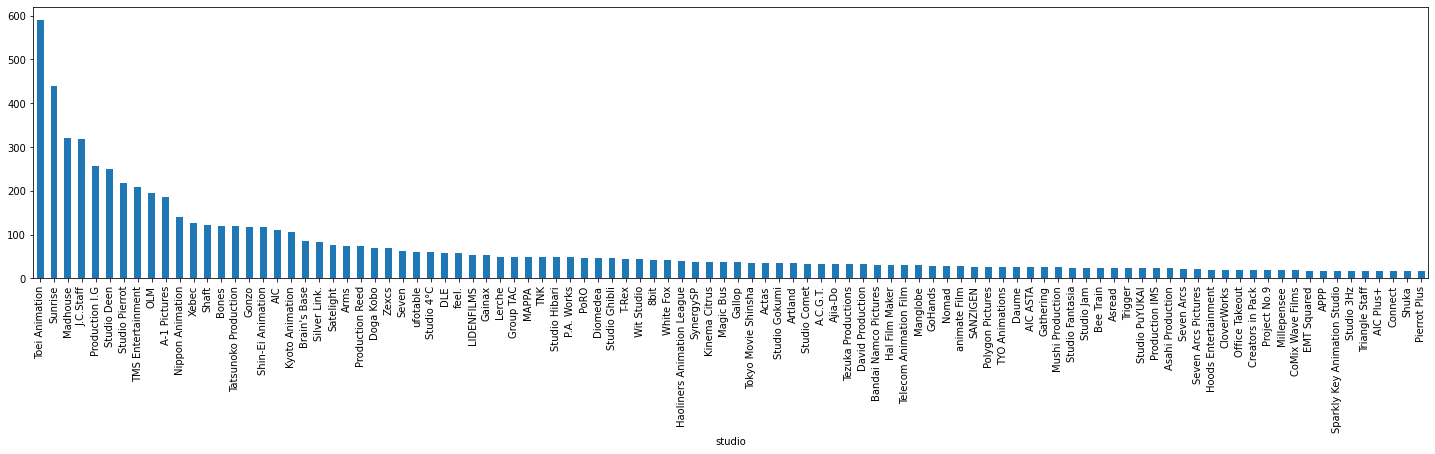

In [481]:
studios = anime.groupby("studio").size().sort_values(ascending=False).head(100)
studios.plot.bar(figsize=(25, 5))

Poglejmo, če obstaja povezava med tem, koliko animejev narediš in tem, kako so uspešni (ocena več kot 7). Kaj pa taki, ki so veliko bolj uspešni (ocena več kot 8 in 8.5)?


In [482]:
good_studios = anime[anime["score"] >= 7].groupby("studio").size().sort_values(ascending=False).head(100)
better_studios = anime[anime["score"] >= 8].groupby("studio").size().sort_values(ascending=False).head(100)
best_studios = anime[anime["score"] >= 8.5].groupby("studio").size().sort_values(ascending=False).head(100)

display(good_studios.head(10))
display(better_studios.head(10))
display(best_studios.head(10))
 


studio
Toei Animation       220
Sunrise              208
J.C.Staff            154
Madhouse             153
Production I.G       146
Studio Deen          138
TMS Entertainment    123
A-1 Pictures         117
Studio Pierrot        99
Bones                 85
dtype: int64

studio
Madhouse             44
Production I.G       36
Sunrise              29
TMS Entertainment    26
Bones                25
Kyoto Animation      22
J.C.Staff            22
A-1 Pictures         21
Shaft                19
Toei Animation       16
dtype: int64

studio
Madhouse                 10
Sunrise                   8
Production I.G            6
ufotable                  6
Artland                   5
Bandai Namco Pictures     5
Kyoto Animation           5
Shaft                     5
White Fox                 4
Studio Ghibli             4
dtype: int64

<AxesSubplot:xlabel='studio'>

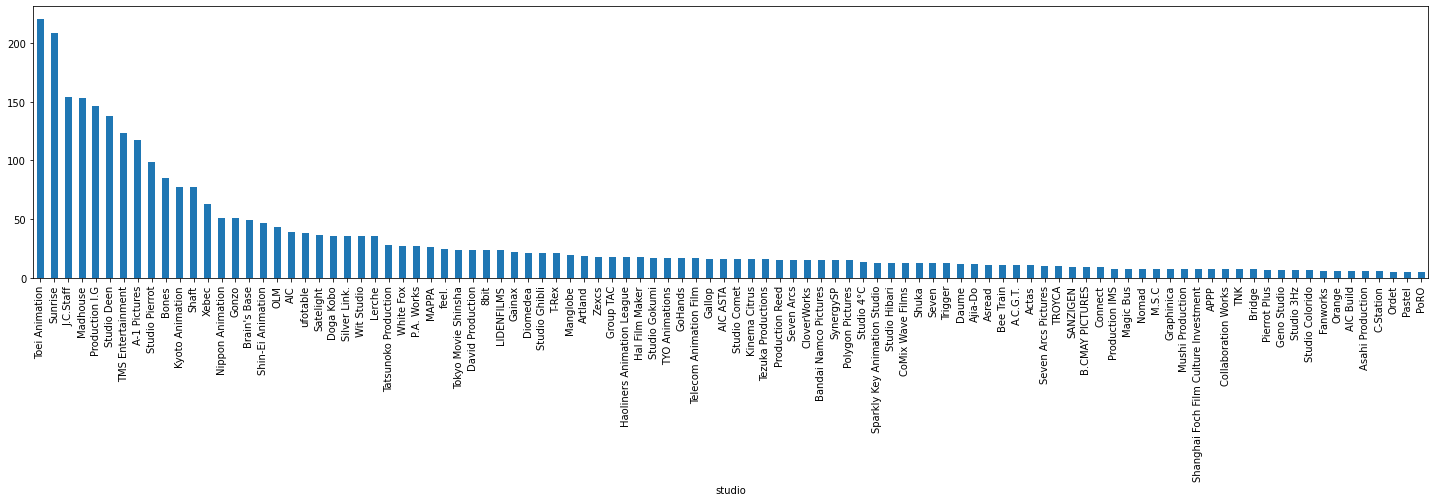

In [483]:
good_studios.plot.bar(figsize=(25, 5))

<AxesSubplot:xlabel='studio'>

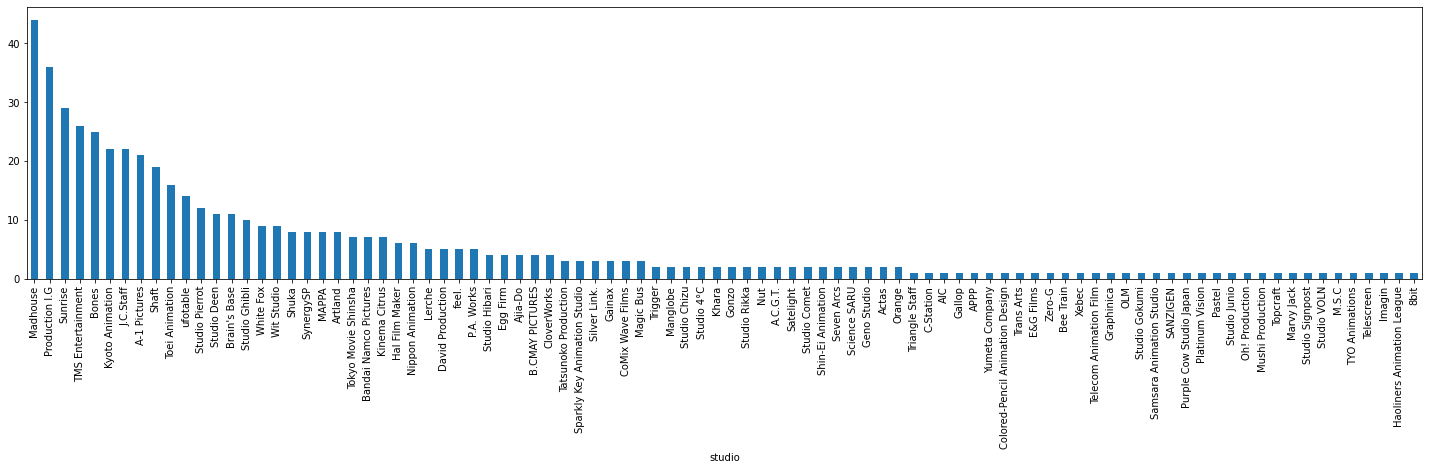

In [484]:
better_studios.plot.bar(figsize=(25, 5))

<AxesSubplot:xlabel='studio'>

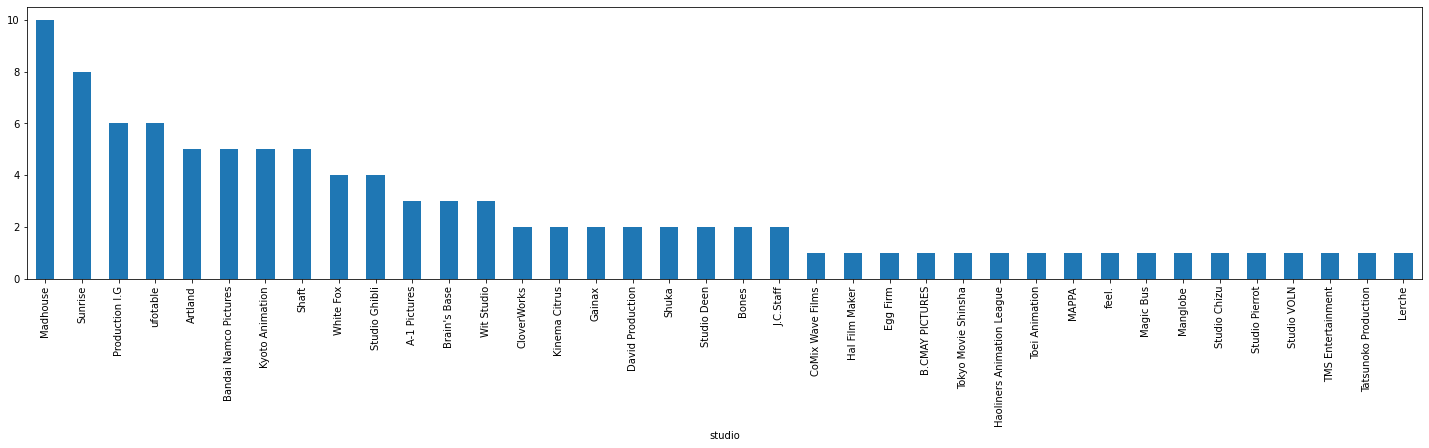

In [485]:
best_studios.plot.bar(figsize=(25, 5))

Opazka: Kvantiteta s kvaliteto v tem primeru nima velike povezave. Če pogledamo samo primer studia *Toei Animation*, ki je do sedaj izdal 220 animejev, od tega ji ima samo 16 oceno nad 8 (prib. 7%) in samo en od njih oceno nad 8.5 (manj kot 0,5%). Gre za studio s tradicijo in verjetno se današnjim gledalcem animacija iz druge polovice 20. stoletja ne zdi preveč dobra. Tak sklep je bil nekako pričakovan, saj studio ni edini faktor, ki vpliva na oceno. Kar pa je treba opozorit in se ne vidi iz analize morda: Če je studio uspešno naredil neko adaptacijo vira, občinstvo od naslednjega projekta pričakuje vsaj toliko in dostikrat se zgodi da se skupina navdušencev razdeli na dvoje: enim je adaptacija všeč, drugim je popolnoma zgrešena, spet tretji so nekje vmes.   

Pa izvzamemo animeje pred letom 2010, saj se je v zadnjih letih s sunkovitim razvojem tehnologije, močno razvila tudi animacija in računalniški efekti. Poglejmo si vse skupaj še enkrat.


In [486]:
good_studios_21 = anime[(anime["score"] >= 7) & (anime["year"] >= 2010)].groupby("studio").size().sort_values(ascending=False).head(100)
better_studios_21 = anime[(anime["score"] >= 8) & (anime["year"] >= 2010)].groupby("studio").size().sort_values(ascending=False).head(100)
best_studios_21 = anime[(anime["score"] >= 8.5) & (anime["year"] >= 2010)].groupby("studio").size().sort_values(ascending=False).head(100)

display(good_studios_21.head(10))
display(better_studios_21.head(10))
display(best_studios_21.head(10))

studio
A-1 Pictures         106
Production I.G        97
J.C.Staff             86
Sunrise               82
Toei Animation        66
Studio Deen           63
Bones                 59
TMS Entertainment     57
Kyoto Animation       57
Madhouse              51
dtype: int64

studio
A-1 Pictures         21
Production I.G       20
Kyoto Animation      17
Madhouse             17
Shaft                17
J.C.Staff            16
TMS Entertainment    16
Bones                16
Sunrise              16
ufotable             11
dtype: int64

studio
Madhouse                 6
ufotable                 5
Shaft                    5
Bandai Namco Pictures    5
Artland                  4
White Fox                4
Kyoto Animation          4
Sunrise                  4
Production I.G           4
A-1 Pictures             3
dtype: int64

<AxesSubplot:xlabel='studio'>

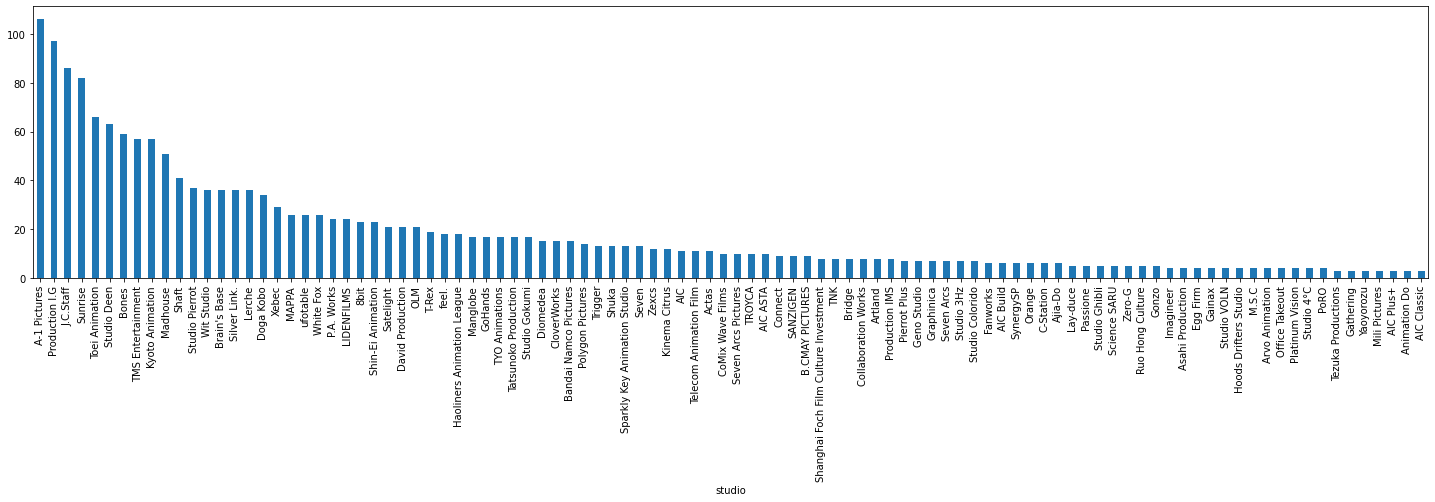

In [487]:
good_studios_21.plot.bar(figsize=(25, 5))

<AxesSubplot:xlabel='studio'>

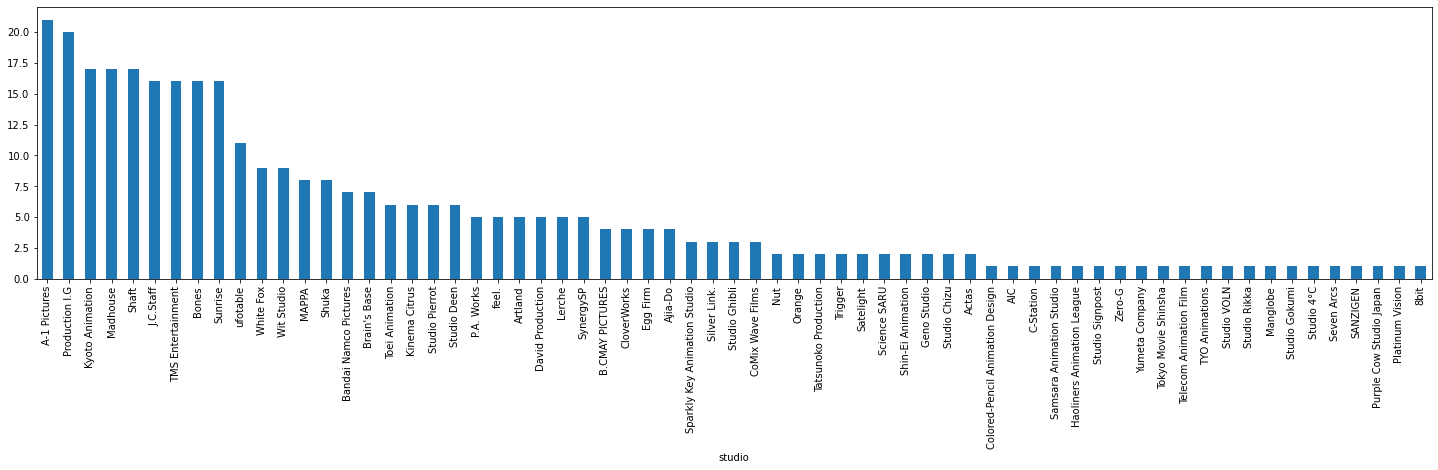

In [488]:
better_studios_21.plot.bar(figsize=(25, 5))

<AxesSubplot:xlabel='studio'>

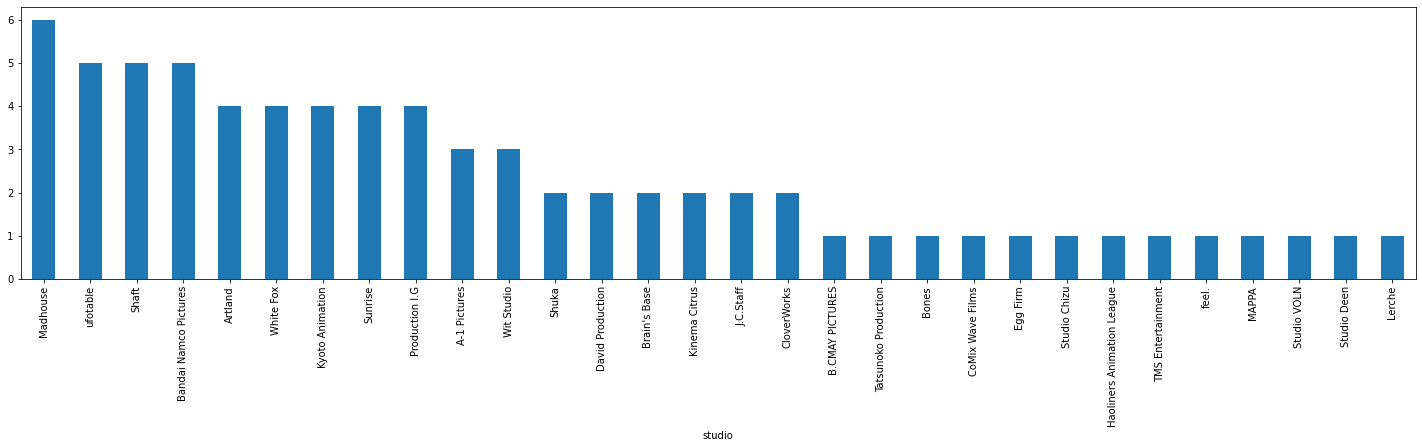

In [489]:
best_studios_21.plot.bar(figsize=(25, 5))

Iz naslednjega grafa si bomo morda lažje predstavljali uspešnost nekaterih studiev.

<AxesSubplot:xlabel='studio', ylabel='score'>

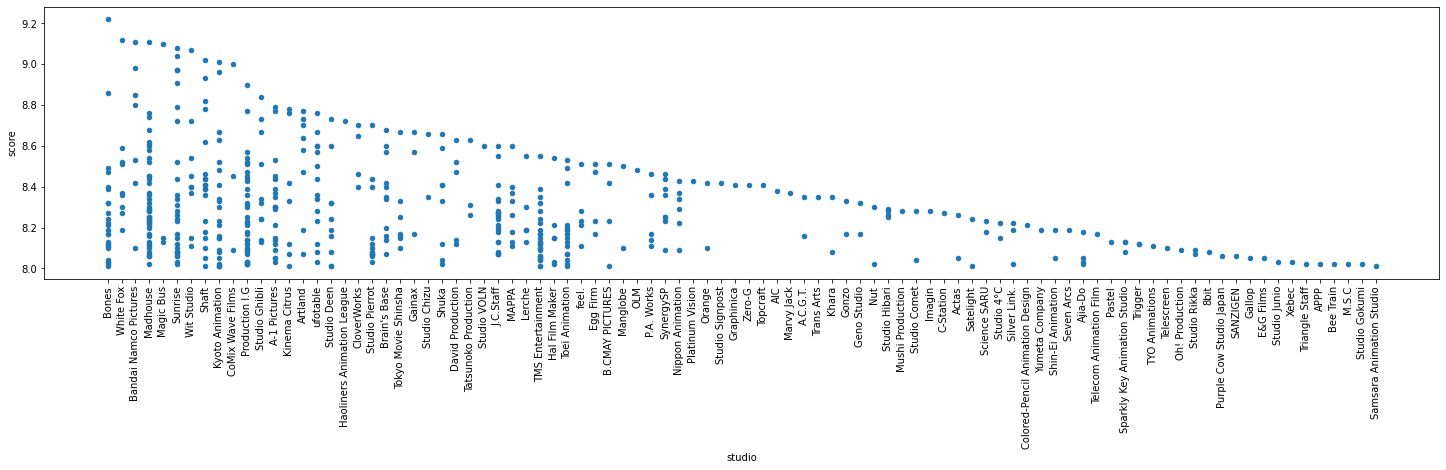

In [490]:
anime[anime["score"] > 8].plot.scatter(x="studio", y="score", figsize=(25, 5), rot=90)

Vseeno pa nam te grafi ne povejo prav dosti več, kot to, da so studia *Madhouse*, *Ufotable*, *Shaft* in druga z lestvice v zadnjem obdobju najboljša na področju kreacije animeja. Seveda pa tudi ostala studia proizvajajo visokokakovosten anime in temu pričajo tudi ocene in popularnost.

Če pa nas zanima točno, kateri studio se statistično najbolj primeren, pa lahko tudi to preverimo.


In [491]:
studios_mean = anime.groupby("studio").mean().sort_values("score",ascending=False).head(100)
studios_mean["score"].head(20)

studio
Egg Firm                           8.345000
Colored-Pencil Animation Design    8.210000
Studio Chizu                       8.116667
Samsara Animation Studio           8.010000
Nippon Ramayana Film Co.           7.990000
Djinn Power                        7.810000
Purple Cow Studio Japan            7.730000
Code                               7.720000
Lapin Track                        7.710000
Shuka                              7.708750
Nakamura Production                7.700000
Odolttogi                          7.630000
Fuji TV                            7.620000
Kadokawa                           7.610000
Twin Engine                        7.570000
Animation Do                       7.570000
BeSTACK                            7.515000
Studio Signpost                    7.490000
Light Chaser Animation Studios     7.490000
Life Work                          7.490000
Name: score, dtype: float64

Za konec pa navedimo najboljših 5 animeje vsakega studia, če bi si kdo slučajno rad izbral anime, glede na studio. 
Vključeni so samo animeji z oceno več kot 8.

In [492]:
S = anime["studio"].unique()

for studio in sorted(S):
    display(studio)
    filter1 = anime[anime["studio"] == studio] 
    display(filter1[["name", "score"]].head(5))


' Sunrise Beyond'

name  score
16181  Gundam Build Divers Re:Rise 2nd Season   7.54
15728             Gundam Build Divers Re:Rise   7.02
16666    King's Raid: Ishi wo Tsugumono-tachi   5.82

'10Gauge'

name  score
10330                                                      Fw:Hamatora   7.09
8446     Pretty Rhythm Movie: All Star Selection - Prism Show☆Best Ten   6.55
11189  Osomatsu-san Short Film Series (Mr. Osomatsu Short Film Series)   6.54
10663              Tobidasu PriPara: Mi~nna de Mezase! Idol☆Grand Prix   6.45

'2:10 AM Animation'

name  score
13613             Wo Shi Jiang Xiaobai (I'm Joybo)   7.26
14281  Wo Shi Jiang Xiaobai (2018) (I'm Joybo OVA)   7.19

'3xCube'

name  score
10043  Jitsu wa Watashi wa (Actually, I am...)   6.94

'81 Produce'

name  score
5159  Otaku no Seiza   5.63

'8bit'

name  score
14001           Tensei shitara Slime Datta Ken   8.08
4905    Macross F Movie 2: Sayonara no Tsubasa   7.97
9831     Grisaia no Meikyuu: Caprice no Mayu 0   7.94
9832   Grisaia no Rakuen (The Eden of Grisaia)   7.89
4057    Macross F Movie 1: Itsuwari no Utahime   7.83

'A-1 Pictures'

name  score
15961  Kaguya-sama wa Kokurasetai?: Tensai-tachi no Renai Zunousen   8.79
8806                   Shigatsu wa Kimi no Uso (Your Lie in April)   8.77
6707                                Uchuu Kyoudai (Space Brothers)   8.53
5975      Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.   8.45
14367   Kaguya-sama wa Kokurasetai: Tensai-tachi no Renai Zunousen   8.44

'A-Real'

name  score
12271  Kenka Banchou Otome: Girl Beats Boys   6.47
9578                    Urawa no Usagi-chan   5.39
10798           Urawa no Usagi-chan Special   5.35

'A.C.G.T.'

name  \
456                           Kino no Tabi: The Beautiful World (Kino's Journey)   
8                                                         Initial D Fourth Stage   
1248  Kino no Tabi: The Beautiful World - Nanika wo Suru Tame ni - Life Goes On.   
3363                                                    Initial D Battle Stage 2   
3033                Kino no Tabi: The Beautiful World - Tou no Kuni - Free Lance   

      score  
456    8.35  
8      8.16  
1248   7.79  
3363   7.65  
3033   7.61

'ACC Production'

name  score
1094  Gun-dou Musashi (Gun Samurai)   5.81

'AIC'

name  score
6628                                   Uchuu Senkan Yamato 2199   8.38
507   Tenchi Muyou! Ryououki 2nd Season (Tenchi Muyo! Ryo-Ohki)   7.67
138        Ima, Soko ni Iru Boku (Now and Then, Here and There)   7.67
506              Tenchi Muyou! Ryououki (Tenchi Muyo! Ryo-Ohki)   7.66
5849           Strike Witches Movie (Strike Witches: The Movie)   7.62

'AIC ASTA'

name  score
4626                      Tentai Senshi Sunred 2nd Season   7.91
3887                                 Tentai Senshi Sunred   7.82
6137  Jinrui wa Suitai Shimashita (Humanity Has Declined)   7.79
5866          Sora no Otoshimono: Tokeijikake no Angeloid   7.64
7083               Persona 3 the Movie 1: Spring of Birth   7.60

'AIC Build'

name  score
5991               Ore no Imouto ga Konnani Kawaii Wake ga Nai Specials   7.44
7147                                  Boku wa Tomodachi ga Sukunai Next   7.43
6301  Boku wa Tomodachi ga Sukunai (Haganai: I don't have many friends)   7.30
5488               Ore no Imouto ga Konnani Kawaii Wake ga Nai (OreImo)   7.14
6662          Koi to Senkyo to Chocolate (Love, Election and Chocolate)   7.12

'AIC Classic'

name  score
5337                        Hourou Musuko (Wandering Son)   7.75
6397      Hourou Musuko Specials (Wandering Son Specials)   7.64
7200      Kotoura-san (The Troubled Life of Miss Kotoura)   7.24
7036  Ebiten: Kouritsu Ebisugawa Koukou Tenmonbu (Ebiten)   6.23
7427                          Kotoura-san: Haruka no Heya   6.15

'AIC Frontier'

name  \
7096  Maji de Otaku na English! Ribbon-chan: Eigo de Tatakau Mahou Shoujo   
7379                                        Tenshi no Drop (Angel's Drop)   

      score  
7096   5.28  
7379   3.51

'AIC Plus+'

name  score
7646                           Date A Live: Date to Date   7.38
7231                                         Date A Live   7.25
4240                     GA: Geijutsuka Art Design Class   7.15
4810  GA: Geijutsuka Art Design Class: Aozora ga Kakitai   7.09
8361                                             Pupipo!   6.83

'AIC Spirits'

name  score
4546                                        Strike Witches 2   7.33
2460            Tokyo Majin Gakuen Kenpucho: Tou Dai Ni Maku   7.28
2279  Goshuushou-sama Ninomiya-kun (Good Luck! Ninomiya-kun)   6.73
457                               Girls Bravo: Second Season   6.69
1707   Sasami: Mahou Shoujo Club (Sasami Magical Girls Club)   6.63

'AIC Takarazuka'

name  score
5684  Megane na Kanojo   6.69

'APPP'

name  score
244                                            Golden Boy   8.02
3141              JoJo no Kimyou na Bouken: Phantom Blood   7.73
3559                              Hokuto no Ken: Toki-den   7.40
621   JoJo no Kimyou na Bouken (JoJo's Bizarre Adventure)   7.34
1992                                       Robot Carnival   7.28

'AQUA ARIS'

name  score
17215                       Saezuru Doubutsu wa Yarushikanai!   6.53
17182                              Kanojo, Okarishimasu Petit   6.31
16767               Minegishi-san wa Ootsu-kun ni Tabesasetai   6.24
16066  Machikado Mazoku Mini (The Demon Girl Next Door Minis)   5.89
16453                                   Katarina Nounai Kaigi   5.81

'ASK Animation Studio'

name  score
16194  Jintian Kaishi Zuo Mingxing   6.95
13923          Wangu Xian Qiong II   6.86

'AT-2'

name  score
2714                                     Yuuwaku (Temptation)   6.57
2690  Hana no Joshi Announcer: Newscaster Etsuko (Foxy Nudes)   6.47
2768                   Panchira Teacher (Panty Flash Teacher)   6.40
1256                       Yakin Byoutou (Night Shift Nurses)   6.33
2659                          Seijun Kango Gakuin (Nurse Me!)   6.27

'AXsiZ'

name  score
14102                                    Tonari no Kyuuketsuki-san   7.11
11110            Koukaku no Pandora (Pandora in the Crimson Shell)   6.53
12767  Ramen Daisuki Koizumi-san (Ms. Koizumi Loves Ramen Noodles)   6.52
11923                                                       Seiren   6.31
10803                                           Wagamama High Spec   5.41

'Academy Productions'

name  score
1497  Uchuu Senkan Yamato III (Star Blazers: The Bolar Wars)   7.08

'Actas'

name  score
7865    Girls & Panzer Movie (Girls und Panzer der Film)   8.26
14434                 Girls & Panzer: Saishuushou Part 2   8.05
12008                 Girls & Panzer: Saishuushou Part 1   7.98
7866   Girls & Panzer: Kore ga Hontou no Anzio-sen Desu!   7.72
7046                                      Girls & Panzer   7.57

'Agent 21'

name  score
1047     Dominion   6.94
5674       Elf 17   5.60
8344  Dragon Fist   4.62

'Ajia-Do'

name  \
16101  Honzuki no Gekokujou: Shisho ni Naru Tame ni wa Shudan wo Erandeiraremasen 2nd Season   
15335             Honzuki no Gekokujou: Shisho ni Naru Tame ni wa Shudan wo Erandeiraremasen   
16041                                                         Kakushigoto (TV) (Kakushigoto)   
5632                                                      Omae Umasou da na (You Are Umasou)   
1849                                                 Eikoku Koi Monogatari Emma: Molders-hen   

       score  
16101   8.18  
15335   8.05  
16041   8.03  
5632    8.02  
1849    7.88

'Akatsuki'

name  score
13410          Still   5.94
13506  Session High⤴   5.67

'Albacrow'

name  score
16126  Breakers   6.34

'Amber Film Works'

name  score
297  Najica Dengeki Sakusen (Najica Blitz Tactics)   6.01

'Amuse'

name  score
950  Elf wo Karu Mono-tachi (Those Who Hunt Elves)   7.03

'An DerCen'

name  score
7314  Kuro to Kin no Akanai Kagi.   5.64

'Anima'

name  score
6486   .hack//The Movie: Sekai no Mukou ni   7.15
4509                          Cat Shit One   7.03
15975            Altered Carbon: Resleeved   6.59

'Anima&Co.'

name  \
15398        Keishichou Tokumubu Tokushu Kyouakuhan Taisakushitsu Dainanaka: Tokunana   
16078  Keishichou Tokumubu Tokushu Kyouakuhan Taisakushitsu Dainanaka: Tokunana Recap   

       score  
15398   6.03  
16078   5.60

'Animaruya'

name  score
731   Android Ana Maico 2010 (Android Announcer Maico 2010)   6.44
5346     Guskou Budori no Denki (The Life of Guskou Budori)   6.28

'Animation 21'

name  score
2035  Honoo no Toukyuuji: Dodge Danpei    7.3

'Animation Do'

name  score
8566   Free!: Eternal Summer (Free! - Eternal Summer)   7.70
13568                       Free!: Dive to the Future   7.60
7845                Free! (Free! - Iwatobi Swim Club)   7.41

'Animation Staff Room'

name  score
7378                     Penguin's Memory: Shiawase Monogatari   7.12
2494                         Umi no Triton (Triton of the Sea)   6.27
4345                   Koushoku Ichidai Otoko (The Sensualist)   6.08
3533  Gokiburi-tachi no Tasogare (Twilight of the Cockroaches)   5.90

'Anime Antenna Iinkai'

name  score
3370                      Rensa Byoutou   6.86
13962  Imouto Paradise! 3 The Animation   6.65
2988          The Guts! (Women at Work)   6.33

'Anime R'

name  score
3410  Dream Hunter Rem   6.14

'Ankama Animations'

name  score
14548  Mutafukaz (MFKZ)   7.08

'Annapuru'

name  score
290                                       Ace wo Nerae! 2   6.84
1329  Hakugei Densetsu (Hakugei: Legend of the Moby Dick)   6.59

'Anpro'

name  score
2977     Bus Gamer   6.55
7005  Wild Adapter   6.25

'Arcs Create'

name  score
410  Phantom The Animation (Phantom: The Animation)   6.55

'Arcturus'

name  score
2263  6 Angels   4.46

'Ark'

name  score
13913  Joshiochi!: 2-kai kara Onnanoko ga... Futtekita!?   6.38

'Arms'

name  \
2290                                                                                         Genshiken 2   
202                                                                                           Elfen Lied   
7132                                                       Maoyuu Maou Yuusha (Maoyu ~ Archenemy & Hero)   
352   Elfen Lied: Tooriame nite Arui wa, Shoujo wa Ikani Shite Sono Shinjou ni Itatta ka? - Regenschauer   
8380                                                   Gokukoku no Brynhildr (Brynhildr in the Darkness)   

      score  
2290   7.78  
202    7.58  
7132   7.33  
352    7.21  
8380   6.94

'Artland'

name  score
9096                           Mushishi Zoku Shou 2nd Season   8.77
8491           Mushishi Zoku Shou (MUSHI-SHI -Next Passage-)   8.73
428                                     Mushishi (Mushi-Shi)   8.70
9808                     Mushishi Zoku Shou: Suzu no Shizuku   8.64
8363  Mushishi: Hihamukage (The Shadow that Devours the Sun)   8.58

'Artmic'

name  score
832                                                 Riding Bean   7.08
1760                                                Megazone 23   6.82
1653  The Hakkenden (The Hakkenden: Legend of the Dog Warriors)   6.62
1073                                            Detonator Orgun   6.46
1216                                AD Police (AD Police Files)   6.29

'Arvo Animation'

name  \
15630                           Bokutachi wa Benkyou ga Dekinai! (We Never Learn!: Bokuben)   
14506                             Bokutachi wa Benkyou ga Dekinai (We Never Learn: BOKUBEN)   
15536  Bokutachi wa Benkyou ga Dekinai: Nagisa ni Usemono Arite Senjin wa Enzen to [X] Suru   
17009             Bokutachi wa Benkyou ga Dekinai!: Chapel no Kane wa [X] wo Shukufuku Suru   
16033                                      Monster Musume no Oishasan (Monster Girl Doctor)   

       score  
15630   7.37  
14506   7.34  
15536   7.30  
17009   7.28  
16033   6.53

'Asahi Production'

name  score
7091                   Medaka Box Abnormal   7.47
2589  Time Travel Tondekeman! (Time Quest)   7.27
5642  Super Robot Taisen OG: The Inspector   7.25
6572                            Medaka Box   7.08
3029    Minky Momo in Yume ni Kakeru Hashi   7.03

'Ascension'

name  score
5212   Colorful (Movie) (Colorful The Motion Picture)   7.85
5989                                  Kizuna Ichigeki   6.59
8850                                  Duel Masters VS   5.96
12491                             Duel Masters (2017)   5.73
9993                                 Duel Masters VSR   5.57

'Ashi Production'

name  score
2738     Kaiketsu Zorro (The Magnificent Zorro)   7.24
3989                               Offside (TV)   7.12
405                  Iria: Zeiram The Animation   7.07
2253  Idol Bouei-tai Hummingbird (Hummingbirds)   5.82
3917                        Ai City (Love City)   5.73

'Asread'

name  score
3770                      Ga-Rei: Zero (Ga-Rei-Zero)   7.64
3969                                Minami-ke Okaeri   7.58
6253                  Mirai Nikki (The Future Diary)   7.58
4260                             Minami-ke Betsubara   7.51
7460  Mirai Nikki: Redial (The Future Diary: Redial)   7.42

'Aubec'

name  score
3800        Huckleberry Finn Monogatari   6.51
1867                          Capricorn   5.49
1664  Hyper-Psychic Geo Garaga (Garaga)   5.18

'Azeta Pictures'

name  score
1246  Uchuu Koukyoushi Maetel: Ginga Tetsudou 999 Gaiden   6.69
2544      Chou Kuse ni Narisou (I'll Make a Habit of It)   6.25

'B&T'

name  score
6094   Da Yu Hai Tang (Movie) (Big Fish & Begonia)   7.59
15196                               Da Yu Hai Tang   6.08

'B.CMAY PICTURES'

name  score
13872                                 Mo Dao Zu Shi   8.51
14640                      Mo Dao Zu Shi 2nd Season   8.42
15671          Quanzhi Gaoshou Zhi Dianfeng Rongyao   8.23
11986           Quanzhi Gaoshou (The King's Avatar)   8.01
15865  Mo Dao Zu Shi Q (The Founder of Diabolism Q)   7.90

'BOOTLEG'

name  score
13724  Jewelry The Animation   6.55

'BYMENT'

name  score
14666  Xixing Ji (The Westward)   6.67

'Bakken Record'

name  score
15181  Pandora to Akubi   6.13

'Bandai Namco Pictures'

name  score
9813                                       Gintama° (Gintama Season 4)   9.11
12061                                      Gintama. (Gintama Season 5)   8.98
14040                 Gintama.: Shirogane no Tamashii-hen - Kouhan-sen   8.85
13657  Gintama.: Shirogane no Tamashii-hen (Gintama.: Silver Soul Arc)   8.80
13072                        Gintama.: Porori-hen (Gintama.: Slip Arc)   8.53

'Bandai Spirits'

name  score
16242  Mobile Suit Gundam G40   6.13

'Bandai Visual'

name  score
5799  Code Geass: Hangyaku no Lelouch R2 Omake Flash   5.94

'BeSTACK'

name  score
4280  Isekai no Seikishi Monogatari (Tenchi Muyo! War on Geminar)   7.87
1691               Tokyo Majin Gakuen Kenpucho: Tou (Tokyo Majin)   7.16

'Bee Media'

name  score
1133       Night Head Genesis   6.78
10659  Cyborg 009 VS Devilman   6.37

'Bee Train'

name  score
4248                  Phantom: Requiem for the Phantom   8.02
5979                                       Hyouge Mono   7.99
874                       Tsubasa Chronicle 2nd Season   7.61
154    Tsubasa Chronicle (Tsubasa RESERVoir CHRoNiCLE)   7.56
5074  Shinrei Tantei Yakumo (Psychic Detective Yakumo)   7.36

'Beijing Huihuang Animation Company'

name  score
4783  Saikyou Bushouden: Sangoku Engi   6.82

'Beijing Rocen Digital'

name  \
14665                                    Feng Yu Zhou (The Wind Guardians)   
12978  Hua Jianghu Zhi Bei Mo Ting (A Portrait of Jianghu: Mourning Toast)   

       score  
14665   7.02  
12978   6.56

'Bibury Animation Studios'

name  score
13083  Grisaia: Phantom Trigger The Animation   6.96
14573                               Azur Lane   6.30

'Big Bang'

name  score
1872  Delpower X Bakuhatsu Miracle Genki!   5.49

'BigFireBird Animation'

name  score
14697  Hitori no Shita: The Outcast 3rd Season (The Outcast 3rd Season)   6.81
16199                                   Yingxiong Zai Lin (Hero Return)   6.76
15705          Shaonu Qianxian: Renxing Xiao Juchang (Girls' Frontline)   6.72
16262                                        Yao Jing Zhong Zhi Shou Ce   6.59
13386                          Shiyan Pin Jiating (Frankenstein Family)   6.36

'Blade'

name  score
13034  Gin no Guardian II (The Silver Guardian 2)   6.64
16644           Iwa Kakeru!: Sport Climbing Girls   6.23
11888                              Cheating Craft   5.46

'Blue Cat'

name  score
3651                        Choisuji   6.18
3732   Shakkin Shimai (Debt Sisters)   6.10
4562  Cartagra: Tsuki Gurui no Yamai   5.79
3209                  Flashback Game   5.41
3419                     Magical Moe   5.40

'Bones'

name  score
3946                        Fullmetal Alchemist: Brotherhood   9.22
14053                                      Mob Psycho 100 II   8.86
11102                                         Mob Psycho 100   8.49
17259                                                Gotcha!   8.47
11740  Boku no Hero Academia 2nd Season (My Hero Academia 2)   8.40

'Bouncy'

name  \
7536                        Chokkyuu Hyoudai Robot Anime: Straight Title   
13715  Himote House (HIMOTE HOUSE: A share house of super psychic girls)   
11705              Mahou Shoujo? Naria☆Girls (Mahou Shoujo? Naria Girls)   

       score  
7536    5.87  
13715   5.72  
11705   3.84

'Boyan Pictures'

name  score
13531  Shaonian Jinyiwei (The Young Imperial Guards)    6.4

"Brain's Base"

name  score
6538   Natsume Yuujinchou Shi (Natsume's Book of Friends Season 4)   8.68
6148   Natsume Yuujinchou San (Natsume's Book of Friends Season 3)   8.60
4050  Zoku Natsume Yuujinchou (Natsume's Book of Friends Season 2)   8.57
2055                                                      Baccano!   8.42
6159                                            Hotarubi no Mori e   8.40

'BreakBottle'

name  \
11233                                                                    Shoujo kara Shoujo e...   
10786  Rinkan Biyaku Chuudoku: Nigeba Nashi! 1428-nin no Seito Zenin ni Sex Sareru Reijou Sayaka   
12285                                                                           Toriko no Kusari   
9308                                                                            Demonion: Gaiden   
12170                                                                               Saimin Class   

       score  
11233   6.96  
10786   6.58  
12285   6.58  
9308    6.53  
12170   6.30

'Bridge'

name  score
8517    Fairy Tail (2014) (Fairy Tail Series 2)   7.77
5763                    Mitsudomoe Zouryouchuu!   7.72
5061                                 Mitsudomoe   7.61
5720         Mitsudomoe: Oppai Ippai Mama Genki   7.59
12148  Oushitsu Kyoushi Heine (The Royal Tutor)   7.49

'Brio Animation'

name  score
14013  Ladyspo   4.25

'Buemon'

name  score
10582  Kaze no Matasaburou (Movie) (MATASABURO of the Wind)   6.14
15868                                              Obsolete   5.65

'C-Station'

name  score
12427                Yuru Camp△ (Laid-Back Camp)   8.27
13946                        Yuru Camp△ Specials   7.55
16240  Heya Camp△: Sauna to Gohan to Sanrin Bike   7.42
11692                         Starmyu 2nd Season   7.34
14654                     Heya Camp△ (Room Camp)   7.16

'C2C'

name  \
11750  Shuumatsu Nani Shitemasu ka? Isogashii Desu ka? Sukutte Moratte Ii Desu ka?   
15951                                     Majo no Tabitabi (The Journey of Elaina)   
14129                                            Hitoribocchi no Marumaru Seikatsu   
13124                                                             Harukana Receive   
8774                                                        M3: Sono Kuroki Hagane   

       score  
11750   7.75  
15951   7.59  
14129   7.53  
13124   6.72  
8774    6.62

'CG Year'

name  score
16882          Yuan Long (Carp Reborn)   7.09
14943                Shao Nian Ge Xing   6.79
13605  Xue Se Cang Qiong (Bloody Code)   6.32

'CLAP'

name  score
14231             Toki no Kousa (Shibuya Vernacular)   5.82
14619  Eiga Daisuki Pompo-san (Pompo: The Cinéphile)   5.61

'Calf Studio'

name  score
9615  Wonder (Movie) (Wonder)   6.07

'Chaos Project'

name  score
3133                      Utawarerumono OVA   7.23
651                  Comic Party Revolution   6.54
3958             Comic Party Revolution OVA   6.53
358       Futari Ecchi (Step Up Love Story)   6.39
1054  Geobreeders: File-X Chibi Neko Dakkan   6.31

'Charaction'

name  score
7823   Boku no Imouto wa "Osaka Okan": Uchi no Oniichan wa Tokyo Rule   5.82
7374                                   Boku no Imouto wa "Osaka Okan"   5.81
7506       Boku no Imouto wa "Osaka Okan": Haishin Gentei Osaka Okan.   5.68
17236         Kusoge tte Iuna! Animation (Don't Call Us A JUNK GAME!)   5.61

"Children's Playground Entertainment"

name  \
14766                                                   Tsukiuta. The Animation 2   
16401  Hatena☆Illusion: Koi to Mahou no Illusion de, Muchuu Sasechaimasu! Special   
12739                                           Hatena☆Illusion (Hatena Illusion)   

       score  
14766   6.24  
16401   5.59  
12739   5.39

'Chippai'

name  score
12020  300 En no Otsukiai Anime Edition   6.25

'Chiptune'

name  score
12516  T7S Longing for Summer Again and Again: Harukaze   6.32

'ChuChu'

name  score
5107  Sono Hanabira ni Kuchizuke wo: Anata to Koibito Tsunagi   7.27
6150         Sono Hanabira ni Kuchizuke wo: Reo x Mai Diaries   6.56
8703       Sono Hanabira ni Kuchizuke wo: Risa x Miya Gekijou   6.34

'Circle Tribute'

name  \
8455                                                Okusama wa Moto Yariman   
10677  Aniki no Yome-san nara, Ore ni Hamerarete Hiihii Itteru Tokoro Da yo   

       score  
8455    6.92  
10677   6.16

'CloverWorks'

name  score
14574    Seishun Buta Yarou wa Yumemiru Shoujo no Yume wo Minai   8.70
14228            Yakusoku no Neverland (The Promised Neverland)   8.65
13684                         Saenai Heroine no Sodatekata Fine   8.46
14015  Seishun Buta Yarou wa Bunny Girl Senpai no Yume wo Minai   8.40
14437           Fate/Grand Order: Zettai Majuu Sensen Babylonia   7.97

'CoMix Wave Films'

name  score
11148                          Kimi no Na wa. (Your Name.)   9.00
14877                    Tenki no Ko (Weathering With You)   8.45
7465                Kotonoha no Niwa (The Garden of Words)   8.09
1531      Byousoku 5 Centimeter (5 Centimeters Per Second)   7.77
5853   Hoshi wo Ou Kodomo (Children Who Chase Lost Voices)   7.59

'Code'

name  score
4127  Shin Mazinger Shougeki! Z-hen (Mazinger Edition Z: The Impact!)   7.72

'Collaboration Works'

name  score
9958                    Mankitsu Happening   7.74
6330   Eroge! H mo Game mo Kaihatsu Zanmai   7.58
7223              Tsugou no Yoi Sexfriend?   7.45
6696                     Maki-chan to Now.   7.44
13988              Dokidoki Little Ooyasan   7.29

'Colored-Pencil Animation Design'

name  score
14310  Quanzhi Gaoshou 2 (The King's Avatar 2)   8.21

'Composition Inc.'

name  score
11972  Hatsune Miku: Hiyashite Narasou Okashi no Ii Oto    5.9

'Connect'

name  score
16176  Ore wo Suki nano wa Omae dake ka yo: Oretachi no Game Set   7.69
9109                                Imawa no Kuni no Alice (OVA)   7.52
14846                               Senryuu Shoujo (Senryu Girl)   7.43
14659                        Ore wo Suki nano wa Omae dake ka yo   7.42
10341                   Strike the Blood: Valkyria no Oukoku-hen   7.31

'Cookie Jar Entertainment'

name  score
2398  Spider Riders: Oracle no Yuusha-tachi (Spider Riders)   6.61

'Craftar Studios'

name  score
14645     Ashita Sekai ga Owaru toshitemo   6.43
14007               Ingress the Animation   6.39
12741  Soutai Sekai (The Relative Worlds)   5.81

'Creators Dot Com'

name  score
715  Pugyuru   5.73

'Creators in Pack'

name  \
14248                         Osake wa Fuufu ni Natte kara: Yuzu Atsukan   
12876             Osake wa Fuufu ni Natte kara (Love is Like a Cocktail)   
10984                     Ojisan to Marshmallow (Ojisan and Marshmallow)   
10242                                                          Danchigai   
11636  Kiitarou Shounen no Youkai Enikki (Kiitaro's yokai picture diary)   

       score  
14248   7.02  
12876   6.94  
10984   6.61  
10242   6.56  
11636   6.46

'Creatures Inc.'

name  score
15552  Can You See? I'm Sushi   5.33

'CyberConnect2'

name  score
2896                                           .hack//G.U. Trilogy   7.15
9737  Studio Khara vs. CyberConnect2 Gachinko! Animation Taiketsu!   5.75

'Cyclone Graphics'

name  score
8584  Nandaka Velonica   5.99

'CygamesPictures'

name  score
15212           Princess Connect! Re:Dive   7.08
13320        Blade Runner: Black Out 2022   6.99
10841  Manaria Friends (Mysteria Friends)   6.63

'D & D Pictures'

name  score
13603  Detective Conan: The Magician of Starlight   6.49

'D.A.S.T.'

name  score
1221                         Angel Cop   5.94
6780  Yumemakura Baku Twilight Gekijou   5.69

'DAX Production'

name  score
4634                                          Kuruneko   7.33
5576                               Kuruneko 2nd Season   7.01
3322  Sasurai no Shoujo Nell (Nell the Wandering Girl)   6.25
3324                                 Paris no Isabelle   5.79

'DLE'

name  score
14167                   Wakaokami wa Shougakusei! Movie (Okko's Inn)   7.55
13329  Gaikotsu Shotenin Honda-san (Skull-face Bookseller Honda-san)   7.33
6683                                                   Thermae Romae   7.03
6771                          Thermae Romae Specials (Thermae Romae)   6.92
7818                                                        Mini Van   6.89

'DMM pictures'

name  score
17031  Dogeza de Tanondemita   5.22

'DMM.futureworks'

name  score
14272  BanG Dream! Garupa☆Pico   7.79
15829                Mini Yuri   6.74
13435                 MahoYome   6.66
14215     Golden Douga Gekijou   6.31
14882                   Umayon   6.07

'DR Movie'

name  score
12416  Elsword: Ain-ui Gieog Animation   6.13
11271             Elsword: El-ui Yeoin   6.07

'Daewon Media'

name  score
8292  Iron Kid (Eon Kid)   6.95
7528      Dallyeola Hani   6.67
5147                 Gon   5.77

'Dai Nippon Printing'

name  score
875  Yokoyama Mitsuteru Sangokushi   7.39

'Dai-Ichi Douga'

name  score
3434  Youkai Ningen Bem   6.03

'Dancing CG Studio'

name  score
14277  Benghuai 3: Reburn (Honkai Impact 3: Reburn)   6.89

'DandeLion Animation Studio'

name  score
16818         Zuruggu to Mimikkyu (Chase the Beans)   6.65
13286                             Pingu in the City   6.64
12489               RoboMasters the Animated Series   6.44
14533  Pingu in the City (2018) (Pingu in the City)   6.44

'Darts'

name  score
1217                Bubblegum Crisis   7.29
1218                 Bubblegum Crash   6.54
2092  Bouken! Iczer 3 (Iczer Reborn)   5.84

'Daume'

name  score
6019                                           Shiki Specials   7.82
5099                                                    Shiki   7.80
1714        Ichigo Mashimaro OVA (Strawberry Marshmallow OVA)   7.73
3808  Ichigo Mashimaro Encore (Strawberry Marshmallow Encore)   7.71
2698                                                Minami-ke   7.70

'David Production'

name  score
14360                  JoJo no Kimyou na Bouken Part 5: Ougon no Kaze   8.63
11023           JoJo no Kimyou na Bouken Part 4: Diamond wa Kudakenai   8.52
9349   JoJo no Kimyou na Bouken Part 3: Stardust Crusaders 2nd Season   8.47
8284              JoJo no Kimyou na Bouken Part 3: Stardust Crusaders   8.14
7116         JoJo no Kimyou na Bouken (TV) (JoJo's Bizarre Adventure)   8.12

'Digital Frontier'

name  score
11066                                            Gantz:O   7.47
2703   Appleseed Saga Ex Machina (Appleseed: Ex Machina)   7.37
5782                                Biohazard: Damnation   7.22
35                                     Appleseed (Movie)   7.11
3016                             Biohazard: Degeneration   7.06

'Digital Media Lab'

name  score
6131                   Suzy's Zoo: Daisuki! Witzy   6.03
7551  Suzy's Zoo: Daisuki! Witzy - Happy Birthday   5.79

'Diomedea'

name  score
7193                   Mondaiji-tachi ga Isekai kara Kuru Sou Desu yo?   7.59
10795  KanColle Movie (Fleet Girls Collection KanColle Movie Sequence)   7.54
6147                         Shinryaku!? Ika Musume (The Squid Girl 2)   7.53
6894                                            Shinryaku!! Ika Musume   7.50
5395                            Shinryaku! Ika Musume (The Squid Girl)   7.47

'Djinn Power'

name  score
14985  Chuan Shu Zijiu Zhinan (Scumbag System)   7.81

'Doga Kobo'

name  score
8813   Gekkan Shoujo Nozaki-kun (Monthly Girls' Nozaki-kun)   7.99
9544                                       Plastic Memories   7.95
6702               Yuru Yuri♪♪ (YuruYuri: Happy Go Lily ♪♪)   7.86
9526                      Gekkan Shoujo Nozaki-kun Specials   7.80
12496                                            New Game!!   7.78

'Dongwoo A&E'

name  score
7563     Pretty Rhythm: Rainbow Live   7.54
8775                         PriPara   7.47
12423              Idol Time PriPara   7.15
13849               Kiratto Pri☆chan   6.92
6800   Pretty Rhythm: Dear My Future   6.71

'Dongyang Animation'

name  score
3339  Ougon Bat (Golden Bat)   6.36

'Drive'

name  score
14767  Actors: Songs Connection   6.22

'Dynamic Planning'

name  score
1488  Iron Virgin Jun   4.64

'Dynamo Pictures'

name  score
9506                                       Pikmin Short Movies   6.90
16550                               ARP Backstage Pass Special   6.01
15696                                       ARP Backstage Pass   5.61
16437  ARP Backstage Pass: Celebrate Good Time - Short Stories   5.49

'E&G Films'

name  score
502                                                       Slayers Next   8.05
3344  Ginga Sengoku Gunyuuden Rai (Galaxy Warring State Chronicle Rai)   7.96
501                                                            Slayers   7.77
1079                                                     Lost Universe   7.03
3933              Fabre-sensei wa Meitantei (Dr. Fabre is a Detective)   6.29

'EDGE'

name  score
11627  Fella Hame Lips   7.21

'EKACHI EPILKA'

name  score
14550  Maou-sama, Retry! (Demon Lord, Retry!)   6.51
13857          Fumikiri Jikan (Crossing Time)   6.40

'EMT Squared'

name  score
16198                                           Kuma Kuma Kuma Bear   6.94
11138                                    Renai Boukun (Love Tyrant)   6.73
14553                  Boku no Tonari ni Ankoku Hakaishin ga Imasu.   6.65
12085                                                   Nyanko Days   6.62
11623  Fudanshi Koukou Seikatsu (The Highschool Life of a Fudanshi)   6.56

'ENGI'

name  score
16360  Uzaki-chan wa Asobitai! (Uzaki-chan Wants to Hang Out!)   7.10
15011            Hataage! Kemono Michi (Kemono Michi: Rise Up)   6.72

'Echo'

name  score
1546  Gun Frontier   6.57

'Echoes'

name  score
16352  Pianoman   6.49

'Egg'

name  score
4076  Chameleon (OVA) (Bite me!)    6.3

'Egg Firm'

name  score
12321  Saiki Kusuo no Ψ-nan 2 (The Disastrous Life of Saiki K. 2)   8.51
11642      Saiki Kusuo no Ψ-nan (The Disastrous Life of Saiki K.)   8.47
14526                          Saiki Kusuo no Ψ-nan: Kanketsu-hen   8.23
15932                          Saiki Kusuo no Ψ-nan: Ψ-shidou-hen   8.17

'Eiken'

name  score
473                                              Glass no Kamen   7.35
3153  Seimei no Kagaku: Micro Patrol (Once Upon a Time... Life)   7.19
3447                                             Musashi no Ken   7.17
6475                                            Ginga Patrol PJ   6.64
5203                                               Cooking Papa   6.58

'Encourage Films'

name  score
14578  Gochuumon wa Usagi Desu ka? Bloom (Is the Order a Rabbit? Bloom)   7.91
11817                                                Hitorijime My Hero   7.44
6568                              Senki Zesshou Symphogear (Symphogear)   7.03
9648                                                            Etotama   6.87
4774                                                            Ontama!   6.76

'Enishiya'

name  score
16334  Kokoro Yohou (Heart Forecast)   7.52
15949  Raison d'être (raison d’etre)   7.38

'Ether Kitten'

name  score
17095  Otona nya Koi no Shikata ga Wakaranee!   5.82

'Ezόla'

name  score
15839  Runway de Waratte (Smile Down the Runway)   7.68
14058                           Happy Sugar Life   6.92
15326            Sounan Desu ka? (Are You Lost?)   6.64

'FILMONY'

name  score
15647  Tenki no Ko CMs   6.57

'FOREST Hunting One'

name  score
10845  Peeping Life TV: Season 1??   5.69

'Fanworks'

name  score
15741    Aggressive Retsuko (ONA) 3rd Season   7.96
14354    Aggressive Retsuko (ONA) 2nd Season   7.81
13692  Aggressive Retsuko (ONA) (Aggretsuko)   7.71
11477        Aggressive Retsuko (Aggretsuko)   7.64
11634                           Honobono Log   7.40

'Felix Film'

name  score
14352  Nekopara: Koneko no Hi no Yakusoku   7.09
12351                        Nekopara OVA   6.99
14949                            Nekopara   6.78

'Fenz'

name  score
13921  Fei Ren Zai   7.09

'Fifth Avenue'

name  score
7176  Aoi Sekai no Chuushin de (World War Blue)    5.8

'Filmlink International'

name  score
1595  Golgo 13 (Golgo 13: The Professional)   6.77
1596                    Golgo 13: Queen Bee   6.60
4354                                  Greed   4.99

'Flavors Soft'

name  score
3104            Stringendo: Angel-tachi no Private Lesson (Stringendo)   7.43
2813  Kateikyoushi no Oneesan The Animation: H no Hensachi Agechaimasu   7.19
3985                                           Aneimo (Square Sisters)   6.95
4060                                      Ero Manga Mitai na Koi Shiyo   6.94
2615                           Accelerando: Datenshi-tachi no Sasayaki   6.87

'Front Line'

name  score
1640  Prism Ark   6.46

'Fuji TV'

name  score
9011  Nobunaga Concerto   7.62

'G&G Entertainment'

name  score
390                    Ragnarök The Animation (Ragnarok the Animation)   6.48
893  Shinshaku Sengoku Eiyuu Densetsu: Sanada Juu Yuushi The Animation   6.16

'G-Lam'

name  \
10058                         Namaiki: Kissuisou e Youkoso! The Animation   
11274  Koinaka: Koinaka de Hatsukoi x Nakadashi Sexual Life The Animation   
9828                     Sei Yariman Sisters Pakopako Nikki The Animation   
6566                                   Kiriya Hakushaku Ke no Roku Shimai   
5833                                                          Aisai Nikki   

       score  
10058   7.15  
11274   7.05  
9828    6.81  
6566    6.75  
5833    6.44

'G-angle'

name  score
15545     Ganbare! Kakure Ase Project   5.99
15432  Hakata Mentai! Pirikarako-chan   5.02

'GANSIS'

name  score
207  Asagiri no Miko (Shrine of the Morning Mist)   6.18

'GEEK TOYS'

name  score
15856                       Date A Bullet: Dead or Bullet   7.46
15236  Kawaikereba Hentai demo Suki ni Natte Kuremasu ka?   6.63
13949                                           Plunderer   6.49
13067                         RErideD: Tokigoe no Derrida   5.71

'GEMBA'

name  score
14552           Kouya no Kotobuki Hikoutai (The Magnificent Kotobuki)   6.87
12050                         Berserk 2nd Season (Berserk: Season II)   6.75
11186                                                         Berserk   6.45
12555                                                   Berserk Recap   6.04
12994  Berserk: Majo no Tsuisou (Berserk: Recollections of the Witch)   5.78

'GEN Productions'

name  score
3314  Kuro ga Ita Natsu    6.4

'GRIZZLY'

name  score
15505  Saezuru Tori wa Habatakanai: The Clouds Gather   7.61
14105                               Yarichin☆Bitch-bu   6.83

'Gaina'

name  score
14345         Piano no Mori (TV) 2nd Season   7.40
13534  Piano no Mori (TV) (Forest of Piano)   7.34
11105                        Omoi no Kakera   6.54
11130                    Masamune Datenicle   6.00
12179                        Hulaing Babies   5.91

'Gainax'

name  score
1816      Tengen Toppa Gurren Lagann (Gurren Lagann)   8.67
3696  Tengen Toppa Gurren Lagann Movie 2: Lagann-hen   8.57
3478  Tengen Toppa Gurren Lagann Movie 1: Gurren-hen   8.17
856              Top wo Nerae! Gunbuster (Gunbuster)   7.89
5498                Panty & Stocking with Garterbelt   7.73

'Gainax Kyoto'

name  score
15731  Urashimasakatasen no Nichijou    5.9

'Gallop'

name  \
1348                                       Kodomo no Omocha (TV) (Kodocha)   
5                                                             Eyeshield 21   
3094                      Kochira Katsushikaku Kameari Kouenmae Hashutsujo   
27    Rurouni Kenshin: Meiji Kenkaku Romantan - Ishinshishi e no Chinkonka   
451                                    Yu☆Gi☆Oh! Duel Monsters (Yu-Gi-Oh!)   

      score  
1348   8.05  
5      7.96  
3094   7.75  
27     7.57  
451    7.48

'Gathering'

name  score
8325   Puchimas!!: Petit Petit iDOLM@STER (PUCHIM@S 2)   7.22
7240            Puchimas!: Petit iDOLM@STER (PUCHIM@S)   7.15
8871                                          Gudetama   7.06
12291           Koisuru Shirokuma (Koi Suru Shirokuma)   6.86
11294                                          Bananya   6.73

'Geno Studio'

name  score
15660   Golden Kamuy 3rd Season (Golden Kamuy Season 3)   8.32
14358  Golden Kamuy 2nd Season (Golden Kamuy: Season 2)   8.17
13147                                      Golden Kamuy   7.80
14791                       Golden Kamuy 2nd Season OVA   7.45
8809                 Gyakusatsu Kikan (Genocidal Organ)   7.18

'Giga Production'

name  score
15615  Strike Witches: 501 Butai Hasshin Shimasu! Movie   6.45
14372        Strike Witches: 501 Butai Hasshin Shimasu!   6.44

'Ginga Ya'

name  score
717   Shinigami no Ballad. (Momo, Girl God of Death)   6.94
1563      Shinkyoku Soukai Polyphonica (Polyphonica)   6.85

'GoHands'

name  score
9373    Seitokai Yakuindomo* OVA   7.92
12274  Seitokai Yakuindomo Movie   7.88
6037     Seitokai Yakuindomo OVA   7.80
8275        Seitokai Yakuindomo*   7.75
7496            K: Missing Kings   7.72

'Gold Bear'

name  \
14988  Toriko no Shizuku: Natsu no Gouka Kyakusen de Kegasareru Otome-tachi   
16664                        Soukou Seiki Ysphere: Ingyaku no Sennou Kaizou   

       score  
14988   6.09  
16664   5.80

'Gonzo'

name  score
1103                      NHK ni Youkoso! (Welcome to the N.H.K.)   8.33
215            Gankutsuou (Gankutsuou: The Count of Monte Cristo)   8.17
402   Kaleido Star: Legend of Phoenix - Layla Hamilton Monogatari   7.89
3505                                         Seto no Hanayome OVA   7.89
76                                                     Last Exile   7.83

'Gosay Studio'

name  score
16391  Bessatsu Olympia Kyklos (Extra Olympia Kyklos)   7.03

'Graphinica'

name  score
708                          Hellsing Ultimate   8.41
14870                              Hello World   7.65
6915   Rakuen Tsuihou (Expelled from Paradise)   7.40
6436                        Hellsing: The Dawn   7.20
15778                            Another World   7.14

'Green Bunny'

name  score
3656  Zero Sum Game: Sex Crime (Zero Sum Game)    5.3

'Group TAC'

name  score
2537                                                Igano Kabamaru   7.88
1783                                             Arashi no Yoru ni   7.72
54                                                    Gakuen Alice   7.66
1495    Uchuu Senkan Yamato (Star Blazers: The Quest for Iscandar)   7.60
550   Hanbun no Tsuki ga Noboru Sora (Looking Up At The Half-Moon)   7.54

'Grouper Productions'

name  score
4321  Izumo   5.85

'Guton Animation Studio'

name  score
13871  Zuori Qing Kong (Crystal Sky of Yesterday)   6.77

'HOTZIPANG'

name  score
14185                         Akuma no Kimuraa-hen   6.59
15415  Africa no Salaryman (TV) (Africa Salaryman)   6.51
7520                                      Transfer   6.24
11865              Samurai Noodles: The Originator   6.18
15190              Afraid To Be Cool / Raise Me Up   6.09

'HS Pictures Studio'

name  score
14299  Uchuu no Hou: Reimei-hen (The Laws of the Universe: Part 1)   5.47
6928                             Shinpi no Hou (The Mystical Laws)   5.34
10547     UFO Gakuen no Himitsu (The Laws of the Universe: Part 0)   5.12

'Hal Film Maker'

name  score
2917   Aria the Origination   8.54
867        Aria the Natural   8.21
663           Princess Tutu   8.15
3768             Skip Beat!   8.15
2343  Aria the OVA: Arietta   8.03

'Haoliners Animation League'

name  score
16048                           Tian Guan Ci Fu   8.72
14942                             Tong Ling Fei   7.79
11724            Huyao Xiao Hongniang: Yue Hong   7.72
13238                Yaoguai Mingdan 2nd Season   7.69
14527  Xiao Lu He Xiao Lan (Beryl and Sapphire)   7.63

'Heewon Entertainment'

name  score
4361  Element Hunters   6.65

'Himajin Planning'

name  score
1948  Sora no Iro, Mizu no Iro (Color of Sky, Color of Water)   7.14
4223                    Sora no Iro, Mizu no Iro Ero Specials   6.69

'Hiro Media'

name  \
2829  California Crisis: Tsuigeki no Juuka (California Crisis: Gun Salvo)   

      score  
2829   5.66

'Hoods Drifters Studio'

name  score
10770                               Drifters   7.95
11505              Drifters: Special Edition   7.71
13422              Drifters (OVA) (Drifters)   7.58
14588        Drifters: The Outlandish Knight   7.32
13772  Drifters (OVA): Kokuou-sama Goranshin   6.46

'Hoods Entertainment'

name  \
14330                                    3D Kanojo: Real Girl 2nd Season   
7122                                            Hori-san to Miyamura-kun   
6718                          Nazo no Kanojo X (Mysterious Girlfriend X)   
7695   Daitoshokan no Hitsujikai (A Good Librarian Like a Good Shepherd)   
13625                                   3D Kanojo: Real Girl (Real Girl)   

       score  
14330   7.67  
7122    7.34  
6718    7.26  
7695    6.95  
13625   6.77

'Hotline'

name  score
6858  Shiba Inuko-san   5.78
7700  Sparrow's Hotel   5.48

'Husio Studio'

name  score
11251    Shounen Ashibe: Go! Go! Goma-chan   6.13
12539  Shounen Ashibe: Go! Go! Goma-chan 2   5.88
13966  Shounen Ashibe: Go! Go! Goma-chan 3   5.74

'I.Gzwei'

name  score
10453  Soukyuu no Fafner: Dead Aggressor - Exodus 2nd Season   7.63
7523              Soukyuu no Fafner: Dead Aggressor - Exodus   7.39
12345         Soukyuu no Fafner: Dead Aggressor - The Beyond   7.11
11057     Soukyuu no Fafner: Dead Aggressor - Exodus Special   6.99
15685  Soukyuu no Fafner: Dead Aggressor - The Beyond Part 2   6.89

'ILCA'

name  score
8005       Yami Shibai (Yamishibai: Japanese Ghost Stories)   7.07
14386                          Monster Strike The Animation   6.65
8633   Yami Shibai 2 (Yamishibai: Japanese Ghost Stories 2)   6.51
11041  Yami Shibai 3 (Yamishibai: Japanese Ghost Stories 3)   6.29
13016  Yami Shibai 5 (Yamishibai: Japanese Ghost Stories 5)   6.29

'IMAGICA Lab.'

name  score
15446                                Shoujo☆Conto All Starlight   6.10
16054                                                Natsunagu!   5.85
14610  Otona no Bouguya-san (Armor Shop for Ladies & Gentlemen)   5.65

'Idea Factory'

name  score
10965  Hakuouki Shinkai: Kaze no Shou   6.36

'Idol'

name  score
2386  Birth    6.0

'Image House'

name  score
1722  Akibakei Kanojo (Akiba Girls)   6.74
2233                   Maple Colors   6.32
6734                     Jisshuusei   5.30

'Imagin'

name  score
2701  Ookami to Koushinryou (Spice and Wolf)   8.28
772                         Strawberry Panic   7.31
1277       Kao no nai Tsuki (Moonlight Lady)   6.68
174                                Rizelmine   6.56

'Imagineer'

name  score
14303              Ani ni Tsukeru Kusuri wa Nai! 2   7.72
15604              Ani ni Tsukeru Kusuri wa Nai! 3   7.66
12557                Ani ni Tsukeru Kusuri wa Nai!   7.45
16854              Ani ni Tsukeru Kusuri wa Nai! 4   7.24
13873  Sheng Shi Zhuang Niang (The Beauty Blogger)   6.75

'Indeprox'

name  score
4795  Kemono to Chat   6.08

'Ishikawa Pro'

name  score
1752   Jishu Seisaku Movie Binchou-tan   6.06
1772                Mahou no Chocolate   5.29
10480                   Docchi mo Maid   4.27

'Ishimori Entertainment'

name  score
1435  009-1   6.27

'Issen'

name  score
11799                         BanG Dream!   6.97
12143          Star Beat!: Hoshi no Kodou   6.83
12220  Hashiri Hajimeta bakari no Kimi ni   6.65
11170                    Yes! BanG_Dream!   6.60

'Iyasakadou Film'

name  score
9009  Hashi no Mukou   5.93

'J.C.Staff'

name  score
6692                             Bakuman. 3rd Season (Bakuman.)   8.60
14403  Kono Subarashii Sekai ni Shukufuku wo!: Kurenai Densetsu   8.55
5993                             Bakuman. 2nd Season (Bakuman.)   8.41
9639          Shokugeki no Souma (Food Wars! Shokugeki no Soma)   8.34
1539                                           Nodame Cantabile   8.33

'JCF'

name  score
1459                        Salaryman Kintarou   7.50
4876  Dai Yamato Zero-gou (Great Yamato No. 0)   5.85

'Japan Taps'

name  score
2603  Miracle☆Girls   7.12

'Japan Vistec'

name  score
1522  Cyborg 009: The Cyborg Soldier (Cyborg 009)   7.29
361                                     Gilgamesh   6.65

'Jinnis Animation Studios'

name  score
6130                                      Fireball Charming   6.81
3578                                               Fireball   6.70
12181  Ikemen Sengoku: Toki wo Kakeru ga Koi wa Hajimaranai   6.26
13242                                     Fireball Humorous   5.73

'Joker Films'

name  score
11252  Neko Neko Nihonshi (Meow Meow Japanese History)   6.19

'Jumondo'

name  score
10492  Victorian Maid Maria no Houshi   7.27
12887           Boku to Misaki-sensei   6.73
8526                   Cosplay Rakuen   6.05

'Jumonji'

name  score
11620  Kagerou Daze: In a Day's   6.19

'KAGAYA Studio'

name  score
11247  Starry Tales: Seiza wa Toki wo Koete   5.56

'KIZAWA Studio'

name  score
13474  Nanatsu no Taizai: Tsumi no Kokuhaku Dennou Grimoire!    6.5

'KJJ Animation'

name  score
15134  Xie Wang Zhui Qi   6.69

'KOO-KI'

name  score
10885  Sushi Police   4.67

'Kachidoki Studio'

name  score
16150          Komatta Jiisan   6.41
9114             Bloody Bunny   5.88
10005                Nar Doma   5.73
5789            Shokupan Mimi   5.64
11425  Shokupan Mimi Specials   5.53

'Kadokawa'

name  \
14849  Itai no wa Iya nano de Bougyoryoku ni Kyokufuri Shitai to Omoimasu.   

       score  
14849   7.61

'Kamikaze Douga'

name  score
12793                          Poputepipikku (Pop Team Epic)   7.28
11714                                        RESTART POiNTER   7.00
17160  Tales of Crestoria: Toga Waga wo Shoite Kare wa Tatsu   6.65
10538                           City Hunter: Ryou no Propose   6.58
14432                                   Zoo: Hidamari no Shi   6.26

'Kanaban Graphics'

name  score
4090      Usavich III   7.11
3228       Usavich II   7.11
3227          Usavich   6.99
6204       Usavich IV   6.66
4767  Usavich Special   6.45

'Kaname Productions'

name  score
1702    Plawres Sanshirou (Plastic Model Wrestling Sanshiro)    7.4
2004   Genmu Senki Leda (Fantastic Adventure Of Yohko: Leda)    6.2
13268                              Rainbow Signal: Hi-Fi Set    6.0

'Karaku'

name  score
447  Ginban Kaleidoscope (Skating Rink Kaleidoscope)   7.35

'Karasfilms'

name  score
12468  Wake Up, Girl Zoo! Taiwan de Go!   5.52

'Kate Arrow'

name  score
4911   Naked Wolves   5.94
7814  Mazinger ZIP!   5.71

'Kazami Gakuen Koushiki Douga-bu'

name  score
7130          D.C.III: Da Capo III   6.60
7518  D.C.III: Da Capo III Special   6.35

'Kenji Studio'

name  score
6560  Coluboccoro   5.67

'Khara'

name  score
3255   Evangelion: 2.0 You Can (Not) Advance   8.35
2534     Evangelion: 1.0 You Are (Not) Alone   8.08
3256      Evangelion: 3.0 You Can (Not) Redo   7.59
12302                         Ryuu no Haisha   7.44
12056                         Sakura Nagashi   7.03

'Kinema Citrus'

name  score
13670  Made in Abyss Movie 3: Fukaki Tamashii no Reimei   8.78
12315                                     Made in Abyss   8.76
8704                                          Barakamon   8.42
14056       Made in Abyss Movie 2: Hourou Suru Tasogare   8.33
14055         Made in Abyss Movie 1: Tabidachi no Yoake   8.12

'Kino Production'

name  score
3527  Dirty Pair OVA   7.09

'Kitty Films'

name  score
912                               Ranma ½ OVA   7.76
1577  Souryuuden (Legend of the Dragon Kings)   6.56
6631                        What's Michael? 2   6.05
4538                       Karuizawa Syndrome   5.83

'Knack Productions'

name  score
4564                        Psychoarmor Govarian   6.14
3371  Binetsu Shoukougun (Slight Fever Syndrome)   5.43

'Kokusai Eigasha'

name  score
3542  Ginga Reppuu Baxingar (Galactic Gale Baxingar)   6.27

'Kyoto Animation'

name  score
9786                Koe no Katachi (A Silent Voice)   9.01
3512   Clannad: After Story (Clannad ~After Story~)   8.96
4939                  Suzumiya Haruhi no Shoushitsu   8.67
11687                             Violet Evergarden   8.63
14356                       Violet Evergarden Movie   8.52

'Kyotoma'

name  score
11779              Bishoujo Yuugi Unit Crane Game Girls Galaxy   4.82
13117                                               Onyankopon   4.50
11447  Bishoujo Yuugi Unit Crane Game Girls (Crane Game Girls)   4.45

'LIDENFILMS'

name  \
10604                              New Initial D Movie: Legend 3 - Mugen   
9791   New Initial D Movie: Legend 2 - Tousou (Initial D Legend 2 Racer)   
8047                             New Initial D Movie: Legend 1 - Kakusei   
11300                  Udon no Kuni no Kiniro Kemari (Poco's Udon World)   
9656                     Arslan Senki (TV) (The Heroic Legend of Arslan)   

       score  
10604   7.84  
9791    7.80  
8047    7.79  
11300   7.77  
9656    7.72

'LMD'

name  score
6575  Gokujo.: Gokurakuin Joshikou Ryou Monogatari   6.21
6517                       Sengoku☆Paradise Kiwami   6.10
8010                Gokujo.: Souda Onsen ni Ikou!!   6.05

'LandQ studios'

name  score
15163                                     Bem   6.04
11793                      Armed Blue Gunvolt   5.74
12058  Chiruran: Nibun no Ichi (Chiruran 1/2)   5.66

'Lapin Track'

name  score
14584  Wotaku ni Koi wa Muzukashii OVA   7.86
13999                       Sarazanmai   7.56

'Larx Entertainment'

name  score
15766                       Kengan Ashura 2nd Season   7.74
13691                                  Kengan Ashura   7.48
6872   Juusen Battle Monsuno (Monsuno: World Master)   6.31
10788               Soul Worker: Your Destiny Awaits   5.80

'Lay-duce'

name  \
10943              Magi: Sinbad no Bouken (TV) (Magi: Adventure of Sinbad)   
14223                                                           Yuru Yuri,   
13264                              Itsudatte Bokura no Koi wa 10 cm Datta.   
14818  Araburu Kisetsu no Otome-domo yo. (O Maidens in Your Savage Season)   
10378                                                     Classroom☆Crisis   

       score  
10943   7.94  
14223   7.69  
13264   7.55  
14818   7.55  
10378   7.05

'Lerche'

name  score
10477                   Ansatsu Kyoushitsu 2nd Season   8.55
15378                                           Given   8.30
15143           Kanata no Astra (Astra Lost in Space)   8.19
13844  Asobi Asobase (Asobi Asobase: Workshop Of Fun)   8.19
9125     Ansatsu Kyoushitsu (Assassination Classroom)   8.13

'Lesprit'

name  \
14301                Ueno-san wa Bukiyou (How clumsy you are, Miss Ueno.)   
13085                                 Cinderella Girls Gekijou 2nd Season   
12144  Cinderella Girls Gekijou (THE IDOLM@STER CINDERELLA GIRLS Theater)   
13433       Cinderella Girls Gekijou: Kayou Cinderella Theater 2nd Season   
13996                                 Cinderella Girls Gekijou 3rd Season   

       score  
14301   6.66  
13085   6.66  
12144   6.55  
13433   6.54  
13996   6.53

'Lide'

name  score
14888  Virtual-san wa Miteiru (Virtual-san Looking)   5.47

'Life Work'

name  score
1739  Shonan Junai Gumi!   7.49

'Light Chaser Animation Studios'

name  score
14809  Bai She: Yuan Qi (White Snake)   7.49

'Lilix'

name  score
1961   Okane ga Nai (No Money)   6.29
6420               Holy Knight   6.04
13658    25-sai no Joshikousei   5.54

'Live2D Creative Studio'

name  score
15243  Beyond Creation   6.32

'L²Studio'

name  score
11686                               Zhen Hun Jie (Rakshasa Street)   7.77
16050  Zhen Hun Jie: Bei Luo Shi Men Pian Part 1 (Rakshasa Street)   7.14
15459                              Han Hua Ri Ji (God Troubles Me)   6.77
10397                                   Shi Xiong (Zombie Brother)   6.67
14730                        Zhen Hun Jie Recaps (Rakshasa Street)   6.50

'M.S.C'

name  score
3439                Tennis no Ouji-sama: Zenkoku Taikai-hen - Final   8.02
900                         Tennis no Ouji-sama: Zenkoku Taikai-hen   7.96
2527            Tennis no Ouji-sama: Zenkoku Taikai-hen - Semifinal   7.96
4270  Tennis no Ouji-sama: Another Story - Kako to Mirai no Message   7.68
8456                     Shin Tennis no Ouji-sama OVA vs. Genius 10   7.63

'MAPPA'

name  score
8055    Hajime no Ippo: Rising (Hajime No Ippo: The Fighting!)   8.60
13533                                              Banana Fish   8.40
6732                  Sakamichi no Apollon (Kids on the Slope)   8.37
16061                                      Jujutsu Kaisen (TV)   8.33
7188   Kono Sekai no Katasumi ni (In This Corner of the World)   8.26

'MASTER LIGHTS'

name  score
14528  Sono Toki, Kanojo wa.   5.68

'MS Pictures'

name  score
9351  Samurai Hormone The Animation   6.24

'Madhouse'

name  score
6431                          Hunter x Hunter (2011) (Hunter x Hunter)   9.11
239                                   Hajime no Ippo (Fighting Spirit)   8.76
9                                                              Monster   8.74
4025  Hajime no Ippo: New Challenger (Fighting Spirit: New Challenger)   8.68
1389                                                        Death Note   8.62

'Magia Doraglier'

name  score
13521  Ore ga Suki nano wa Imouto dakedo Imouto ja Nai   4.94

'Magic Bus'

name  score
741   Ginga Eiyuu Densetsu (Legend of the Galactic Heroes)   9.10
2964                           Ginga Eiyuu Densetsu Gaiden   8.15
2743  Ginga Eiyuu Densetsu: Arata Naru Tatakai no Overture   8.13
546            Sexy Commando Gaiden: Sugoi yo!! Masaru-san   7.72
1745                                    Urusei Yatsura OVA   7.40

'Maho Film'

name  \
15234  Uchi no Ko no Tame naraba, Ore wa Moshikashitara Maou mo Taoseru kamo Shirenai.   
16418                        Kami-tachi ni Hirowareta Otoko (By the Grace of the Gods)   
16445                                       100-man no Inochi no Ue ni Ore wa Tatteiru   

       score  
15234   7.05  
16418   6.79  
16445   6.27

'Majin'

name  score
6592  Kuroinu: Kedakaki Seijo wa Hakudaku ni Somaru   7.45
6880                                Kyonyuu Fantasy   7.38
6367                                       Euphoria   6.17

'Making Animation'

name  score
14620  Qing Chi Hong Xiaodou Ba! (Little Bean)   6.44

'Manglobe'

name  score
182                                            Samurai Champloo   8.50
7446                       Kami nomi zo Shiru Sekai: Megami-hen   8.10
6018  Kami nomi zo Shiru Sekai II (The World God Only Knows II)   7.96
718                                                  Ergo Proxy   7.93
3466                     Michiko to Hatchin (Michiko & Hatchin)   7.85

'Marine Entertainment'

name  score
563   Legend of Duo   4.94
3550     Vie Durant   4.94

'Marvy Jack'

name  score
4069              Ookami to Koushinryou II (Spice and Wolf II)   8.37
4386  Ookami to Koushinryou II: Ookami to Kohakuiro no Yuuutsu   7.91
4771             Ookami to Koushinryou II: Holo no Short Anime   7.07
6672                Koi-ken!: Watashitachi Anime ni Nacchatta!   5.79

'Mary Jane'

name  score
7274  Tsun Tsun Maid wa Ero Ero Desu   7.06

'Marza Animation Planet'

name  score
15672           Lupin III: The First (Lupin the 3rd: The First)   7.76
10986             Biohazard: Vendetta (Resident Evil: Vendetta)   7.08
4186                                Sonic: Night of the WereHog   6.48
13740                                            Lupin III 3DCG   6.17
16542  Ninjala Episode 0 (Ninjala Episode 0: Ninja-Gum is Born)   6.06

'Media Bank'

name  score
10112  Kedamono-tachi no Sumu Ie de   6.31

'Meruhensha'

name  score
2595  Oz no Mahoutsukai (1986) (The Wonderful Wizard of Oz)   6.75

'Mili Pictures'

name  score
10912  Long Zhi Gu: Jingling Wangzuo (Dragon Nest: Throne of Elves)   7.33
14810                                             Xue Ying Ling Zhu   7.22
9553       Long Zhi Gu: Poxiao Qibing (Dragon Nest: Warriors' Dawn)   7.21

'Milky Animation Label'

name  score
344        Bible Black   6.67
3369  Oshiete Re: Maid   6.65

'Milky Cartoon'

name  score
6721  Gregory Horror Show: The Second Guest   6.63
4415                    Gregory Horror Show   6.62
6722    Gregory Horror Show: The Last Train   6.36
6723  Gregory Horror Show: The Bloody Karte   5.76

'Millepensee'

name  score
10402  Wake Up, Girls! Beyond the Bottom   7.22
9784     Wake Up, Girls! Seishun no Kage   7.16
14961                          Cop Craft   6.76
9463                Teekyuu 4 (Teekyu 4)   6.74
10456               Teekyuu 5 (Teekyu 5)   6.73

'Minakata Laboratory'

name  score
13247  Suna no Wakusei feat. Hatsune Miku (DUNE feat. Hatsune Miku)   7.04
16319                      Juntoumei Shounen (Semi-Transparent Boy)   6.30
13248                                                         Diary   6.21
13244                                          World's End Umbrella   5.92
13245     Wonderland to Hitsuji no Uta (Wonderland to Hitsujinouta)   5.48

'Minami Machi Bugyousho'

name  score
1970           Terra e... (TV)   7.93
340               Gallery Fake   7.49
3907  Terra e... (TV) Specials   6.73

'Mirai Film'

name  score
7976  Lost Utopia   4.83

'Mokai Technology'

name  score
15173  Qiang Shen Ji   6.51

'MooGoo'

name  score
6093  Gokicha!! (Cockroach Girls)   5.61
7748                  Seiyuu Deka   4.74

'Mook Animation'

name  score
899  Sin in the Rain   5.04

'Mook DLE'

name  score
1767  Rocket Girls   6.92

'Moss Design Unit'

name  score
11405  Survivor   5.05

'Mushi Production'

name  score
2192                   Ashita no Joe (Tomorrow's Joe)   8.28
2528     Ushiro no Shoumen Daare (Who's Left Behind?)   7.77
4350                                Hi no Ame ga Furu   7.15
4273                    Dororo to Hyakkimaru (Dororo)   7.14
2865  Kanashimi no Belladonna (Belladonna of Sadness)   7.12

'NAZ'

name  \
15652                                           Id:Invaded (ID: INVADED)   
8253                                              Hamatora The Animation   
13066  Angolmois: Genkou Kassenki (Angolmois: Record of Mongol Invasion)   
8770           Hamatora The Animation: Saishuukai Chokuzen! Mao ga Okuru   
11212                                                 MONSTER GENERATiON   

       score  
15652   7.92  
8253    7.32  
13066   7.15  
8770    6.79  
11212   6.67

'NHK'

name  score
6857  Gakkatsu!   6.51

'Nakamura Production'

name  score
74  Turn A Gundam (∀ Gundam)    7.7

'Namu Animation'

name  score
11715  Hitori no Shita: The Outcast (Hitori no Shita - The Outcast)   6.78
12017                                                   Bloodivores   5.54

'Natural High'

name  score
4872  Shounen Maid Kuuro-kun: Tenshi no Uta   5.58
4607           Pico: My Little Summer Story   4.56

'Neft Film'

name  score
11459      Zonmi-chan: Meat Pie of the Dead   5.31
11513  Zonmi-chan: Halloween☆Special Movie!   4.55

'Next Media Animation'

name  score
9501                           Karen Senki   5.79
10429  Kyoufu Shinbun (2014) (Horror News)   5.71

'Nexus'

name  score
10333  Rakudai Kishi no Cavalry (Chivalry of a Failed Knight)   7.56
13033                                             Comic Girls   7.44
14759                                           Darwin's Game   7.34
11011     Wakaba*Girl: Onsen Tsukaritai (Wakaba Girl Special)   6.93
10363                               Wakaba*Girl (Wakaba Girl)   6.91

'Nice Boat Animation'

name  score
14811  Da Li Si Rizhi (White Cat Legend)    6.7

'Nihon Ad Systems'

name  score
15139  Shin Chuuka Ichiban!   6.38

'Nippon Animation'

name  score
115                                    Hunter x Hunter   8.43
2339  Romeo no Aoi Sora (Romeo and the Black Brothers)   8.37
116          Hunter x Hunter: Original Video Animation   8.34
118                Hunter x Hunter: Greed Island Final   8.29
117                      Hunter x Hunter: Greed Island   8.22

'Nippon Ramayana Film Co.'

name  score
3857  Ramayana: The Legend of Prince Rama   7.99

'Nomad'

name  score
1555                               Rozen Maiden: Ouvertüre   7.74
46                                  Rozen Maiden: Träumend   7.66
45                                            Rozen Maiden   7.45
15026  Jashin-chan Dropkick' (Dropkick on My Devil!! Dash)   7.42
3122                                  Kyouran Kazoku Nikki   7.28

'Nur'

name  score
15887  Nozoki Kanojo   5.86

'Nut'

name  score
13777                         Youjo Senki Movie   8.30
11272  Youjo Senki (The Saga of Tanya the Evil)   8.02
15657                                Deca-Dence   7.56
15780           Youjo Senki Movie: Manner Eizou   6.84
12490              Youjo Senki: Senkyou Houkoku   6.49

'OLM'

name  score
23             Kenpuu Denki Berserk (Berserk)   8.48
8178   Pokemon: The Origin (Pokémon: Origins)   7.77
15911               Major 2nd (TV) 2nd Season   7.71
773                             Utawarerumono   7.68
10870  Pokemon XY&Z (Pokémon the Series: XYZ)   7.65

'OLM Digital'

name  score
799   Shin Angyo Onshi (Blade of the Phantom Master)   6.88
4781                                     Tamagotchi!   6.28
9728                                       Pac-World   4.94

'October Media'

name  score
11236  Xiyouji zhi Dasheng Guilai (Monkey King: Hero Is Back)   6.77

'Oddjob'

name  score
12722  Zannen Onna Kanbu Black General-san   5.88

'Odolttogi'

name  score
6817  Madang-eul Naon Amtalg (Daisy: A Hen into the Wild)   7.63

'Office AO'

name  score
4178  Binetsu Hime: Zange no Shou    5.2

'Office DCI'

name  score
10412  Wakako-zake (Wakakozake)   6.65

'Office Nobu'

name  score
10860  JK Meshi! (JK-MESHI!)   4.63

'Office Take Off'

name  score
3938  Hatsu Inu 2 The Animation: Strange Kind of Woman - Again   7.17
5731  Ane Jiru 2 The Animation: Shirakawa Sanshimai ni Omakase   6.97
6432                                   Shoukoujo The Animation   6.79
1481            Ai Shimai: Futari no Kajitsu (Immoral Sisters)   6.51
4531                                    Hitoriga The Animation   6.30

'Office Takeout'

name  score
8467         Fella Pure: Mitarashi-san Chi no Jijou The Animation   7.38
8270                                 Koakuma Kanojo The Animation   7.26
7149                                     Harem Time The Animation   7.19
6163                                                      Menkui!   7.13
10059  3Ping Lovers!☆Ippu Nisai no Sekai e Youkoso♪ The Animation   6.94

'Oh! Production'

name  score
4079               Tsumiki no Ie (La Maison en Petits Cubes)   8.09
2148              Devilman: Tanjou-hen (Devilman: The Birth)   7.15
2149  Devilman: Yochou Sirene-hen (Devilman: The Demon Bird)   7.03
954         Cello Hiki no Gauche (1982) (Gauche the Cellist)   6.92

'Okuruto Noboru'

name  score
15444  Choujigen Game Neptune The Animation: Nep no Natsuyasumi   7.16
14092                   Akanesasu Shoujo (The Girl in Twilight)   6.48

'Onionskin'

name  score
10980                  Lilac (Bombs Jun Togawa)   5.75
13196                 Mirror Mirror (Bombs BiS)   5.70
13177                            Endless Summer   5.63
13201               Watashi ga Nakou Hototogisu   5.56
13202  Halved (Halved feat Chip King(The Body))   5.31

'Opera House'

name  score
8204  Koroshiya-san: The Hired Gun   5.59

'Orange'

name  score
12930               Houseki no Kuni (TV) (Land of the Lustrous)   8.42
15140                                                  Beastars   8.10
7278           Ginga Kikoutai Majestic Prince (Majestic Prince)   7.36
8267                                               Black Bullet   7.20
11500  Ginga Kikoutai Majestic Prince Movie: Kakusei no Idenshi   7.16

'Ordet'

name  score
3383                        Kannagi (Kannagi: Crazy Shrine Maidens)   7.33
8346  Wake Up, Girls! Shichinin no Idol (Wake Up, Girls! The Movie)   7.17
4856                                       Black★Rock Shooter (OVA)   7.13
4373                          Kannagi: Moshimo Kannagi ga Attara...   7.09
7934                                                Wake Up, Girls!   7.00

'Oxybot'

name  score
2521                               Vexille: 2077 Nihon Sakoku (Vexille)   6.95
6552  Dragon Age: Blood Mage no Seisen (Dragon Age: Dawn of the Seeker)   6.12

'Oz'

name  score
3575  Aniyome wa Ijippari (Lover-in-Law)    7.1

'P.A. Works'

name  score
13076  Sayonara no Asa ni Yakusoku no Hana wo Kazarou   8.46
9299                                        Shirobako   8.36
4608                                     Angel Beats!   8.17
12052      Uchouten Kazoku 2 (The Eccentric Family 2)   8.14
7322             Nagi no Asu kara (A Lull in the Sea)   8.11

'PPM'

name  score
5588  Ice Movie   5.61
1980        Ice   5.39

'PRA'

name  score
12256  Tsukipro The Animation   6.73
15408                number24   6.61
16556          number24 Recap   5.90
11851     Bikini Warriors OVA   5.59

'Palm Studio'

name  score
216                               Genshiken   7.67
1441                              Bartender   7.38
2132   Tetsujin 28-gou (2004) (Tetsujin 28)   7.33
1037          Palme no Ki (A Tree of Palme)   6.54
5984  Tetsujin 28-gou: Hakuchuu no Zangetsu   6.44

'Pancake'

name  score
16780  Hakugin   6.68

'Panda Factory'

name  score
5301  Kachou no Koi    6.2

'Passione'

name  score
14739    Joshikousei no Mudazukai (Wasteful Days of High School Girl)   7.71
15634                     Ishuzoku Reviewers (Interspecies Reviewers)   7.61
9696               Rokka no Yuusha (Rokka: Braves of the Six Flowers)   7.38
16207  Higurashi no Naku Koro ni Gou (Higurashi: When They Cry – Gou)   7.37
12154                                            High School DxD Hero   7.30

'Pastel'

name  score
163                                    Initial D Second Stage   8.13
742                                    Initial D Battle Stage   7.57
743                                     Initial D Extra Stage   7.34
761                            Ushio to Tora (Ushio and Tora)   7.15
2130  Kenyuu Densetsu Yaiba (Legendary Brave Swordsman Yaiba)   7.13

'Pb Animation Co. Ltd.'

name  score
14095      Wo de Ni Tian Shen Qi   6.55
11679  Zhongguo Jingqi Xiansheng   6.29

'Peak Hunt'

name  score
16348  Fukai ni Nemuru Oujo no Abaddon The Animation   6.04
17008                      Ookami-san wa Taberaretai   5.58

'Phoenix Entertainment'

name  score
2117        Giant Robo the Animation: Chikyuu ga Seishi Suru Hi   7.85
1677  Princess Nine: Kisaragi Joshikou Yakyuubu (Princess Nine)   7.16
2207                                  Saigo no Door wo Shimero!   6.60
2136                             Choujin Densetsu Urotsukidouji   6.12
1763                                         Shin Kaitei Gunkan   6.11

'Picograph'

name  score
4457  Tailenders   6.75

'Picture Magic'

name  score
4241                                    Saki   7.49
625                                   Lamune   6.84
1709  Kappa no Kaikata (How to Breed Kappas)   6.32
1973                     Koutetsu Sangokushi   6.32
1687   Kimi ga Nozomu Eien: Ayu Mayu Gekijou   6.22

'Pie in the sky'

name  score
12897  Seizei Ganbare! Mahou Shoujo Kurumi   6.53
10898                    Ponkotsuland Saga   4.67

'Pierrot Plus'

name  score
5764                                                  Beelzebub   7.93
14331  Fukigen na Mononokean Tsuzuki (The Morose Mononokean II)   7.57
11308             Fukigen na Mononokean (The Morose Mononokean)   7.42
8256               Sabage-bu! (Sabagebu! -Survival Game Club!-)   7.39
6188                                         Beelzebub Specials   7.37

'Piko Studio'

name  score
2767  In no Houteishiki (Immorality)    6.3

'Pine Jam'

name  score
12972                                              Just Because!   7.30
15382                         Hoozuki no Reitetsu 2nd Season OVA   7.21
15331                                                   Gleipnir   7.05
12153                                                    Gamers!   6.97
12260  Getsuyoubi no Tawawa Specials (Tawawa on Monday Specials)   6.61

'Pink Pineapple'

name  score
4368  Mizugi Kanojo The Animation   7.32
2569      Hatsu Inu The Animation   7.32
629                  Refrain Blue   5.83

'Planet'

name  score
1352                  Ginga Tetsudou Monogatari (The Galaxy Railways)   7.15
3308          Ginga Tetsudou Monogatari: Wasurerareta Toki no Wakusei   6.79
3435                                 Mafukiden: Pandarian (Pandalian)   6.14
757   Narutaru: Mukuro Naru Hoshi Tama Taru Ko (Shadow Star Narutaru)   6.09

'Platinum Vision'

name  score
14921                          Kono Oto Tomare! 2nd Season   8.43
14433  Kono Oto Tomare! (Kono Oto Tomare!: Sounds of Life)   7.85
11858         Saiyuuki Reload Blast (Saiyuki Reload Blast)   7.23
13630                   Servamp Movie: Alice in the Garden   7.18
10724                                              Servamp   6.95

'Plum'

name  \
474                                           Gravitation: Lyrics of Love   
884   Street Fighter Zero The Animation (Street Fighter Alpha: The Movie)   
1219                 A.D. Police (TV) (A.D. Police: To Protect and Serve)   
751                                                    Ginsoukikou Ordian   

      score  
474    6.96  
884    6.56  
1219   6.03  
751    5.75

'PoRO'

name  score
6605               Oni Chichi: Re-born   7.39
8331               Oni Chichi: Rebuild   7.27
6149              Oni Chichi: Re-birth   7.17
5199  Fukubiki! Triangle: Miharu After   7.08
4777                        Oni Chichi   7.04

'Polygon Pictures'

name  score
9143                  Sidonia no Kishi: Daikyuu Wakusei Seneki   7.78
11640                                          Ajin 2nd Season   7.71
8080                     Sidonia no Kishi (Knights of Sidonia)   7.70
10554  Ajin Part 1: Shoudou (Ajin: Demi-Human Movie 1: Compel)   7.54
10861                                  Ajin (Ajin: Demi-Human)   7.51

'Poncotan'

name  score
15435  You Should See Me in a Crown   5.29

'Primastea'

name  score
5577  Kuttsukiboshi   6.15

'PrimeTime'

name  score
5416                                                     Koisuru Boukun   7.15
6765                                                         Tight-rope   7.09
4279                   Seitokaichou ni Chuukoku (Hey, Class President!)   7.07
2858                                              Ikoku Irokoi Romantan   7.03
7190  Hyakujitsu no Bara: Jinginaki Nikukyuu-hen (Maiden Rose Specials)   6.78

'Production GoodBook'

name  score
11491  FLCL Progressive   6.44

'Production I.G'

name  score
11460  Haikyuu!!: Karasuno Koukou vs. Shiratorizawa Gakuen Koukou   8.90
9795                Haikyuu!! Second Season (Haikyu!! 2nd Season)   8.77
8242                                         Haikyuu!! (Haikyu!!)   8.57
728                 Koukaku Kidoutai: Stand Alone Complex 2nd GIG   8.54
16075                            Haikyuu!!: To the Top 2nd Season   8.52

'Production IMS'

name  score
8729        Date A Live II: Kurumi Star Festival   7.92
9086          Date A Live Movie: Mayuri Judgment   7.38
10828                          High School Fleet   7.30
7962                              Date A Live II   7.26
8221   Inari, Konkon, Koi Iroha. (Inari Kon Kon)   7.23

'Production Reed'

name  \
996                                                         Kidou Keisatsu Patlabor 2 the Movie   
902                                       Bishoujo Senshi Sailor Moon S: Kaguya-hime no Koibito   
1131  Bishoujo Senshi Sailor Moon SuperS: Sailor 9 Senshi Shuuketsu! Black Dream Hole no Kiseki   
1336                           City Hunter: Ai to Shukumei no Magnum (City Hunter: .357 Magnum)   
6056                                                                  Otona Joshi no Anime Time   

      score  
996    7.89  
902    7.68  
1131   7.55  
1336   7.44  
6056   7.42

'Project No.9'

name  score
7320                                          Ro-Kyu-Bu! SS   7.13
13090  Ryuuou no Oshigoto! (The Ryuo's Work is Never Done!)   6.94
13980     Watashi, Nouryoku wa Heikinchi de tte Itta yo ne!   6.88
10790          Netoge no Yome wa Onnanoko ja Nai to Omotta?   6.87
12100                       Tenshi no 3P! (Angel's 3Piece!)   6.68

'Public & Basic'

name  score
1654  Shin Hakkenden   7.18
5485   Futarigurashi   6.01

'Purple Cow Studio Japan'

name  score
6720      Sakasama no Patema (Patema Inverted)   8.06
6924  Sakasama no Patema: Beginning of the Day   7.40

'Qualia Animation'

name  score
10734   Zutto Mae kara Suki deshita.: Kokuhaku Jikkou Iinkai   7.31
11509  Suki ni Naru Sono Shunkan wo.: Kokuhaku Jikkou Iinkai   7.13

'Queen Bee'

name  score
11660                                            Pinkerton   6.67
12040                                        Bokura no Sex   6.48
12931  Ichigo Chocola Flavor (Strawberry Chocolate Flavor)   6.19
13088                                            Implicity   6.00
15372                 Sakuramiya Shimai no Netorare Kiroku   5.90

'REALTHING'

name  score
3518            Fuyu no Sonata   7.41
4958  Fuyu no Sonata Episode 0   6.53

'RG Animation Studios'

name  score
9339  Backkom Mission Impossible   6.03
6657           Backkom (Bernard)   5.85
9341            Backkom Specials   5.85
9322         Backkom 2 (Bernard)   5.80
9323    Backkom Sports (Bernard)   5.78

'Rabbit Gate'

name  score
6327  Mahou Shoujo Elena   6.52

'Radix'

name  score
363                                            Haibane Renmei   7.99
561   Jinzou Ningen Kikaider The Animation (Android Kikaider)   6.99
1062                              Sakura Taisen: Gouka Kenran   6.86
1374                                            Silent Möbius   6.81
1603   Kikaider 01 The Animation (Kikaider 01: The Animation)   6.78

'Red Dog Culture House'

name  score
17055           Yeon-ae Halujeon 2 (A Day Before Us 2)   7.26
16987  A Day Before Us (A Day Before Us (Season Zero))   7.16
17056               Yeon-ae Halujeon (A Day Before Us)   7.14

'Remic'

name  score
852            Renkin San-kyuu Magical? Pokaan   6.99
1351  Renkin San-kyuu Magical? Pokaan Specials   6.92
1977                  Doujin Work (Dojin Work)   6.80
6252                                      R-15   6.51

'Revoroot'

name  score
14062           Babylon   6.86
13071  FLCL Alternative   6.61
15227    Deep Blue Song   6.16

'Rikuentai'

name  score
339                            Memories Off 3.5   6.30
1993  Ayane-chan High Kick! (Ayane's High Kick)   5.86
1534                                    _Summer   5.70
3821                           _Summer Specials   5.40

'Ripple Film'

name  score
4349  Kigyou Senshi Yamazaki: Long Distance Call   5.86
5565                                      Juliet   5.07

'Rising Force'

name  score
8387                                 Nihonbashi Koukashita R Keikaku   6.62
5497       Madobe Nanami no Windows 7 de PC Jisaku Ouen Commercial!!   6.20
11873  Anitore! XX: Hitotsu Yane no Shita de (Anime de Training! Xx)   5.63
11432                                Anitore! EX: Jigoku no Training   5.46
10837                            Anitore! EX (Anime de Training! Ex)   5.44

'Robot Communications'

name  score
15201  Dragon Quest: Your Story   6.88
4802                   Uchurei!   5.69

'Rockwell Eyes'

name  score
9590  Hana to Alice: Satsujin Jiken (The Case of Hana & Alice)   7.31

'Romanov Films'

name  score
1002  Urda   4.62

'Ruo Hong Culture'

name  score
14633  Yao Shen Ji Zhi Ying Yao Pian   7.67
12964                    Yao Shen Ji   7.44
16051    Yao Shen Ji Zhi Hei Yu Pian   7.42
16162   Wan Jie Xian Zong 3rd Season   7.17
15137               Wan Jie Shen Zhu   7.01

'SANZIGEN'

name  score
14271                     BanG Dream! 3rd Season   8.06
9151   Aoki Hagane no Arpeggio: Ars Nova Cadenza   7.89
16130            BanG Dream! Garupa☆Pico: Oomori   7.63
15431                      BanG Dream! Film Live   7.62
14270                     BanG Dream! 2nd Season   7.61

'SBS TV Production'

name  score
6691  Track City   6.23

'SELFISH'

name  score
14804  Chikan Shita Joshi*sei to Sonogo, Musabori Au Youna Doero Junai   7.16
14222            Kiniitta Chitsu ni Ikinari Nakadashi OK na Resort-tou   6.95
14393                               Muchi Muchi Kyousei Seichouchuu!!!   6.84
12398                                           Yareruko! Densha Ecchi   6.75
12485                                                   Monmusu Quest!   6.61

'SOEISHINSHA'

name  score
1959  Canary   4.71

'Saetta'

name  score
15605  Yatogame-chan Kansatsu Nikki Nisatsume   6.30
14317            Yatogame-chan Kansatsu Nikki   6.22
14361                      Jingai-san no Yome   5.65
16186                         Rail Romanesque   4.93

'Saigo no Shudan'

name  score
11315  Sensou no Tsukurikata (What Happens Before War?)   6.45
14682                 Adobe Student and Teacher Edition   5.23
14671                                    Banana ga Suki   5.05

'Sakura Create'

name  score
10989  Kare Baka: Wagahai no Kare wa Baka de R   5.89

'Samsara Animation Studio'

name  score
14313  Wu Shan Wu Xing (Fog Hill of Five Elements)   8.01

'Sanrio'

name  score
2006                           Chirin no Suzu (Ringing Bell)   7.07
1843  Sirius no Densetsu (The Sea Prince and the Fire Child)   6.72
3421               Kitty's Paradise (Hello Kitty's Paradise)   6.18

'Satelight'

name  score
11399                                Senki Zesshou Symphogear XV   8.24
7567                                                 Log Horizon   8.01
3117                                Macross F (Macross Frontier)   7.92
15404  Somali to Mori no Kamisama (Somali and the Forest Spirit)   7.84
7783                                               White Album 2   7.73

'Schoolzone'

name  score
7629                      D-Spray   6.42
4647  Ayatsuri Haramase DreamNote   6.21

'Science SARU'

name  score
12292  Yoru wa Mijikashi Arukeyo Otome (Night Is Short, Walk on Girl)   8.23
15520   Eizouken ni wa Te wo Dasu na! (Keep Your Hands Off Eizouken!)   8.18
12645                                               Devilman: Crybaby   7.86
14726                      Kimi to, Nami ni Noretara (Ride Your Wave)   7.49
12424                      Yoake Tsugeru Lu no Uta (Lu Over the Wall)   7.46

'Seven'

name  \
9230                          Rance 01: Hikari wo Motomete The Animation   
9083   Baku Ane: Otouto Shibocchau zo! The Animation (Bombastic Sisters)   
9460                           Danna ga Nani wo Itteiru ka Wakaranai Ken   
9825                 Danna ga Nani wo Itteiru ka Wakaranai Ken 2 Sure-me   
14901                                     Seikatsu Shuukan The Animation   

       score  
9230    7.65  
9083    7.40  
9460    7.40  
9825    7.40  
14901   7.30

'Seven Arcs'

name  \
6047                      Mahou Shoujo Lyrical Nanoha: The Movie 2nd A's   
57     Mahou Shoujo Lyrical Nanoha A's (Magical Girl Lyrical Nanoha A's)   
16449                  Tonikaku Kawaii (TONIKAWA: Over the Moon For You)   
3882                          Mahou Shoujo Lyrical Nanoha: The Movie 1st   
1741                                Mahou Shoujo Lyrical Nanoha StrikerS   

       score  
6047    8.19  
57      8.00  
16449   7.92  
3882    7.91  
1741    7.65

'Seven Arcs Pictures'

name  score
13125                 Mahou Shoujo Lyrical Nanoha: Detonation   7.53
7719                  Mahou Shoujo Lyrical Nanoha: Reflection   7.47
9661        Trinity Seven: Nanatsu no Taizai to Nana Madoushi   7.42
7622                                 Mushibugyou (Mushibugyo)   7.37
14355  Trinity Seven Movie 2: Heavens Library to Crimson Lord   7.36

'Seven Stone Entertainment'

name  score
16231                                Jie Yao (Antidote)   6.99
14206               Bai Ye Ling Long (Whited Nighttime)   6.49
14544  Zuori Qing Kong Pilot (Crystal Sky of Yesterday)   5.94

'Shaft'

name  \
12700  3-gatsu no Lion 2nd Season (March Comes In Like A Lion 2nd Season)   
12734          Owarimonogatari 2nd Season (Owarimonogatari Second Season)   
10952                                    Kizumonogatari III: Reiketsu-hen   
7521                                     Monogatari Series: Second Season   
10951   Kizumonogatari II: Nekketsu-hen (Kizumonogatari Part 2: Nekketsu)   

       score  
12700   9.02  
12734   8.93  
10952   8.82  
7521    8.78  
10951   8.62

'Shanghai Animation Film Studio'

name  score
4756                           Da Nao Tiangong (Uproar in Heaven)   6.58
5495   Nezha Nao Hai (Prince Nezha's Triumph Against Dragon King)   6.45
11033                                           Tang Lang Bu Chan   5.74
12276                    Hei Mao Jing Zhang (Black Cat Detective)   5.56

'Shanghai Foch Film Culture Investment'

name  score
14667                  Xing Chen Bian   7.57
14691               Quanzhi Fashi III   7.46
16530  Xing Chen Bian: Yu Li Cang Hai   7.36
15631                Quanzhi Fashi IV   7.36
13427                 Doupo Cangqiong   7.34

'Shanghai Motion Magic'

name  score
16868          Wu Dong Qian Kun 2nd Season   7.54
15007                     Wu Dong Qian Kun   7.38
15125  Doupo Cangqiong 2nd Season Specials   7.31

'Shenying Animation'

name  score
16693  You Yao (Are You Ok)   6.72

'Shimogumi'

name  score
11063                                              Master of Torque 3   5.51
9236                                               Master of Torque 2   5.31
11062  Four Seasons: Fuuka to Nanami (Four Seasons: Fuuka and Nanami)   5.18
8844                                                 Master of Torque   5.13

'Shin-Ei Animation'

name  \
14987                                              Karakai Jouzu no Takagi-san 2   
8389                                                        Stand By Me Doraemon   
6216   Doraemon Movie 31: Shin Nobita to Tetsujin Heidan - Habatake Tenshi-tachi   
229                                   Jungle wa Itsumo Hare nochi Guu (Haré+Guu)   
230                     Jungle wa Itsumo Hare nochi Guu Deluxe (Haré+Guu Deluxe)   

       score  
14987   8.19  
8389    8.05  
6216    7.87  
229     7.85  
230     7.84

'Shinkuukan'

name  score
756  Kyou no 5 no 2 (Today in Class 5-2)   7.25
749                            Sexfriend   6.69

'Shirogumi'

name  score
2729                                            Moyashimon   7.59
6919                                    Moyashimon Returns   7.22
3420   Seiyou Kottou Yougashiten: Antique (Antique Bakery)   7.07
3149                        Moyashimon: Kin Gekijou Deluxe   6.77
11372                                              Nyanbo!   6.34

'Shochiku Animation Institute'

name  score
3403              Kumo to Tulip (The Spider and the Tulip)   5.75
2538  Momotarou: Umi no Shinpei (Momotaro: Sacred Sailors)   5.26
5014                                Fuku-chan no Sensuikan   5.04

'Shogakukan Music & Digital Entertainment'

name  score
657             Zoids Genesis   7.25
7497  Line Offline: Salaryman   6.61
3564        Penguin no Mondai   5.91

'Shueisha'

name  score
6899  Usogui   5.54

'Shuka'

name  score
12312  Natsume Yuujinchou Roku (Natsume's Book of Friends Season 6)   8.66
11481    Natsume Yuujinchou Go (Natsume's Book of Friends Season 5)   8.59
13454                  Natsume Yuujinchou Movie: Utsusemi ni Musubu   8.41
13298                              Natsume Yuujinchou Roku Specials   8.41
12290                                Natsume Yuujinchou Go Specials   8.33

'Signal.MD'

name  score
13154                   Net-juu no Susume (Recovery of an MMO Junkie)   7.66
13157   Net-juu no Susume Special (Recovery of an MMO Junkie Special)   7.43
11611  Hirune Hime: Shiranai Watashi no Monogatari (Napping Princess)   6.97
11696                                             Atom: The Beginning   6.86
14982                                             Birthday Wonderland   6.52

'Silver'

name  score
257  Akane Maniax   5.75

'Silver Link.'

name  score
13739                         Non Non Biyori Movie: Vacation   8.22
8892                                   Non Non Biyori Repeat   8.19
7308       Kokoro Connect: Michi Random (Kokoro Connect OVA)   8.02
12062  Fate/kaleid liner Prisma☆Illya Movie: Sekka no Chikai   7.99
7630                                          Non Non Biyori   7.96

'Sola Digital Arts'

name  \
8685                                                      Appleseed Alpha   
13675                                                            Ultraman   
14856                                          Koukaku Kidoutai: SAC_2045   
7102                                          Starship Troopers: Invasion   
13257  Starship Troopers: Red Planet (Starship Troopers: Traitor of Mars)   

       score  
8685    7.05  
13675   6.79  
14856   6.72  
7102    6.71  
13257   6.49

'Soyep'

name  score
15039             Ling Jian Zun   6.97
15662  Ling Jian Zun 2nd Season   6.95
16192  Ling Jian Zun 3rd Season   6.93
16869              Dubu Xiaoyao   6.35

'Space Neko Company'

name  score
15819  Gal to Kyouryuu (Gal & Dino)   5.63

'Sparkly Key Animation Studio'

name  score
16998      Douluo Dalu: Xiaowu Juebie   8.13
14245       Douluo Dalu: Jingying Sai   8.13
16997    Douluo Dalu: Qian Hua Xi Jin   8.08
16996  Douluo Dalu: Hao Tian Yang Wei   7.99
13833                     Douluo Dalu   7.84

'Sparky Animation'

name  score
6837  Arashi no Yoru ni: Himitsu no Tomodachi   6.76

'Spoon'

name  score
15803  Iro wo Kuu Akuma (The Color Eater)   5.53

'Sprite Animation Studios'

name  score
10778  Rudolf to Ippaiattena (Rudolf the Black Cat)   6.63

'Square Enix'

name  score
2687  Final Fantasy VII: Advent Children Complete   7.98
293            Final Fantasy VII: Advent Children   7.77
1230            Final Fantasy: The Spirits Within   6.38

"Steve N' Steven"

name  score
10165  Super Short Comics   5.74

'Stingray'

name  score
5030                                                     Kaitou Reinya   5.71
14202  Aru Zombie Shoujo no Sainan (ONA) (Calamity of the Zombie Girl)   5.39
7815                                               Kaitou Reinya Pilot   5.28

'StoryRiders Co. Ltd.'

name  score
15534  More feat. Anderson .Paak (More (feat. Anderson .Paak))   6.21

'Strawberry Meets Pictures'

name  score
13627  gdMen (gdgd men's Party)   5.91

'Studio 1st'

name  \
14529                         Boku to Nurse no Kenshuu Nisshi The Animation   
16344  Tenioha! 2: Limit Over - Mada Mada Ippai, Ecchi Shiyo? The Animation   
15445       Tenioha! 2: Nee, Motto Ecchi na Koto Ippai Shiyo? The Animation   
12012                                   Kowaremono: Risa Plus The Animation   
15639                                Onii-chan Asa made Zutto Gyutte Shite!   

       score  
14529   7.07  
16344   6.85  
15445   6.82  
12012   6.73  
15639   6.71

'Studio 3Hz'

name  score
11478                                  Flip Flappers   7.70
12730                             Princess Principal   7.69
10704                                    Dimension W   7.23
14922           Sora no Method: Mou Hitotsu no Negai   7.11
13421  Sword Art Online Alternative: Gun Gale Online   7.11

'Studio 4°C'

name  score
6645                         Berserk: Ougon Jidai-hen III - Kourin   8.22
3207  Detroit Metal City (Detroit Metal City: The Animated Series)   8.15
1966                              Tekkon Kinkreet (Tekkonkinkreet)   7.99
6644                Berserk: Ougon Jidai-hen II - Doldrey Kouryaku   7.94
790                                                      Mind Game   7.80

'Studio 9 MAiami'

name  score
9769                                    Futa-bu!!   7.21
6843                                  Peace Hame!   7.13
8407                                     Futa-bu!   7.11
3249                       Nee, Chanto Shiyou Yo!   7.02
2220  Discipline (Discipline: The Hentai Academy)   6.89

'Studio A-CAT'

name  score
14227                                         Pastel Life   6.61
12231                                     Frame Arms Girl   6.43
14522                 Choukadou Girl ⅙ (Amazing Stranger)   6.02
14117  Frame Arms Girl Movie: Kyakkya Ufufu na Wonderland   5.91
15608             Tamayomi (TAMAYOMI: The Baseball Girls)   5.73

'Studio Animal'

name  score
11249  Noblesse: Pamyeol-ui Sijak   7.36
11093    Closers: Side Blacklambs   6.56
10327       Ghost Messenger Movie   5.95

'Studio Arch Inc.'

name  score
15665  Madoromi no Vevara (Vevara in Your Dream)   6.62

'Studio Blanc'

name  score
6233                  Ro-Kyu-Bu! (Ro-Kyu-Bu ~ Fast Break!)   6.86
13468  Boku no Kanojo ga Majimesugiru Sho-bitch na Ken OVA   6.41
13015      Boku no Kanojo ga Majimesugiru Sho-bitch na Ken   6.30
7025           Goulart Knights: Evoked the Beginning White   6.05
4718           Goulart Knights: Evoked the Beginning Black   5.79

'Studio Bogey'

name  score
2652  Cyborg Kuro-chan   7.11
5701     Cool Cool Bye   5.14

'Studio CA'

name  score
13140  Heartful Maman The Animation   6.72

'Studio Chizu'

name  score
6689   Ookami Kodomo no Ame to Yuki (Wolf Children)   8.66
9772         Bakemono no Ko (The Boy and the Beast)   8.35
13711                        Mirai no Mirai (Mirai)   7.34

'Studio Coa'

name  score
4724  Kyuukyoku Choujin R (The Ultimate Esper "R")   6.33

'Studio Colorido'

name  score
13990                                           Penguin Highway   7.67
16134              Hakumei no Tsubasa (Pokemon: Twilight Wings)   7.61
16312        Nakitai Watashi wa Neko wo Kaburu (A Whisker Away)   7.43
9634   Nihon Animator Mihonichi (Japan Anima(tor)'s Exhibition)   7.40
8251                           Shashinkan (The Portrait Studio)   7.34

'Studio Comet'

name  score
162                                Initial D First Stage   8.28
764  School Rumble Ni Gakki (School Rumble 2nd Semester)   8.04
14                                         School Rumble   7.95
364                                               Capeta   7.83
484                     School Rumble: Ichi Gakki Hoshuu   7.76

'Studio Core'

name  score
2204  Assemble Insert   6.12

'Studio Crocodile'

name  score
14704      TV Yarou Nanaana (Wacky TV Na Na Na)   6.21
16454  TV Yarou Nanaana: Kaibutsu Kraken wo Oe!   6.09
5227                      Teinenpi Shoujo Heidi   5.88

'Studio Dadashow'

name  score
12047  Seoul-yeok (Seoul Station)   5.83

'Studio Deen'

name  score
25           Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen   8.73
9761   Shouwa Genroku Rakugo Shinjuu (Showa Genroku Rakugo Shinju)   8.60
11462                     Kono Subarashii Sekai ni Shukufuku wo! 2   8.32
26       Rurouni Kenshin: Meiji Kenkaku Romantan (Rurouni Kenshin)   8.32
1715            Higurashi no Naku Koro ni Kai (When They Cry: Kai)   8.24

'Studio Egg'

name  score
1063          Samurai Gun   6.01
8513  Samurai Gun Special   5.89

'Studio Eromatick'

name  \
4963   Kanojo x Kanojo x Kanojo: Sanshimai to no DokiDoki Kyoudou Seikatsu   
3355                                                           Resort Boin   
11424                                                      Energy Kyouka!!   
12004                                 Shoujo-tachi no Sadism The Animation   
6635                                                              Brandish   

       score  
4963    7.49  
3355    7.32  
11424   6.92  
12004   6.84  
6635    6.72

'Studio Fantasia'

name  score
125                   Kimi ga Nozomu Eien (Rumbling Hearts)   7.25
1454  Soukou no Strain (Strain: Strategic Armored Infantry)   7.07
2221                                              Lingeries   6.99
395                                           Stratos 4 OVA   6.75
394                                               Stratos 4   6.67

'Studio Flad'

name  score
13127  Dame x Prince Anime Caravan (Damepri Anime Caravan)   6.55

'Studio Flag'

name  score
105                     Futakoi Alternative   6.92
2545  Juushin Enbu: Hero Tales (Hero Tales)   6.87
623               Koi Koi 7 (Koi Koi Seven)   5.82

'Studio G-1Neo'

name  score
1621    Viper GTS   7.01
2119  Angel Blade   6.34

'Studio Ghibli'

name  score
176  Sen to Chihiro no Kamikakushi (Spirited Away)   8.84
142              Mononoke Hime (Princess Mononoke)   8.73
404     Howl no Ugoku Shiro (Howl's Moving Castle)   8.67
542        Hotaru no Haka (Grave of the Fireflies)   8.51
490          Tonari no Totoro (My Neighbor Totoro)   8.34

'Studio Gokumi'

name  score
12206  Yuuki Yuuna wa Yuusha de Aru: Washio Sumi no Shou 3 - Yakusoku   8.02
12205  Yuuki Yuuna wa Yuusha de Aru: Washio Sumi no Shou 2 - Tamashii   7.82
12488                         Tsurezure Children (Tsuredure Children)   7.70
12241                    Yuuki Yuuna wa Yuusha de Aru: Yuusha no Shou   7.65
12156               Yuuki Yuuna wa Yuusha de Aru: Washio Sumi no Shou   7.65

'Studio Hakk'

name  score
1893  Majuu Senshi Luna Varga   5.88

'Studio Hibari'

name  score
590                                       Major S1   8.29
1673                                      Major S3   8.28
523                                       Major S2   8.26
479   Majo no Takkyuubin (Kiki's Delivery Service)   8.25
4628                           Yume-iro Pâtissière   7.89

'Studio Hokiboshi'

name  score
16059                                                       Overflow   6.58
15607  Yubisaki kara no Honki no Netsujou: Osananajimi wa Shouboushi   5.96
16491                                         Kyojinzoku no Hanayome   5.10

'Studio Jam'

name  score
3356  Shimaizuma: Shimaizuma 3 The Animation (Fleshdance)   6.83
2629                             Bible Black Only Version   6.81
1270                           Bible Black: New Testament   6.76
877              Bible Black Gaiden (Bible Black Origins)   6.72
2679                    Inbaku Gakuen (School of Bondage)   6.31

'Studio Junio'

name  score
967                                                             Touch   8.03
538                                                Saber Marionette J   7.35
1117  3x3 Eyes: Seima Densetsu (3x3 Eyes: Legend of the Divine Demon)   6.98
2930                                                    Montana Jones   6.91
1394              Touch: Miss Lonely Yesterday - Are kara, Kimi wa...   6.73

'Studio Kai'

name  score
15969                                  7 Seeds 2nd Season   7.20
14762  Mushikago no Cagaster (Cagaster of an Insect Cage)   6.62

'Studio Kelmadick'

name  score
1811  Lingerie Senshi Papillon Rose (Papillon Rose OVA)   4.72
2821                                      Papillon Rose   4.67

'Studio Khronos'

name  score
12875  Karadasagashi   5.71

'Studio Kikan'

name  \
3167                                                   Naisho no Tsubomi   
4158  Dengeki Oshioki Musume Gootaman R: Ai to Kanashimi no Final Battle   
3898                Dengeki Oshioki Musume Gootaman: Gootaman Tanjou-hen   

      score  
3167   6.60  
4158   5.50  
3898   5.27

'Studio Korumi'

name  score
4913  Grick no Bouken (The Enchanted Journey)   6.04

'Studio Kyuuma'

name  score
2303  Izumo: Takeki Tsurugi no Senki (Izumo: Flash of a Brave Sword)   6.25
1882                                            Sousei Kishi Gaiarth   6.24

'Studio LAN'

name  score
12582                   Tu Bian Ying Xiong Leaf   7.11
13307                             Xiang Ling Ji   6.69
13266  Kai Feng Qitan: Zhege Baogong Bu Taixing   6.18

'Studio Lings'

name  score
13714  Tachibanakan Triangle (Love To-LIE-Angle)   5.57

'Studio Live'

name  score
759   Narue no Sekai (The World of Narue)   6.60
2150           Amon: Devilman Mokushiroku   6.46
2957                UFO Senshi Dai Apolon   6.14
1703                  Love♥Love? Specials   6.06
251                            Love♥Love?   5.92

'Studio M2'

name  score
12016                               Onihei   7.31
12311  Onihei: Sono Otoko, Heizou Hasegawa   6.28
13668                  Usuzumizakura: Garo   6.16

'Studio March'

name  score
1492  Herlock Saga: Nibelung no Yubiwa   6.72

'Studio Matrix'

name  score
112                         Green Green   6.23
609    Green Green Thirteen: Erolutions   6.14
330  UG☆Ultimate Girls (Ultimate Girls)   5.65

'Studio Meditation With a Pencil'

name  score
6304  Sojunghan Nal-ui Kkum (Green Days: Dinosaur and I)   6.52
5648                                Mianhada Saranghanda   6.02

'Studio Moriken'

name  score
8006          Shingeki no Kyojin Picture Drama   6.63
9307  Wake Up, Girl Zoo! (Wake Up, Girls! ZOO)   6.14

'Studio Nue'

name  score
6077              Uchuu Majin Daikengou   6.08
3935  Techno Police 21C (Techno Police)   5.47

'Studio OX'

name  score
1886  Idol Project   5.74

'Studio Pierrot'

name  score
221                          Great Teacher Onizuka   8.70
368   Yuu☆Yuu☆Hakusho (Yu Yu Hakusho: Ghost Files)   8.44
7591        Kingdom 2nd Season (Kingdom: Season 2)   8.40
1570        Naruto: Shippuuden (Naruto: Shippuden)   8.15
114                                   Hikaru no Go   8.12

'Studio Ponoc'

name  score
12296               Mary to Majo no Hana (Mary and the Witch's Flower)   7.30
14136  Chiisana Eiyuu: Kani to Tamago to Toumei Ningen (Modest Heroes)   6.94

'Studio Ppuri'

name  score
12009  Cyphers   5.93

'Studio PuYUKAI'

name  score
14650                                        Isekai Quartet   7.47
15616                                      Isekai Quartet 2   7.39
10694                            Overlord: Ple Ple Pleiades   7.01
16924           Re:Zero kara Hajimeru Break Time 2nd Season   6.96
11697  Overlord: Ple Ple Pleiades - Nazarick Saidai no Kiki   6.92

'Studio Rikka'

name  score
2853          Eve no Jikan (Time of Eve)   8.09
4987  Eve no Jikan (Movie) (Time of Eve)   8.07
704                          Pale Cocoon   7.38
8285                            Harmonie   7.32
2042                      Mizu no Kotoba   6.83

'Studio Sign'

name  score
2181  Hoshi no Kirby (Kirby: Right Back at Ya!)   6.75
3182                       Joker: Marginal City   5.40
3752          Chimera: Target I Datenshi Kourin   5.28

'Studio Signal'

name  score
1119  Shuten Douji (Shuten Doji - The Star Hand Kid)   5.77
2305                                    Kekkou Kamen   5.73
3433                                 Hanappe Bazooka   5.50

'Studio Signpost'

name  score
16013     Kingdom 3rd Season   8.42
15695  Oda Cinnamon Nobunaga   6.56

'Studio Take Off'

name  score
4687  Yamato 2520   5.84

'Studio Unicorn'

name  score
5526  Circuit Angel: Ketsui no Starting Grid   5.49

'Studio VOLN'

name  score
13199   Kimi no Suizou wo Tabetai (I want to eat your pancreas)   8.60
10676              Ushio to Tora (TV) 2nd Season (Ushio & Tora)   7.96
10084                       Ushio to Tora (TV) (Ushio and Tora)   7.61
14012              Karakuri Circus (TV) (Le Cirque de Karakuri)   7.09
15032  Karakuri Circus (TV): Makuai - Soshite Mata Kaimaku Bell   6.15

'Studio WHO'

name  score
7345  Satsujin Kippu wa Heart-iro   5.58

'Studio Wombat'

name  score
760        Colorful   6.07
2265  Dragon Knight   5.47

'Studio World'

name  score
1189  Sayonara Ginga Tetsudou 999: Andromeda Shuuchakueki   7.29
3187   Kikou Souseiki Mospeada (Genesis Climber Mospeada)   7.10
3660    Choujikuu Kidan Southern Cross (Robotech Masters)   6.59
5402           Future War 198X-nen (Future War Year 198X)   6.12
5295                           Pelican Road Club Caroucha   5.82

'Studio Zealot'

name  score
12352  Otokonoko ♂ Delivery    5.9

'Studio Zero'

name  score
5917                           Osomatsu-kun   6.48
3291  Hoshi no Ko Chobin (Starchild Chobin)   6.05

'Studio! Cucuri'

name  score
9804  Vampire Holmes   3.39

'Sublimation'

name  score
15370  Dragon's Dogma   6.04

'Success Corp.'

name  score
12363  Chou Yuu Sekai: Being the Reality   6.24

'Suiseisha'

name  score
14518  Shuudengo, Capsule Hotel de, Joushi ni Binetsu Tsutawaru Yoru.   5.45

'Suna Kouhou'

name  score
5754  Dokushin Apartment Dokudami-sou   5.58

'Sunrise'

name  score
5965                            Gintama' (Gintama Season 2)   9.08
7208               Gintama': Enchousen (Gintama: Enchousen)   9.04
833                                                 Gintama   8.97
7196  Gintama Movie 2: Kanketsu-hen - Yorozuya yo Eien Nare   8.97
2649                     Code Geass: Hangyaku no Lelouch R2   8.91

'Sunwoo Entertainment'

name  score
2531  Cheonnyeon-yeowoo Yeowoobi    7.3

'Super Normal Studio'

name  score
15889  Chou Futsuu Toshi Kashiwa Densetsu R   4.53

'Suspenders'

name  score
15627  Schoolyard   5.82

'Suzuki Mirano'

name  score
4776                       Yokorenbo: Immoral Mother   6.84
12339                                 Jitaku Keibiin   6.70
4668             Chinetsu Karte: The Devilish Cherry   6.66
5165   Rin x Sen: Hakudaku Onna Kyoushi to Yaroudomo   6.60
3551                                Shishunki Shoujo   6.50

'SynergySP'

name  score
3900             Major S5   8.46
4359           Cross Game   8.44
5071             Major S6   8.39
6612  Major: World Series   8.36
2870             Major S4   8.25

'T-Rex'

name  \
16388                                           Ane wa Yanmama Junyuu-chuu   
13576                                        Youkoso! Sukebe Elf no Mori e   
13886  Muttsuri Dosukebe Tsuyu Gibo Shimai no Honshitsu Minuite Sex Sanmai   
15029                                                     Megane no Megami   
7387                                        Soushisouai Note The Animation   

       score  
16388   7.61  
13576   7.51  
13886   7.28  
15029   7.26  
7387    7.24

'T.P.O'

name  score
894  Shinshaku Sengoku Eiyuu Densetsu: Sanada Juu Yuushi   6.04

'TAKI Corporation'

name  score
5630  Seikon no Qwaser: Jotei no Shouzou   6.43
6391   Seikon no Qwaser II Picture Drama   6.02
5436      Seikon no Qwaser Picture Drama   5.98

'TMS Entertainment'

name  score
15857                                         Fruits Basket 2nd Season   8.55
10494                                 Kamisama Hajimemashita: Kako-hen   8.39
14781                                                        Dr. Stone   8.35
1234             Detective Conan Movie 06: The Phantom of Baker Street   8.32
12043  Detective Conan: Episode One - The Great Detective Turned Small   8.28

'TNK'

name  \
7212                                                                         High School DxD New   
9097                                                                        High School DxD BorN   
11111                                               High School DxD BorN: Yomigaeranai Fushichou   
6531                                                                             High School DxD   
10766  High School DxD BorN: Ishibumi Ichiei Kanzen Kanshuu! Mousou Bakuyou Kaijo Original Video   

       score  
7212    7.56  
9097    7.47  
11111   7.45  
6531    7.41  
10766   7.33

'TOHO animation'

name  score
15483  Fairy Ngoo    5.4

'TROYCA'

name  score
13726                      IDOLiSH7 Vibrato   7.96
14232  Yagate Kimi ni Naru (Bloom Into You)   7.94
11970                              IDOLiSH7   7.80
14334                IDOLiSH7: Second Beat!   7.72
12305                           Re:Creators   7.59

'TUBA'

name  score
11718                                  Oscar's Oasis   5.80
11717  Wingcle Bear Hamkkehaneun Lomentig Hwaiteudei   5.26

'TYMOTE'

name  score
10107  A Play   4.69

'TYO Animations'

name  score
10069  Tamayura: Sotsugyou Shashin Part 4 - Ashita   8.11
10328                           Yuru Yuri San☆Hai!   7.97
10101                            Aria the Avvenire   7.95
8794                       Yuru Yuri Nachuyachumi!   7.89
10568                     Yuru Yuri Nachuyachumi!+   7.80

'Tama Production'

name  score
2523                                    Dash! Kappei   7.17
2657  Chikyuu ga Ugoita Hi (The Day the Earth Moved)   6.41
4547                                  Chargeman Ken!   4.84

'Tamura Shigeru Studio'

name  score
1097  Kujira no Chouyaku   6.67

'Tatsunoko Production'

name  \
8535                                                           Ping Pong the Animation   
20                                                             Neon Genesis Evangelion   
5904                                                                        SKET Dance   
7371  SKET Dance: Imouto no Nayami ni Nayamu Ani ni Nayamu Imouto to Sono Nakama-tachi   
989                                                     Macross: Do You Remember Love?   

      score  
8535   8.63  
20     8.31  
5904   8.26  
7371   7.97  
989    7.97

'Team TillDawn'

name  score
16113  Inu to Neko Docchi mo Katteru to Mainichi Tanoshii   6.59

'Team YokkyuFuman'

name  score
11703          Gakuen Handsome   6.58
11730  Gakuen Handsome Special   5.64

'Tear Studio'

name  score
14563  Oushitsu Kyoushi Heine Movie (The Royal Tutor Movie)   7.28
15469                     Nande Koko ni Sensei ga!? Special   6.85
15387                                              Fragtime   6.53
14611                             Nande Koko ni Sensei ga!?   6.47
14118                        Lord of Vermilion: Guren no Ou   5.35

'Tele-Cartoon Japan'

name  score
3897  Ninpuu Kamui Gaiden   6.61

'Telecom Animation Film'

name  score
13080                              Lupin III: Part 5   8.17
9582              Lupin III (2015) (Lupin the Third)   7.93
12037  Lupin the IIIrd: Chikemuri no Ishikawa Goemon   7.85
8814        Lupin the IIIrd: Jigen Daisuke no Bohyou   7.83
15743                     Kami no Tou (Tower of God)   7.75

'Telescreen'

name  score
1962                                       Tanoshii Muumin Ikka   8.10
2582  Chiisana Ahiru no Ooki na Ai no Monogatari: Ahiru no Kwak   7.35
2584                        Geragera Boes Monogatari (Ox Tales)   7.03
2583                              Dondon Dommel to Ron (Wowser)   6.65
2591                                               Bamboo Bears   6.11

'Tencent Animation & Comics'

name  score
15510  Mao Yao de Huo Han (Love Story of Cat Spirit)   6.76

'Tengu Kobo'

name  score
12395  Kaito x Ansa   5.07
11834    Nazotokine   4.87

'Tezuka Productions'

name  score
722                    Oniisama e... (Brother, Dear Brother)   7.78
1376                                              Black Jack   7.75
2020                                         Black Jack (TV)   7.62
2021                                           Black Jack 21   7.59
14454  5-toubun no Hanayome (The Quintessential Quintuplets)   7.57

'The Answer Studio'

name  score
3432             Golgo 13 (TV) (Golgo 13)   7.54
2888   Soukou Kihei Votoms: Pailsen Files   7.28
1186                                 Flag   7.22
13428                         Road to You   6.82

'Think Corporation'

name  score
2800  Cencoroll   7.22

'Thundray'

name  score
13846                    Mi Yu Xing Zhe (Uncharted Walker)   7.44
15679        Nu Wushen de Canzhuo (Cooking with Valkyries)   6.84
16840  Nu Wushen de Canzhuo II (Cooking with Valkyries II)   6.77
14141                          Yin Yang Shi: Ping An Wu Yu   6.48

'Toei Animation'

name  score
148                                                          Slam Dunk   8.53
11                                                           One Piece   8.49
2051                                                          Mononoke   8.42
7954  One Piece: Episode of Merry - Mou Hitori no Nakama no Monogatari   8.21
6798                              One Piece Film: Z (One Piece Film Z)   8.20

'Toei Video'

name  score
4502  Neko Machi (Cat City)   6.25

'Toho'

name  score
2564  Hi no Tori 2772: Ai no CosmoZone   6.62

'Toho Interactive Animation'

name  score
17192  Sore dake ga Neck   5.31

'Tohokushinsha Film Corporation'

name  score
5387  Shin Ace wo Nerae! (New Aim for the Ace!)   6.48

'Tokyo Kids'

name  score
210                                    Dan Doh!!   6.69
767                                Gakuen Heaven   6.58
634   Otogi Story Tenshi no Shippo (Angel Tales)   6.56
1166                                          Ys   6.49
540                                     Magikano   6.39

'Tokyo Media Connections'

name  score
5520  Majo demo Steady   5.18

'Tokyo Movie'

name  score
2830  Kaibutsu-kun   6.46

'Tokyo Movie Shinsha'

name  score
2661                       Ashita no Joe 2 (Rocky Joe 2)   8.67
314          Versailles no Bara (The Rose of Versailles)   8.33
4113          Detective Conan Movie 13: The Raven Chaser   8.25
28                                                 Akira   8.17
4577  Detective Conan Movie 14: The Lost Ship in the Sky   8.16

'Tomason'

name  score
6864   Furusato Saisei: Nippon no Mukashibanashi (Folktales from Japan)   6.98
12780                                                  Kemono Friends 2   5.88

'Tomovies'

name  score
11303                     Kagewani: Shou (Kagewani -II-)   6.45
10444                                           Kagewani   6.43
14145  Hataraku Onii-san! no 2! (Working Buddies! No 2!)   6.39
13620              Hataraku Onii-san! (Working Buddies!)   6.34

'Tomoyasu Murata Company'

name  score
12455  Konohana no Sakuya Mori (Forest this flower bloom)   6.02

'Topcraft'

name  score
537   Kaze no Tani no Nausicaä (Nausicaä of the Valley of the Wind)   8.41
2592                                                      Barbapapa   6.17
8123                                               Barbapapa (1977)   5.93
5150                           Oz no Mahoutsukai (The Wizard of Oz)   5.81

'Trans Arts'

name  \
4101                                                            Kemono no Souja Erin (Erin)   
12                                               Tennis no Ouji-sama (The Prince of Tennis)   
735   Tennis no Ouji-sama: Atobe kara no Okurimono - Kimi ni Sasageru Tennis Prince Matsuri   
2199                                                          Gokudou-kun Manyuuki (Gokudo)   
2125                                                 Jibaku-kun (Bucky: The Incredible Kid)   

      score  
4101   8.35  
12     7.91  
735    7.50  
2199   7.48  
2125   7.40

'Tri-Slash'

name  score
8559  Momo Kyun Sword (Momokyun Sword)   5.61

'TriF Studio'

name  score
13904  Ano Ko Secret (The Secret About That Girl)   7.22
14216                 Mecha-ude (Mechanical Arms)   6.97

'Triangle Staff'

name  score
315      Serial Experiments Lain   8.02
1104  Macross Plus Movie Edition   7.73
445                 Macross Plus   7.72
1015           Junkers Come Here   7.14
727                 NieA Under 7   6.85

'Trigger'

name  score
7880                                         Kill la Kill   8.12
13074                                             Promare   8.12
11742  Little Witch Academia (TV) (Little Witch Academia)   7.94
7074                                Little Witch Academia   7.86
8021         Little Witch Academia: Mahoujikake no Parade   7.80

'Trinet Entertainment'

name  score
682             Haru wo Daite Ita (Embracing Love)   6.78
478  Kidou Shinsengumi Moeyo Ken TV (Moeyo Ken TV)   6.20

'Triple X'

name  score
3348  Shuukaku no Yoru (The Harvest Night)   6.03
2318               With You: Mitsumeteitai   5.49

'Tsuchida Productions'

name  score
1929                                 Captain Tsubasa   7.30
3267           Sasuga no Sarutobi (Amazing Sarutobi)   6.47
2832  Ashita Tenki ni Naare (A Great Super Shot Boy)   6.14

'Twilight Studio'

name  score
12534  Hakubo (Twilight)   6.37

'Twin Engine'

name  score
15617  Yamiyo   7.57

'Typhoon Graphics'

name  score
13654  Sengoku Night Blood: Ongaku Dai Tokushuu   6.24
12738                       Sengoku Night Blood   6.10
12212                                 Room Mate   4.77

'UWAN Pictures'

name  score
14496  Iya na Kao sare nagara Opantsu Misete Moraitai 2   6.00
13758    Iya na Kao sare nagara Opantsu Misete Moraitai   5.75

'Urban Product'

name  score
2111  Tobe! Kujira no Peek (Fly! Peek the Whale)   6.09
8980          Fukuyama Gekijou: Natsu no Himitsu   6.08

'Vega Entertainment'

name  score
1520             Cosmo Warrior Zero   6.56
2953                   Fortune Dogs   6.46
1357                  Maetel Legend   6.42
740   Boku wa Imouto ni Koi wo Suru   6.34
1553             Submarine Super 99   6.24

'Venet'

name  score
2045  Fuyu no Semi (Embracing Love: A Cicada in Winter)   7.54
6001                               Fuyu no Semi Special   7.05
1487                                    Angel's Feather   5.50

'View Works'

name  score
969  Kishin Houkou Demonbane (TV)   6.59
701       Kishin Houkou Demonbane   6.06

'Visual 80'

name  score
2110                     Muumindani no Suisei   7.68
3842       Hashire Melos (Movie) (Run Melos!)   6.88
3293       Meiken Jolie (Belle and Sebastian)   6.70
4423  Al Caral no Isan (Legacy of Aru Kararu)   5.50

'W+K Tokyo'

name  score
7541  Mogu Mogu   4.82

'W-Toon Studio'

name  score
12871    Yuuki Yuuna wa Yuushabu Shozoku 3   6.60
12870    Yuuki Yuuna wa Yuushabu Shozoku 2   6.56
12213      Yuuki Yuuna wa Yuushabu Shozoku   6.51
10467                          Animegatari   5.83
11549  Wake Up, Girl Zoo! Miyagi PR de Go!   5.75

'WAO World'

name  score
5987                                             Shouwa Monogatari   6.92
4658   8-gatsu no Symphony: Shibuya 2002-2003 (Symphony in August)   6.60
11680    Time Travel Shoujo: Mari Waka to 8-nin no Kagakusha-tachi   6.52
12853                                 Animegataris (Anime-Gataris)   6.43
13769                         Animegataris: Yuku Toshi, Kuru Toshi   5.95

'Wan Wei Mao Donghua'

name  score
16354  Fanren Xiu Xian Chuan Zhi Fanren Feng Qi Tian Nan   6.65

'Wawayu Animation'

name  score
14131                      Meng Qi Shi Shen   7.29
14772  Guomin Laogong Dai Huijia 4th Season   6.27
13852  Guomin Laogong Dai Huijia 3rd Season   6.18
15005            Ling Feng Zhe (The Leader)   5.82

'Welz Animation Studios'

name  score
5842  Appleseed XIII   6.37
7220             24H   5.13

'White Fox'

name  score
5647                                        Steins;Gate   9.12
15412  Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season   8.59
10437                                     Steins;Gate 0   8.52
6521         Steins;Gate Movie: Fuka Ryouiki no Déjà vu   8.51
4633                                       Katanagatari   8.37

'Wit Studio'

name  score
14687                      Shingeki no Kyojin Season 3 Part 2   9.07
14060                                            Vinland Saga   8.72
13036  Shingeki no Kyojin Season 3 (Attack on Titan Season 3)   8.54
7393                     Shingeki no Kyojin (Attack on Titan)   8.45
9292   Shingeki no Kyojin Season 2 (Attack on Titan Season 2)   8.40

'Wolf Smoke Studio'

name  score
15504           Bai Niao Gu (Valley of White Birds)   6.49
15729  Kung Fu Liaoli Niang (Kung Fu Cooking Girls)   6.05

'Wolfsbane'

name  score
15866  Peter Grill to Kenja no Jikan   5.57

'XFLAG'

name  score
14797  Fight League: Gear Gadget Generators   6.19

'Xebec'

name  score
3901             Major Movie: Yuujou no Winning Shot   8.03
5741    Break Blade 4: Sanka no Chi (Broken Blade 4)   7.87
5835  Break Blade 5: Shisen no Hate (Broken Blade 5)   7.85
5646  Break Blade 3: Kyoujin no Ato (Broken Blade 3)   7.82
8801  Uchuu Senkan Yamato 2199: Hoshimeguru Hakobune   7.79

'Y.O.U.C'

name  score
6426                                             Vampire   6.59
6496                                Tsuma no Haha Sayuri   6.54
5428                                            Bijukubo   6.41
1953                                             Aniyome   6.40
4486  Musuko no Tomodachi ni Okasarete (The Cougar Trap)   6.38

'YHKT Entertainment'

name  score
16885  Ling Long: Incarnation Part 2    7.2
15458         Ling Long: Incarnation    7.2

'Yamamura Animation, Inc.'

name  score
12314  &quot;Parade&quot; de Satie   5.49
12860               Five Fire Fish   4.81

'Yamato Works'

name  score
1087  Kakurenbo (Kakurenbo: Hide & Seek)   6.77

'Yaoyorozu'

name  score
11541                                              Kemono Friends   7.59
8473                                 Tesagure! Bukatsumono Encore   7.11
13925                                             Kemurikusa (TV)   7.08
9783   Tesagure! Bukatsumono Spin-off Purupurun Sharumu to Asobou   6.96
8112                                        Tesagure! Bukatsumono   6.76

'Yokohama Animation Lab'

name  score
14342  Yakusoku no Nanaya Matsuri (Starlight Promises)   6.79
14107                                  Lapis Re:LiGHTs   6.65
14956                                      Miru Tights   6.61
15721              Miru Tights: Cosplay Satsuei Tights   6.58
14838                                   Jujutsu Kaisen   6.50

'Youmex'

name  score
1990  Slow Step   6.55

'Yumeta Company'

name  \
14441                             Digimon Adventure: Last Evolution Kizuna   
1431            Kiniro no Corda: Primo Passo (La corda d'oro: primo passo)   
4262                                        Kiniro no Corda: Secondo Passo   
1632   Animation Seisaku Shinkou Kuromi-chan 2 (Animation Runner Kuromi 2)   
1631       Animation Seisaku Shinkou Kuromi-chan (Animation Runner Kuromi)   

       score  
14441   8.19  
1431    7.50  
4262    7.15  
1632    6.95  
1631    6.93

'ZIZ Entertainment (ZIZ)'

name  score
14823  Tsuma Netori: Ikumi to Shizuka   6.04

'Zero-G'

name  score
13808                                  Grand Blue (Grand Blue Dreaming)   8.41
14486  Doukyonin wa Hiza, Tokidoki, Atama no Ue. (My Roommate is a Cat)   7.78
15336                                                   Tsugu Tsugumomo   7.53
14986                   Rikei ga Koi ni Ochita no de Shoumei shitemita.   7.37
12036                                                         Tsugumomo   7.08

'Zero-G Room'

name  score
1123                             Saber Marionette R   6.61
632   Shadow Skill (1996) (Shadow Skill: The Movie)   6.60
2733                                   Shadow Skill   6.60
1174                              Soukihei MD Geist   5.32
1175                       MD Geist II: Death Force   5.04

'Zexcs'

name  \
13262                                                  Asagao to Kase-san.   
11467                                      Fune wo Amu (The Great Passage)   
5191   Densetsu no Yuusha no Densetsu (The Legend of the Legendary Heroes)   
13439                         Rokuhoudou Yotsuiro Biyori (Yotsuiro Biyori)   
7068                                 Sukitte Ii na yo. (Say "I Love You".)   

       score  
13262   7.74  
11467   7.64  
5191    7.62  
13439   7.61  
7068    7.52

'animate Film'

name  \
1597                          Arslan Senki (The Heroic Legend of Arslan)   
929                                  Weiß Kreuz OVA (Knight Hunters OVA)   
2074                                                 CLAMP in Wonderland   
349   Bannou Bunka Neko-Musume (All Purpose Cultural Cat Girl Nuku Nuku)   
1874                                         Gall Force 1: Eternal Story   

      score  
1597   6.93  
929    6.88  
2074   6.86  
349    6.70  
1874   6.47

'domerica'

name  score
11472          Flying Witch Petit   6.03
11829  Flying Witch Petit Special   5.97

'drop'

name  score
12640   Clione no Akari   5.42
13305  Glamorous Heroes   4.51

'dwarf'

name  score
13041   Rilakkuma to Kaoru-san (Rilakkuma and Kaoru)   7.63
5065                                        Domo-kun   6.39
5502                                         Domo TV   6.29
13481  Monogatari no Aru Satou (Sugar, With a Story)   6.06
13480                                  Dungeon Meshi   5.87

'feel.'

name  score
15389       Yahari Ore no Seishun Love Comedy wa Machigatteiru. Kan   8.51
8952       Yahari Ore no Seishun Love Comedy wa Machigatteiru. Zoku   8.28
13312                                                   Hinamatsuri   8.23
12438                                 Tsuki ga Kirei (Tsukigakirei)   8.21
11584  Yahari Ore no Seishun Love Comedy wa Machigatteiru. Zoku OVA   8.11

'helo.inc'

name  score
13737  Micchiri Neko (Mitchiri Neko)   6.81

'iDRAGONS Creative Studio'

name  score
12707  The King of Fighters: Destiny   6.62

'ixtl'

name  \
6425                                  Muv-Luv Alternative: Total Eclipse   
7358  Muv-Luv Alternative: Total Eclipse Recap - Climax Chokuzen Special   

      score  
6425   7.12  
7358   6.26

'l-a-unch・BOX'

name  score
15667  Gibiate    4.0

'monofilmo'

name  score
15279  Wei, Kanjian Erduo La! 2   7.41
14519    Wei, Kanjian Erduo La!   7.27

'pH Studio'

name  score
13573  Boku wa Mada 7-sai Datta   6.22

'production doA'

name  score
11654  Gochuumon wa Usagi Desu ka??: Dear My Sister   7.79
14577    Gochuumon wa Usagi Desu ka??: Sing for You   7.72
13290         Mahou Shoujo Site (Magical Girl Site)   6.49
14455                      Mahou Shoujo Site Recaps   6.22

'teamKG'

name  score
7047   Hanayaka Nari, Waga Ichizoku: Kinetograph   6.45
11230            BlazBlue: Alter Memory Specials   6.17
7897                      BlazBlue: Alter Memory   6.14

'ufotable'

name  score
11520    Fate/stay night Movie: Heaven's Feel - III. Spring Song   8.76
14368          Kimetsu no Yaiba (Demon Slayer: Kimetsu no Yaiba)   8.67
11519  Fate/stay night Movie: Heaven's Feel - II. Lost Butterfly   8.60
6563                   Fate/Zero 2nd Season (Fate/Zero Season 2)   8.60
3553                              Kara no Kyoukai 5: Mujun Rasen   8.57

Torej povsem statistično gledano ima najboljše povprečje ocen *Egg Firm*, ki ima v svoji knjižnici tudi kar nekaj znanih naslovov (*Dan Machi*, *Gate*, *Knights & Magic* idr.
)


## Anime skozi čas


V prejšnjem razdelku smo ugotovili, da ime studia nima tako zelo velikega vpliva, smo ta le-tega pripisali času. Kot smo že prej povedali, se skozi čas animacija spreminja in v novejših serijah opažamo vse več računalniške animacije, ki je vidna s prostim očesom le starim mačkom, ki že dalj časa spremljajo animacijo. Prav tko se s časom izboljšuje kvaliteta slike, glasbe in hitrost posodabljanja slike (fps). Vse to naredi anime sam po sebi veliko bolj privlačen za oči.

<AxesSubplot:xlabel='year'>

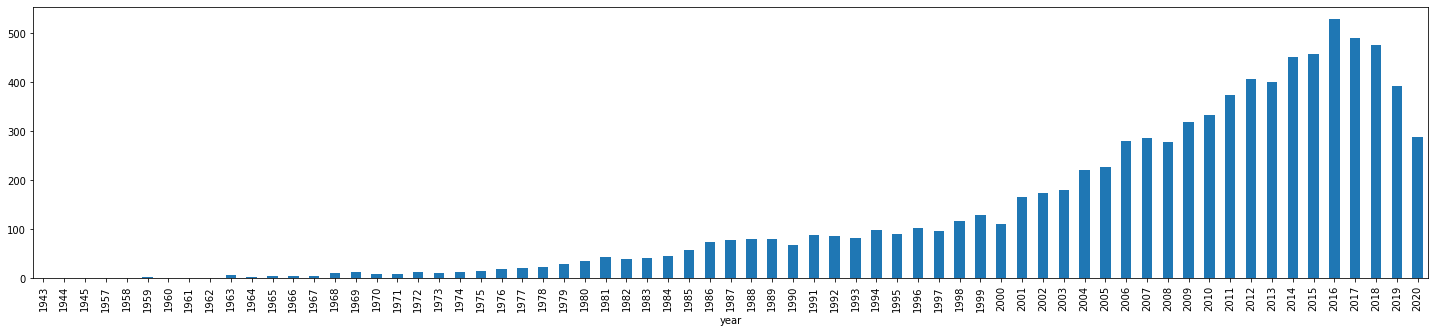

In [287]:
anime_yearly = anime.groupby("year").size().head(100)
anime_yearly.plot.bar(figsize=(25, 5))

Kot smo predvidevali, se z razvojem tehnologije, predvsem pa dostopnostjo in posledično s povpraševanjem količina adaptiranega animeja vse do leta 2016, ko je anime nekako postal veliko bolj običajen. Vse do nedavnega se je namreč o navdušencih animeja govorilo, kot o drugi rasi. Ampak se je zahvaljujoč dostopnosti in razširjenosti v zadnjih letih ta predsodek do ljudi, ki so gledali anime močno omilili, da ne rečem celo izpuhtel. V zadnjih letih pa vidimo nov upad saj se je začel nov trend in sicer animirani filmi. Gre za to, da namesto, da studio naredi anime serijo z 12 epizodami (trajanje okoli 4h), raje naredijo film (trajanje okoli 2h). Izkaže se, da je vrtenje filma v kinu veliko bolj finančno ugodno, kot vrtenje preko televizijskih zaslonov. Tako si studia za filme po navadi vzamejo več časa in reducirajo delo na večih animejih hkrati. 
Pa bi nas moralo skrbeti, da je v letu 2020 in 2019 bilo skoraj vsako leto 100 animejv manj? 
Verjetno ne. Kasneje si bomo pogledali, ali ima leto izida vpliv na oceno, v smislu, ali so novejši animeji generalno bolje ocenjeni, kot starejši. To bi bil pravzaprav korak, v dobro smer, saj bi to pomenilo, da se studia raje bolj posvečajo enemu projektu in tega naredijo bolje, kot pa dva površno. Poleg tega se pozna, da je bilo v času COVID-19 veliko projektov prestavljenih in je zato za leto 2021 napovedanih veliko tako novih naslovov, kot nadaljevanj.


<AxesSubplot:xlabel='year', ylabel='score'>

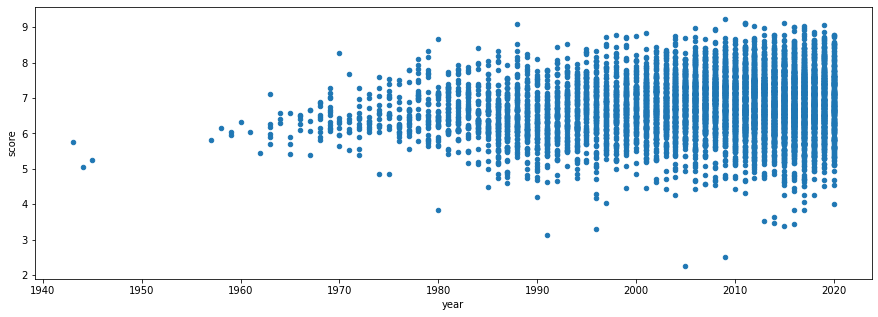

In [296]:
anime.plot.scatter(x="year", y="score", figsize=(15, 5 ))

Ta grafika nam ne pove prav veliko, razen tega, da se količina dobrih animejev veča z vsakim letom, neodvisno od tega, ali novih animejev več ali manj. Vidimo le nek vzorec, da približno enkrat na leto ali pa na vsako drugo leto je javnosti predstavljen nov anime, ki je v primerjavi z ostalimi (tisto leto) zelo visoko. Kakšen poznavalec bi lahko celo določil katero od posameznih pik na vrhu.

In [306]:
anime_by_year_mean = anime.groupby("year").mean().head(100)
anime_by_year_mean["score"].sort_values(ascending=False).head(20)

year
2008    7.043094
1978    6.962609
2009    6.944420
2007    6.940871
2011    6.891070
2012    6.887118
2006    6.886940
2005    6.885727
2010    6.883874
1995    6.877582
2014    6.874181
2019    6.870077
2013    6.863325
2015    6.838775
2018    6.823718
2020    6.823599
2000    6.809636
2004    6.803091
2017    6.784094
2003    6.781611
Name: score, dtype: float64

Leto z najboljšo povprečno oceno je leto 2008. Vendar pa vidimo, da razlike niso velike. Poglejmo še grafično, ker si bomo lažje predstavljali.

<AxesSubplot:xlabel='year'>

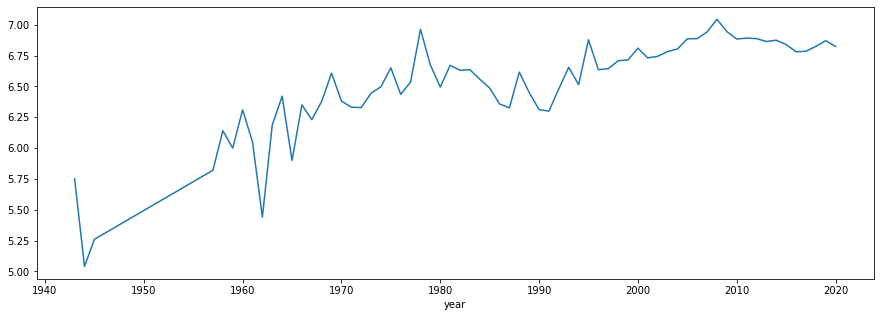

In [314]:
anime_by_year_mean["score"].plot.line(figsize=(15, 5 ))

Opazimo, se povprečno anime boljša vse so leta 2008, potem pa celo malo pade. Zakaj točno je to res, težko trdim vendar bom poskušal pojasniti.
Kakor smo že prej opazili se število animejev iz leta v leto veča, kar pomeni, da dobri animeji manj vplivajo na skupna oceno. Ampak, ker je vzore tako zelo velik, je to le kaplja v morje, torej mora obstajat še en razlog. Od leta 2010 se je začelo veliko novih trendov. Eden med njimi so animeji, ki so zelo med seboj precej podobni, s tu in tam kakšno razliko in pravzaprav je čudež da še po skoraj desetih letih molzenja takih tipov animeja zanimanje še kar ne pade. To so animeji, ki nimajo težke zgodbe, so po navadi komedične narave in so po definiciji zlata sredina oz. v jeziku ocen 7. Skoraj vsak studio se preizkusi v enem takem šovu. Najbolj značilni sta dve zelo očitni "kategoriji" takih animejev: *"Slice of Life + School Life + Romance / Comedy / Drama"* in *"Isekai"*. Kaj točno ta te dve "kategoriji" animejev, sem opisal na koncu analize.


In [328]:
anime[anime["year"] == 2008].sort_values("score", ascending=False).head(10)


name    id  episodes  \
3512    Clannad: After Story (Clannad ~After Story~)  4181        24   
2649              Code Geass: Hangyaku no Lelouch R2  2904        25   
3553                  Kara no Kyoukai 5: Mujun Rasen  4282         1   
2917                            Aria the Origination  3297        13   
3909                                        One Outs  5040        25   
3460  Natsume Yuujinchou (Natsume's Book of Friends)  4081        13   
4800                      Gintama: Shiroyasha Koutan  6945         1   
2701          Ookami to Koushinryou (Spice and Wolf)  2966        13   
3539                                       Toradora!  4224        25   
2870                                        Major S4  3226        26   

               status         aired           studio        source  \
3512  Finished Airing   Oct 3, 2008  Kyoto Animation  Visual novel   
2649  Finished Airing   Apr 6, 2008          Sunrise      Original   
3553  Finished Airing  Aug 16, 2008         ufotable   Light novel   
2917  Finished Airing   Jan 8, 2008   Hal Film Maker         Manga   
3909  Finished Airing   Oct 8, 2008         Madhouse         Manga   
3460  Finished Airing   Jul 8, 2008     Brain's Base         Manga   
4800  Finished Airing  Sep 21, 2008          Sunrise         Manga   
2701  Finished Airing   Jan 9, 2008           Imagin   Light novel   
3539  Finished Airing   Oct 2, 2008        J.C.Staff   Light novel   
2870  Finished Airing   Jan 5, 2008        SynergySP         Manga   

                              rating  score finished airing  year  season  
3512       PG-13 - Teens 13 or older   8.96    Mar 27, 2009  2008    Fall  
2649  R - 17+ (violence & profanity)   8.91    Sep 28, 2008  2008  Spring  
3553  R - 17+ (violence & profanity)   8.57             NaN  2008  Summer  
2917                    G - All Ages   8.54     Apr 1, 2008  2008  Winter  
3909       PG-13 - Teens 13 or older   8.36     Apr 1, 2009  2008    Fall  
3460       PG-13 - Teens 13 or older   8.34    Sep 30, 2008  2008  Summer  
4800       PG-13 - Teens 13 or older   8.34             NaN  2008  Summer  
2701       PG-13 - Teens 13 or older   8.28    Mar 26, 2008  2008  Winter  
3539       PG-13 - Teens 13 or older   8.27    Mar 26, 2009  2008    Fall  
2870       PG-13 - Teens 13 or older   8.25    Jun 28, 2008  2008  Winter

Sedaj pa pokukajmo še na najboljše animeje vsakega leta.

In [338]:
Y = anime["year"].unique()

for year in sorted(Y):
    display(year)
    filter1 = anime[anime["year"] == year] 
    display(filter1[["name", "score"]].head(5))

1943

name  score
3403  Kumo to Tulip (The Spider and the Tulip)   5.75

1944

name  score
5014  Fuku-chan no Sensuikan   5.04

1945

name  score
2538  Momotarou: Umi no Shinpei (Momotaro: Sacred Sa...   5.26

1957

name  score
4829  Koneko no Rakugaki   5.82

1958

name  score
3665  Hakujaden (The Great White Snake)   6.14

1959

name  score
4830                  Koneko no Studio (Kitty's Studio)   6.05
3873  Shounen Sarutobi Sasuke (The Adventures of Lit...   5.95

1960

name  score
3642  Saiyuuki (Alakazam the Great)   6.31

1961

name  score
5052  Anju to Zushioumaru   6.05

1962

name  score
5124  Arabian Nights: Sindbad no Bouken   5.44

1963

name  score
2522                          Tetsuwan Atom (Astro Boy)   7.10
3342  Wanpaku Ouji no Orochi Taiji (Orochi, the Eigh...   6.26
2463                         Tetsujin 28-gou (Gigantor)   6.19
5179                     Sennin Buraku (Hermit Village)   5.98
3916                                   Eightman (8 Man)   5.89

1964

name  score
4756                 Da Nao Tiangong (Uproar in Heaven)   6.58
1861                                   Ningyo (Mermaid)   6.40
6127  Tetsuwan Atom: Uchuu no Yuusha (Astro Boy: The...   6.28

1965

name  score
1424  Jungle Taitei (Kimba the White Lion)   6.58
2602              Gulliver no Uchuu Ryokou   5.90
1805                    Shizuku (The Drop)   5.70
6681                        Tobacco to Hai   5.42

1966

name  score
2345           Jungle Taitei: Susume Leo!   6.51
5917                         Osomatsu-kun   6.48
2954  Mahoutsukai Sally (Sally the Witch)   6.40
8212                  Jungle Taitei Movie   6.26
4764                           Cyborg 009   6.10

1967

name  score
1314                          Mach GoGoGo (Speed Racer)   6.66
2749                  Ribbon no Kishi (Princess Knight)   6.65
3339                             Ougon Bat (Golden Bat)   6.36
2464  Gokuu no Daibouken (Adventures of the Monkey K...   6.08
5717  Shounen Jack to Mahoutsukai (Young Jack and th...   5.40

1968

name  score
5324                       Cyborg 009 (TV) (Cyborg 009)   6.89
4300                                    Kyojin no Hoshi   6.85
4252                           Gegege no Kitarou (1968)   6.76
949   Taiyou no Ouji: Horus no Daibouken (The Little...   6.53
2830                                       Kaibutsu-kun   6.46

1969

name  score
2737                     Tiger Mask   7.27
4273  Dororo to Hyakkimaru (Dororo)   7.14
5261                         Muumin   7.03
2079        Nagagutsu wo Haita Neko   7.01
1403                    Attack No.1   6.75

1970

name  score
2192      Ashita no Joe (Tomorrow's Joe)   8.28
3309  Konchuu Monogatari Minashigo Hutch   6.42
3317     Kick no Oni (Demon of the Kick)   6.34
3480                  Mahou no Mako-chan   6.30
7752      Tiger Mask Fuku Men League Sen   6.15

1971

name  score
1281                                     Lupin III   7.67
4814                      Gegege no Kitarou (1971)   6.51
3299  Doubutsu Takarajima (Animal Treasure Island)   6.41
1391   Genshi Shounen Ryuu (Ryu the Primitive Boy)   6.31
6546   Match Uri no Shoujo (The Little Match Girl)   6.12

1972

name  score
2057                              Mazinger Z   7.27
2180  Kagaku Ninja-tai Gatchaman (Gatchaman)   6.96
2390        Panda Kopanda (Panda! Go Panda!)   6.76
5262                           Muumin (1972)   6.58
4210                          Dokonjou Gaeru   6.45

1973

name  score
2865  Kanashimi no Belladonna (Belladonna of Sadness)   7.12
287                                     Ace wo Nerae!   7.00
3807      Shinzou Ningen Casshern (Neo Human Casshan)   6.72
1505                                      Cutey Honey   6.47
5933                                   Samurai Giants   6.35

1974

name  score
1495  Uchuu Senkan Yamato (Star Blazers: The Quest f...   7.60
2032                               Alps no Shoujo Heidi   7.28
4233                                     Great Mazinger   7.06
3124                                        Getter Robo   6.79
2976                                  Majokko Megu-chan   6.66

1975

name  score
1802                      UFO Robo Grendizer   7.54
2333     Flanders no Inu (A Dog of Flanders)   7.39
2594  Arabian Nights: Sindbad no Bouken (TV)   7.19
4031    Gamba no Bouken (Adventure of Gamba)   7.08
3525                           Koutetsu Jeeg   7.02

1976

name  score
2571                                        Candy Candy   7.51
1507                          Haha wo Tazunete Sanzenri   7.39
4498  Manga Sekai Mukashibanashi (Manga Fairy Tales ...   7.02
3235  Nagagutsu wo Haita Neko: 80 Nichikan Sekai Isshuu   6.89
970                        Chou Denji Robo Combattler V   6.70

1977

name  score
1294                                 Lupin III: Part II   7.80
2597                                         Ie Naki Ko   7.79
971                         Chou Denji Machine Voltes V   7.46
2007  Muteki Choujin Zanbot 3 (Invincible Superman Z...   6.89
2736                       Time Bokan Series: Yatterman   6.68

1978

name  score
278              Mirai Shounen Conan (Future Boy Conan)   8.09
2397                                         Takarajima   7.94
1353                                 Ginga Tetsudou 999   7.81
905   Uchuu Kaizoku Captain Herlock (Space Pirate Ca...   7.71
2329                                 Perrine Monogatari   7.50

1979

name  score
314   Versailles no Bara (The Rose of Versailles)   8.33
1299               Lupin III: Cagliostro no Shiro   8.15
59                             Mobile Suit Gundam   7.79
259          Akage no Anne (Anne of Green Gables)   7.70
2259                   Doraemon (1979) (Doraemon)   7.69

1980

name  score
2661                      Ashita no Joe 2 (Rocky Joe 2)   8.67
2860                                      Ganbare Genki   7.32
2357  Tom Sawyer no Bouken (The Adventures of Tom Sa...   7.16
2765            Tetsuwan Atom (1980) (Astro Boy (1980))   7.15
2660                              Ashita no Joe (Movie)   7.12

1981

name  score
2499                  Daicon Opening Animations   7.72
1181                             Urusei Yatsura   7.69
991   Mobile Suit Gundam II: Soldiers of Sorrow   7.39
2061                      Taiyou no Kiba Dagram   7.32
4298                           Tiger Mask Nisei   7.32

1982

name  score
988                                             Macross   7.94
2536  Densetsu Kyojin Ideon: Hatsudou-hen (The Ideon...   7.81
992         Mobile Suit Gundam III: Encounters in Space   7.78
2239                Space Cobra (Space Adventure Cobra)   7.71
1169  Taiyou no Ko Esteban (The Mysterious Cities of...   7.69

1983

name  score
2537                                     Igano Kabamaru   7.88
1655                      Hadashi no Gen (Barefoot Gen)   7.80
2362       Soukou Kihei Votoms (Armored Trooper Votoms)   7.73
1702  Plawres Sanshirou (Plastic Model Wrestling San...   7.40
1929                                    Captain Tsubasa   7.30

1984

name  score
537   Kaze no Tani no Nausicaä (Nausicaä of the Vall...   8.41
872              Hokuto no Ken (Fist of the North Star)   7.99
989                      Macross: Do You Remember Love?   7.97
1747          Urusei Yatsura Movie 2: Beautiful Dreamer   7.81
1791                  Meitantei Holmes (Sherlock Hound)   7.38

1985

name  score
967                                     Touch   8.03
64                    Mobile Suit Zeta Gundam   7.92
2327  Shoukoujo Sara (A Little Princess Sara)   7.68
800            Tenshi no Tamago (Angel's Egg)   7.68
1350                                  Area 88   7.53

1986

name  score
480         Tenkuu no Shiro Laputa (Castle in the Sky)   8.32
1319                                     Maison Ikkoku   8.19
552                              Ginga Nagareboshi Gin   8.04
200                                        Dragon Ball   8.02
1144  Saint Seiya (Saint Seiya: Knights of the Zodiac)   7.79

1987

name  score
1332                                 City Hunter   7.94
1225  Hokuto no Ken 2 (Fist of the North Star 2)   7.56
987                         Kimagure Orange☆Road   7.56
939      Ouritsu Uchuugun: Honneamise no Tsubasa   7.54
2034                                 Lady Lady!!   7.53

1988

name  score
741   Ginga Eiyuu Densetsu (Legend of the Galactic H...   9.10
542             Hotaru no Haka (Grave of the Fireflies)   8.51
490               Tonari no Totoro (My Neighbor Totoro)   8.34
28                                                Akira   8.17
1333                                      City Hunter 2   8.06

1989

name  score
479   Majo no Takkyuubin (Kiki's Delivery Service)   8.25
734                                  Dragon Ball Z   8.17
61      Mobile Suit Gundam 0080: War in the Pocket   7.89
1334                                 City Hunter 3   7.83
187                                        Ranma ½   7.77

1990

name  score
1962                               Tanoshii Muumin Ikka   8.10
1244    Watashi no Ashinaga Ojisan (My Daddy Long Legs)   7.77
858                                   Chibi Maruko-chan   7.65
891   Dragon Ball Z Special 1: Tatta Hitori no Saish...   7.58
1178                   Kidou Keisatsu Patlabor: New OVA   7.54

1991

name  score
1335                                 City Hunter '91   7.78
722            Oniisama e... (Brother, Dear Brother)   7.78
2528    Ushiro no Shoumen Daare (Who's Left Behind?)   7.77
2036             Dragon Quest: Dai no Daibouken (TV)   7.65
2337  Trapp Ikka Monogatari (The Trapp Family Story)   7.63

1992

name  score
368        Yuu☆Yuu☆Hakusho (Yu Yu Hakusho: Ghost Files)   8.44
768                                  Kyou kara Ore wa!!   8.07
389                       Kurenai no Buta (Porco Rosso)   7.99
3857                Ramayana: The Legend of Prince Rama   7.99
2117  Giant Robo the Animation: Chikyuu ga Seishi Su...   7.85

1993

name  score
148                                           Slam Dunk   8.53
2743  Ginga Eiyuu Densetsu: Arata Naru Tatakai no Ov...   8.13
996                 Kidou Keisatsu Patlabor 2 the Movie   7.89
534   Musekinin Kanchou Tylor (The Irresponsible Cap...   7.88
912                                         Ranma ½ OVA   7.76

1994

name  score
3344  Ginga Sengoku Gunyuuden Rai (Galaxy Warring St...   7.96
499       Bishoujo Senshi Sailor Moon S (Sailor Moon S)   7.85
445                                        Macross Plus   7.72
902   Bishoujo Senshi Sailor Moon S: Kaguya-hime no ...   7.68
507   Tenchi Muyou! Ryououki 2nd Season (Tenchi Muyo...   7.67

1995

name  score
2339  Romeo no Aoi Sora (Romeo and the Black Brothers)   8.37
20                             Neon Genesis Evangelion   8.31
24               Koukaku Kidoutai (Ghost in the Shell)   8.30
548            Mimi wo Sumaseba (Whisper of the Heart)   8.24
244                                         Golden Boy   8.02

1996

name  score
26    Rurouni Kenshin: Meiji Kenkaku Romantan (Rurou...   8.32
211                       Detective Conan (Case Closed)   8.17
502                                        Slayers Next   8.05
1348                    Kodomo no Omocha (TV) (Kodocha)   8.05
60                 Mobile Suit Gundam: The 08th MS Team   8.03

1997

name  score
142                 Mononoke Hime (Princess Mononoke)   8.73
22     Neon Genesis Evangelion: The End of Evangelion   8.51
23                     Kenpuu Denki Berserk (Berserk)   8.48
412   Shoujo Kakumei Utena (Revolutionary Girl Utena)   8.19
1890                     Kindaichi Shounen no Jikenbo   7.99

1998

name  score
0             Cowboy Bebop   8.79
409           Perfect Blue   8.45
162  Initial D First Stage   8.28
2                   Trigun   8.24
208      Cardcaptor Sakura   8.16

1999

name  score
25   Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...   8.73
221                              Great Teacher Onizuka   8.70
11                                           One Piece   8.49
115                                    Hunter x Hunter   8.43
163                             Initial D Second Stage   8.13

2000

name  score
239                 Hajime no Ippo (Fighting Spirit)   8.76
348     Cardcaptor Sakura Movie 2: Fuuin Sareta Card   8.22
1251     Yuusha-Ou GaoGaiGar Final (GaoGaiGar Final)   8.08
1232  Detective Conan Movie 04: Captured in Her Eyes   8.05
203                                             FLCL   8.03

2001

name  score
176       Sen to Chihiro no Kamikakushi (Spirited Away)   8.84
1     Cowboy Bebop: Tengoku no Tobira (Cowboy Bebop:...   8.39
1233      Detective Conan Movie 05: Countdown to Heaven   8.15
114                                        Hikaru no Go   8.12
377   Rurouni Kenshin: Meiji Kenkaku Romantan - Seis...   8.00

2002

name  score
438               Koukaku Kidoutai: Stand Alone Complex   8.45
116           Hunter x Hunter: Original Video Animation   8.34
1234  Detective Conan Movie 06: The Phantom of Baker...   8.32
938                   Sennen Joyuu (Millennium Actress)   8.28
663                                       Princess Tutu   8.15

2003

name  score
456  Kino no Tabi: The Beautiful World (Kino's Jour...   8.35
305                                           Planetes   8.31
240  Hajime no Ippo: Champion Road (Fighting Spirit...   8.30
694                                   Tokyo Godfathers   8.29
241                 Hajime no Ippo: Mashiba vs. Kimura   8.23

2004

name  score
9                                          Monster   8.74
404     Howl no Ugoku Shiro (Howl's Moving Castle)   8.67
728  Koukaku Kidoutai: Stand Alone Complex 2nd GIG   8.54
182                               Samurai Champloo   8.50
38               Beck (Beck: Mongolian Chop Squad)   8.32

2005

name  score
428                                Mushishi (Mushi-Shi)   8.70
523                                            Major S2   8.26
2237  Koukaku Kidoutai: Stand Alone Complex - The La...   8.10
1793                 Glass no Kamen (2005) (Glass Mask)   8.10
213           Koukyoushihen Eureka Seven (Eureka Seven)   8.10

2006

name  score
833                           Gintama   8.97
1427  Code Geass: Hangyaku no Lelouch   8.72
1389                       Death Note   8.62
792                              Nana   8.45
708                 Hellsing Ultimate   8.41

2007

name  score
1816     Tengen Toppa Gurren Lagann (Gurren Lagann)   8.67
2055                                       Baccano!   8.42
2051                                       Mononoke   8.42
1539                               Nodame Cantabile   8.33
2208  Stranger: Mukou Hadan (Sword of the Stranger)   8.32

2008

name  score
3512  Clannad: After Story (Clannad ~After Story~)   8.96
2649            Code Geass: Hangyaku no Lelouch R2   8.91
3553                Kara no Kyoukai 5: Mujun Rasen   8.57
2917                          Aria the Origination   8.54
3909                                      One Outs   8.36

2009

name  score
3946                   Fullmetal Alchemist: Brotherhood   9.22
4025  Hajime no Ippo: New Challenger (Fighting Spiri...   8.68
4050  Zoku Natsume Yuujinchou (Natsume's Book of Fri...   8.57
3696     Tengen Toppa Gurren Lagann Movie 2: Lagann-hen   8.57
3900                                           Major S5   8.46

2010

name  score
4939                      Suzumiya Haruhi no Shoushitsu   8.67
5123         Yojouhan Shinwa Taikei (The Tatami Galaxy)   8.61
4435      Rainbow: Nisha Rokubou no Shichinin (Rainbow)   8.52
4991  Gintama Movie 1: Shinyaku Benizakura-hen (Gint...   8.52
5071                                           Major S6   8.39

2011

name  score
5647                                        Steins;Gate   9.12
6431           Hunter x Hunter (2011) (Hunter x Hunter)   9.11
5965                        Gintama' (Gintama Season 2)   9.08
6148  Natsume Yuujinchou San (Natsume's Book of Frie...   8.60
6053             Nichijou (Nichijou - My Ordinary Life)   8.48

2012

name  score
7208           Gintama': Enchousen (Gintama: Enchousen)   9.04
6538  Natsume Yuujinchou Shi (Natsume's Book of Frie...   8.68
6689       Ookami Kodomo no Ame to Yuki (Wolf Children)   8.66
6692                     Bakuman. 3rd Season (Bakuman.)   8.60
6563          Fate/Zero 2nd Season (Fate/Zero Season 2)   8.60

2013

name  score
7196  Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...   8.97
7521                   Monogatari Series: Second Season   8.78
8055  Hajime no Ippo: Rising (Hajime No Ippo: The Fi...   8.60
6521         Steins;Gate Movie: Fuka Ryouiki no Déjà vu   8.51
7393               Shingeki no Kyojin (Attack on Titan)   8.45

2014

name  score
9096                      Mushishi Zoku Shou 2nd Season   8.77
8806        Shigatsu wa Kimi no Uso (Your Lie in April)   8.77
8491      Mushishi Zoku Shou (MUSHI-SHI -Next Passage-)   8.73
8535                            Ping Pong the Animation   8.63
8363  Mushishi: Hihamukage (The Shadow that Devours ...   8.58

2015

name  score
9813                         Gintama° (Gintama Season 4)   9.11
9795       Haikyuu!! Second Season (Haikyu!! 2nd Season)   8.77
9808                 Mushishi Zoku Shou: Suzu no Shizuku   8.64
10326                                      One Punch Man   8.60
9349   JoJo no Kimyou na Bouken Part 3: Stardust Crus...   8.47

2016

name  score
9786                     Koe no Katachi (A Silent Voice)   9.01
11148                        Kimi no Na wa. (Your Name.)   9.00
11460  Haikyuu!!: Karasuno Koukou vs. Shiratorizawa G...   8.90
10951  Kizumonogatari II: Nekketsu-hen (Kizumonogatar...   8.62
9761   Shouwa Genroku Rakugo Shinjuu (Showa Genroku R...   8.60

2017

name  score
12700  3-gatsu no Lion 2nd Season (March Comes In Lik...   9.02
12061                        Gintama. (Gintama Season 5)   8.98
12734  Owarimonogatari 2nd Season (Owarimonogatari Se...   8.93
10952                   Kizumonogatari III: Reiketsu-hen   8.82
12315                                      Made in Abyss   8.76

2018

name  score
14040   Gintama.: Shirogane no Tamashii-hen - Kouhan-sen   8.85
13657  Gintama.: Shirogane no Tamashii-hen (Gintama.:...   8.80
14360     JoJo no Kimyou na Bouken Part 5: Ougon no Kaze   8.63
11687                                  Violet Evergarden   8.63
13199  Kimi no Suizou wo Tabetai (I want to eat your ...   8.60

2019

name  score
14687                 Shingeki no Kyojin Season 3 Part 2   9.07
14053                                  Mob Psycho 100 II   8.86
14060                                       Vinland Saga   8.72
14574  Seishun Buta Yarou wa Yumemiru Shoujo no Yume ...   8.70
14368  Kimetsu no Yaiba (Demon Slayer: Kimetsu no Yaiba)   8.67

2020

name  score
15961  Kaguya-sama wa Kokurasetai?: Tensai-tachi no R...   8.79
13670   Made in Abyss Movie 3: Fukaki Tamashii no Reimei   8.78
11520  Fate/stay night Movie: Heaven's Feel - III. Sp...   8.76
16048                                    Tian Guan Ci Fu   8.72
15412   Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season   8.59

### Anime glede na rating


Kot vsak vizualni medij ima tudi vsak anime svoj rating, ki naj bi označil ciljno skupino gledalcev, oz. povedano drugače, označil za koga anime zaradi takšnih in drugačnih vsebin ni primeren. 
Rating je popolnoma enak, kot pri filmih, vključno z oznakami, zato pobo predvideli, da je bralec sorazmerno seznanjen s tem. Tako ali tako, predvidevam, da rating ne bo vplival na oceno prav veliko, bomo pa vseeno pogledali, morda pa nas kaj preseneti. Če ne kaj drugega bomo ponovno naredili najboljših 5 za vsak rating.

In [354]:
R = anime[anime["rating"] != "None"]["rating"].unique()
R

array(['R - 17+ (violence & profanity)', 'PG-13 - Teens 13 or older',
       'PG - Children', 'R+ - Mild Nudity', 'G - All Ages', 'Rx - Hentai'],
      dtype=object)

In [355]:
rating = anime.groupby("rating").size()
rating

rating
G - All Ages                      1195
None                               105
PG - Children                      609
PG-13 - Teens 13 or older         4575
R - 17+ (violence & profanity)     959
R+ - Mild Nudity                   733
Rx - Hentai                        416
dtype: int64

Iz tega sedaj vidimo, da je večina animejev primernih za najstnike, potem pa jih je še kar nekaj za mladostnike in še manj za odrasle. Za nekaj jih nimamo podatkov.
Večji del animejev je torej namenjenih najstnikom, saj naj bi te imeli največ časa, prav tako, velik delež zgodb, ki ji uprizarjajo animeji govori o glavnih likih, ki so prav tako najstniki in se zato najstniki v realnem življenju z njimi najlažje poistovetijo. 

Poglejmo si še povprečno oceno glede na rating.


rating
R - 17+ (violence & profanity)    7.104588
PG-13 - Teens 13 or older         6.901537
PG - Children                     6.604975
R+ - Mild Nudity                  6.568240
G - All Ages                      6.508017
Rx - Hentai                       6.459087
Name: score, dtype: float64

<AxesSubplot:xlabel='rating'>

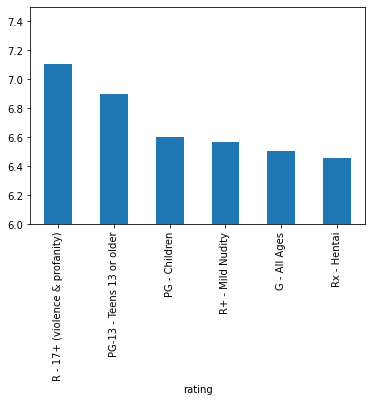

In [377]:
rating_mean = anime[anime["rating"] != "None"].groupby("rating").mean().sort_values("score",ascending=False)
display(rating_mean["score"])
rating_mean["score"].plot.bar(ylim=(6,7.5))

Kot lahko vidimo, so razlike majhne, saj je velika količina podatkov, vendar razlika za 0,2 med prvim in drugim mestom zato pove kar veliko. 
Razmislimo, zakaj je vrstni red, takšen kakor je. Rating R-17+ vsebuje vse, kar večina ljudi pritegne k animeju na prvem mestu:
- Zgodbo, brez t.i. *plot armorja* (zgodba, ki je speljana tako, da glavni junak nikoli ne more biti na slabšem, oz. vedno najde rešitev iz nemogočih položajev, po navadi v pretiranem slogu)
- Bolj dodelane karakterje glavnih junakov (govorim o motivu, ciljih itd.)
- Bolj realno doživetje (zaradi načina uprizoritve se lahko starejše osebe bolj navežejo na junake)
- Ukvarja se z bolj kompleksnimi procesi, idejami, ki so lahko po svoji naravi moralno sporni


Skratka, R-17+ omogoča uprizarjanje vsega kar lahko ostali in še več (kar je za zgodbo pomembno)
Seveda obstajajo animeji, ki so namenjeni najstnikom in vsebujejo kakšnega od zgornjih navedkov, ampak na splošno gledano, so te tri zadeve veliko večkrat prisotne v animejih z R-17+ kot npr. PG-13.

Najprej je potem jasno. Najstniki pa tudi ne-najstniki se lahko povežejo z glavnimi junaki tudi v serija z PG-13 ampak na splošen ton serije je drugačen. Zelo dober primer je smrt. V večini primerov se v R-17+ nek pretep konča tako, da bodisi en obleži, ali pa celo umre, medtem, ko se v PG-13 slednje redko zgodi. Ta meja se sicer iz leta v leto spušča. Vseeno pa se moramo vprašati: Zakaj potem ni R+ pred R-17+ ? Brez težav bi vsebovalo vse kar vsebuje R-17+ in še več.
Preprosto, ker v dosti primerih je golota pretiravana ali pa preprosto ne paše v kontekst. Za to je verjetno "kriva anime kultura", ki konkretno pretirava pri seksualizaciji.

Rx ne bi ravno komentiral, ampak to je analogno temu, da je snemana pornografija vedno slabše ocenjena kot sneman film. Je pa treba opozorit, da se sploh v zadnjih letih, tam nekje od 2018 naprej, meja med Rx in pa R+ močno tanjša in so predstavniki, ki bi morda že morali biti eno, ko so sicer označeni, kot drugo.


In [408]:
Rt = anime[anime["rating"]!="None"]["rating"].unique()

for rating in sorted(Rt):
    display(rating)
    filter1 = anime[anime["rating"] == rating]
    filter_gintama =  filter1[(filter1["name"].str.contains("Gintama", re.IGNORECASE) == False) | (filter1["name"].str.contains("Gintama Season 4"))]
    display(filter_gintama[["name", "score","year", "episodes"]].head(5))

'G - All Ages'

name  score  year  episodes
404    Howl no Ugoku Shiro (Howl's Moving Castle)   8.67  2004         1
2917                         Aria the Origination   8.54  2008        13
6159                           Hotarubi no Mori e   8.40  2011         1
12137                                     Shelter   8.35  2016         1
490         Tonari no Totoro (My Neighbor Totoro)   8.34  1988         1

'PG - Children'

name  score  year  episodes
176    Sen to Chihiro no Kamikakushi (Spirited Away)   8.84  2001         1
6689    Ookami Kodomo no Ame to Yuki (Wolf Children)   8.66  2012         1
17259                                        Gotcha!   8.47  2020         1
480       Tenkuu no Shiro Laputa (Castle in the Sky)   8.32  1986         1
348     Cardcaptor Sakura Movie 2: Fuuin Sareta Card   8.22  2000         1

'PG-13 - Teens 13 or older'

name  score  year  \
5647                                         Steins;Gate   9.12  2011   
9813                         Gintama° (Gintama Season 4)   9.11  2015   
6431            Hunter x Hunter (2011) (Hunter x Hunter)   9.11  2011   
12700  3-gatsu no Lion 2nd Season (March Comes In Lik...   9.02  2017   
9786                     Koe no Katachi (A Silent Voice)   9.01  2016   

       episodes  
5647         24  
9813         51  
6431        148  
12700        22  
9786          1

'R - 17+ (violence & profanity)'

name  score  year  \
3946                    Fullmetal Alchemist: Brotherhood   9.22  2009   
741    Ginga Eiyuu Densetsu (Legend of the Galactic H...   9.10  1988   
14687                 Shingeki no Kyojin Season 3 Part 2   9.07  2019   
12734  Owarimonogatari 2nd Season (Owarimonogatari Se...   8.93  2017   
2649                  Code Geass: Hangyaku no Lelouch R2   8.91  2008   

       episodes  
3946         64  
741         110  
14687        10  
12734         7  
2649         25

'R+ - Mild Nudity'

name  score  year  episodes
9                                            Monster   8.74  2004        74
3696  Tengen Toppa Gurren Lagann Movie 2: Lagann-hen   8.57  2009         1
22    Neon Genesis Evangelion: The End of Evangelion   8.51  1997         1
23                    Kenpuu Denki Berserk (Berserk)   8.48  1997        25
792                                             Nana   8.45  2006        47

'Rx - Hentai'

name  score  year  episodes
9958                           Mankitsu Happening   7.74  2015         4
9230   Rance 01: Hikari wo Motomete The Animation   7.65  2014         4
16388                  Ane wa Yanmama Junyuu-chuu   7.61  2020         2
6330          Eroge! H mo Game mo Kaihatsu Zanmai   7.58  2011         6
13576               Youkoso! Sukebe Elf no Mori e   7.51  2018         4

### Anime sezone

Najbolj unikatna zadeva, ki jo pozna le anime svet (poleg žanra Slice of Life), je izhajanje animjevem po sezonah. Štirikrat letno se obrne sezona. Sezone se poimenovane po letnih časih, vendar se ne pokrivajo točno z letnimi časi (vsaj v Sloveniji ne). Vsaka sezona traja 3 mesece, kar je ravno:
(1 epizoda na teden) $\times$  (4 tedni v mesecu)  $\times$  (3 meseci v sezoni) = 12 epizod

Sezone pa so sledeče:
- Zima ("Winter") -> januar, februar, marec
- Pomlad ("Spring") -> april, maj, junij
- Poletje ("Summer") -> julij, avgust, september
- Jesen ("Fall") -> oktober, november, december

Sedaj pa se vprašajmo, ali lahko sezona vpliva na oceno? Predvideval sem, da bo studio malo vplival na oceno, pa ni. Predvideval sem da bo leto, pa je manj kot sem pričakoval. Povsem realno, od tega v kateri sezoni izide anime, ne pričakujem ničesar posebnega, morda pa bo videti kaj zanimivega.


season
Fall      6.826869
Spring    6.819683
Summer    6.772776
Winter    6.778865
Name: score, dtype: float64

<AxesSubplot:xlabel='season'>

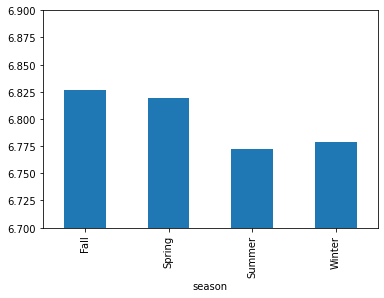

In [389]:
seasons = anime.groupby("season").mean()["score"]
display(seasons)
seasons.plot.bar(ylim=(6.7, 6.9))

Izgleda, da najboljši animeji prihajajo v jesenski sezoni. Je to mogoče kako posebej utemeljiti? Poglejmo še število animijev, ki so do sedaj prišlo v posamezni sezoni.

season
Fall      2338
Spring    2146
Summer    2032
Winter    1983
dtype: int64

<AxesSubplot:xlabel='season'>

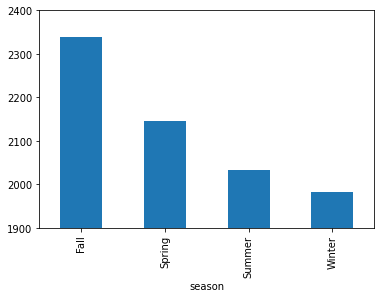

In [433]:
seasons_size = anime.groupby("season").size()
display(seasons_size)
seasons_size.plot.bar(ylim=(1900, 2400))

Vidimo, da sta jesenska in pomladna sezona veliko bolj napolnjeni, kot drugi dve. Poskusimo premisliti zakaj.
Anime produkcija traja približno eno leto (vključno z izbiro literature za adaptacijo itd.). Po navadi objavijo projekt za 6 mesecev naprej, 2 meseca pred začetkom imajo po navadi že vse končano, tako da možni dopusti (ki so na Japonskem sicer precej redki) ne igrajo glavne vloge.
Ugotovili smo, da so glavna ciljna skupina najstniki. Bilo bi škoda, če bi vrteli anime, najstniki pa le te ne bi imeli časa gledati. In to bi bilo ravno med zimsko in poletno sezono. Namreč, v teh dveh obdobjih je konec konferenc in takrat so semestrski testi v vseh šolah. Preostali animeji, ki pridejo v času zimske ali poletne sezone pa so bodisi namenjeni odraslim, ali pa izkoriščajo, da je takrat okrnjena konkurenca. 

Pa poglejmo še najboljše predstavnike vsake sezone. Ker so sezone samo 4 bomo navedli 10 najboljših.


In [429]:
Sea = anime[anime["season"]!= None]["season"].unique()

for season in Sea:
    if season in ["Spring", "Summer", "Fall", "Winter"]:
        display(season)
        filter1 = anime[anime["season"] == season]
        filter_gintama =  filter1[(filter1["name"].str.contains("Gintama", re.IGNORECASE) == False) | (filter1["name"].str.contains("Gintama Season 4"))]
        display(filter_gintama[["name", "score", "aired", "finished airing", "episodes"]].head(10))


'Spring'

name  score         aired  \
3946                    Fullmetal Alchemist: Brotherhood   9.22   Apr 5, 2009   
5647                                         Steins;Gate   9.12   Apr 6, 2011   
9813                         Gintama° (Gintama Season 4)   9.11   Apr 8, 2015   
14687                 Shingeki no Kyojin Season 3 Part 2   9.07  Apr 29, 2019   
2649                  Code Geass: Hangyaku no Lelouch R2   8.91   Apr 6, 2008   
15961  Kaguya-sama wa Kokurasetai?: Tensai-tachi no R...   8.79  Apr 11, 2020   
0                                           Cowboy Bebop   8.79   Apr 3, 1998   
9                                                Monster   8.74   Apr 7, 2004   
8491       Mushishi Zoku Shou (MUSHI-SHI -Next Passage-)   8.73   Apr 5, 2014   
221                                Great Teacher Onizuka   8.70  Jun 30, 1999   

      finished airing  episodes  
3946      Jul 4, 2010        64  
5647     Sep 14, 2011        24  
9813     Mar 30, 2016        51  
14687     Jul 1, 2019        10  
2649     Sep 28, 2008        25  
15961    Jun 27, 2020        12  
0        Apr 24, 1999        26  
9        Sep 28, 2005        74  
8491     Jun 21, 2014        10  
221      Sep 17, 2000        43

'Fall'

name  score         aired  \
6431            Hunter x Hunter (2011) (Hunter x Hunter)   9.11   Oct 2, 2011   
12700  3-gatsu no Lion 2nd Season (March Comes In Lik...   9.02  Oct 14, 2017   
3512        Clannad: After Story (Clannad ~After Story~)   8.96   Oct 3, 2008   
11460  Haikyuu!!: Karasuno Koukou vs. Shiratorizawa G...   8.90   Oct 8, 2016   
9795       Haikyuu!! Second Season (Haikyu!! 2nd Season)   8.77   Oct 4, 2015   
9096                       Mushishi Zoku Shou 2nd Season   8.77  Oct 19, 2014   
8806         Shigatsu wa Kimi no Uso (Your Lie in April)   8.77  Oct 10, 2014   
239                     Hajime no Ippo (Fighting Spirit)   8.76   Oct 4, 2000   
1427                     Code Geass: Hangyaku no Lelouch   8.72   Oct 6, 2006   
16048                                    Tian Guan Ci Fu   8.72  Oct 31, 2020   

      finished airing  episodes  
6431     Sep 24, 2014       148  
12700    Mar 31, 2018        22  
3512     Mar 27, 2009        24  
11460    Dec 10, 2016        10  
9795     Mar 27, 2016        25  
9096     Dec 21, 2014        10  
8806     Mar 20, 2015        22  
239      Mar 27, 2002        75  
1427     Jul 29, 2007        25  
16048     Jan 2, 2021        11

'Winter'

name  score         aired  \
741    Ginga Eiyuu Densetsu (Legend of the Galactic H...   9.10   Jan 8, 1988   
14053                                  Mob Psycho 100 II   8.86   Jan 7, 2019   
10952                   Kizumonogatari III: Reiketsu-hen   8.82   Jan 6, 2017   
13670   Made in Abyss Movie 3: Fukaki Tamashii no Reimei   8.78  Jan 17, 2020   
25     Rurouni Kenshin: Meiji Kenkaku Romantan - Tsui...   8.73  Feb 20, 1999   
4025   Hajime no Ippo: New Challenger (Fighting Spiri...   8.68   Jan 7, 2009   
6538   Natsume Yuujinchou Shi (Natsume's Book of Frie...   8.68   Jan 3, 2012   
4939                       Suzumiya Haruhi no Shoushitsu   8.67   Feb 6, 2010   
14228     Yakusoku no Neverland (The Promised Neverland)   8.65  Jan 10, 2019   
11687                                  Violet Evergarden   8.63  Jan 11, 2018   

      finished airing  episodes  
741      Mar 17, 1997       110  
14053     Apr 1, 2019        13  
10952             NaN         1  
13670             NaN         1  
25       Sep 22, 1999         4  
4025      Jul 1, 2009        26  
6538     Mar 27, 2012        13  
4939              NaN         1  
14228    Mar 29, 2019        12  
11687     Apr 5, 2018        13

'Summer'

name  score         aired  \
9786                     Koe no Katachi (A Silent Voice)   9.01  Sep 17, 2016   
11148                        Kimi no Na wa. (Your Name.)   9.00  Aug 26, 2016   
12734  Owarimonogatari 2nd Season (Owarimonogatari Se...   8.93  Aug 12, 2017   
176        Sen to Chihiro no Kamikakushi (Spirited Away)   8.84  Jul 20, 2001   
7521                    Monogatari Series: Second Season   8.78   Jul 7, 2013   
11520  Fate/stay night Movie: Heaven's Feel - III. Sp...   8.76  Aug 15, 2020   
12315                                      Made in Abyss   8.76   Jul 7, 2017   
142                    Mononoke Hime (Princess Mononoke)   8.73  Jul 12, 1997   
14060                                       Vinland Saga   8.72   Jul 8, 2019   
6689        Ookami Kodomo no Ame to Yuki (Wolf Children)   8.66  Jul 21, 2012   

      finished airing  episodes  
9786              NaN         1  
11148             NaN         1  
12734    Aug 13, 2017         7  
176               NaN         1  
7521     Dec 29, 2013        26  
11520             NaN         1  
12315    Sep 29, 2017        13  
142               NaN         1  
14060    Dec 30, 2019        24  
6689              NaN         1

### Anime vir


Do sedaj ni nič razen zgodbe same prav zares vplivalo na oceno animejev. Zadnje upe zato polagam v vir. Gre za enega najbolj kontroverznih zadev v anime skupnosti. Studia anime adaptirajo glede na različne vire. Pogledali si bomo, kateri je najbolj popularen in pri adaptaciji katerega imajo studia najboljšo oceno.

In [412]:
C = anime["source"].unique()

for source in C:
    display(source)

'Manga'

'Visual novel'

'Novel'

'Original'

'Light novel'

'Web manga'

'Game'

'Music'

'4-koma manga'

'Other'

'Unknown'

'Book'

'Picture book'

'Card game'

'Digital manga'

'Radio'

source
4-koma manga      223
Book               49
Card game          47
Digital manga      12
Game              557
Light novel       646
Manga            2830
Music              56
Novel             334
Original         1899
Other             184
Picture book       22
Radio               5
Unknown          1029
Visual novel      540
Web manga         159
dtype: int64

<AxesSubplot:xlabel='source'>

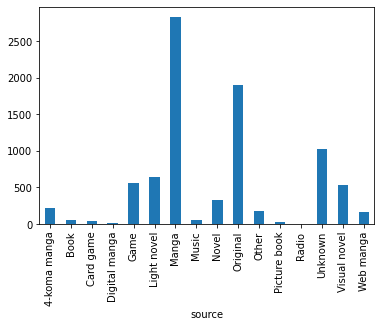

In [415]:
source_size = anime.groupby("source").size()
display(source_size)
source_size.plot.bar()

Najbolj popularna oblika adaptacije je manga. Če bralca zanima kaj katera od stvar imen, svetujem da se samostojno pozanima, da ne bom preveč zašel iz analize podatkov.
Poglejmo sedaj še, kako pa je s povprečnimi ocenami.


source
Light novel      7.131223
Manga            7.044731
Novel            6.956557
Web manga        6.914340
4-koma manga     6.832780
Book             6.789388
Original         6.671859
Visual novel     6.633593
Game             6.534111
Card game        6.448723
Other            6.438859
Picture book     6.435909
Unknown          6.384198
Music            6.379643
Radio            6.012000
Digital manga    5.962500
Name: score, dtype: float64

<AxesSubplot:xlabel='source'>

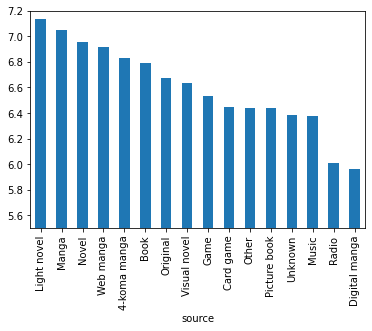

In [421]:
source = anime.groupby("source").mean("score").sort_values("score", ascending=False)["score"]
display(source)
source.plot.bar(ylim=(5.5, 7.2))

Po mnenju skupnosti so tako najbolje adaptirane lahke novele, za njimi pa potem manga in novele.
Pa si poglejmo še najboljše adaptacije posameznega vira.


In [431]:
Ada = anime["source"].unique()

for source in Ada:
    display(source)
    filter1 = anime[anime["source"] == source]
    filter_gintama =  filter1[(filter1["name"].str.contains("Gintama", re.IGNORECASE) == False) | (filter1["name"].str.contains("Gintama Season 4"))]
    display(filter_gintama[["name", "score", "year", "episodes"]].head(5))

'Manga'

name  score  year  \
3946                    Fullmetal Alchemist: Brotherhood   9.22  2009   
9813                         Gintama° (Gintama Season 4)   9.11  2015   
6431            Hunter x Hunter (2011) (Hunter x Hunter)   9.11  2011   
14687                 Shingeki no Kyojin Season 3 Part 2   9.07  2019   
12700  3-gatsu no Lion 2nd Season (March Comes In Lik...   9.02  2017   

       episodes  
3946         64  
9813         51  
6431        148  
14687        10  
12700        22

'Visual novel'

name  score  year  \
5647                                         Steins;Gate   9.12  2011   
3512        Clannad: After Story (Clannad ~After Story~)   8.96  2008   
11520  Fate/stay night Movie: Heaven's Feel - III. Sp...   8.76  2020   
11519  Fate/stay night Movie: Heaven's Feel - II. Los...   8.60  2019   
10437                                      Steins;Gate 0   8.52  2018   

       episodes  
5647         24  
3512         24  
11520         1  
11519         1  
10437        23

'Novel'

name  score  year  \
741    Ginga Eiyuu Densetsu (Legend of the Galactic H...   9.10  1988   
16048                                    Tian Guan Ci Fu   8.72  2020   
404           Howl no Ugoku Shiro (Howl's Moving Castle)   8.67  2004   
5123          Yojouhan Shinwa Taikei (The Tatami Galaxy)   8.61  2010   
13199  Kimi no Suizou wo Tabetai (I want to eat your ...   8.60  2018   

       episodes  
741         110  
16048        11  
404           1  
5123         11  
13199         1

'Original'

name  score  year  episodes
11148                    Kimi no Na wa. (Your Name.)   9.00  2016         1
2649              Code Geass: Hangyaku no Lelouch R2   8.91  2008        25
176    Sen to Chihiro no Kamikakushi (Spirited Away)   8.84  2001         1
0                                       Cowboy Bebop   8.79  1998        26
142                Mononoke Hime (Princess Mononoke)   8.73  1997         1

'Light novel'

name  score  year  \
12734  Owarimonogatari 2nd Season (Owarimonogatari Se...   8.93  2017   
10952                   Kizumonogatari III: Reiketsu-hen   8.82  2017   
7521                    Monogatari Series: Second Season   8.78  2013   
14574  Seishun Buta Yarou wa Yumemiru Shoujo no Yume ...   8.70  2019   
4939                       Suzumiya Haruhi no Shoushitsu   8.67  2010   

       episodes  
12734         7  
10952         1  
7521         26  
14574         1  
4939          1

'Web manga'

name  score  year  episodes
14053                                 Mob Psycho 100 II   8.86  2019        13
13670  Made in Abyss Movie 3: Fukaki Tamashii no Reimei   8.78  2020         1
12315                                     Made in Abyss   8.76  2017        13
10326                                     One Punch Man   8.60  2015        12
11102                                    Mob Psycho 100   8.49  2016        12

'Game'

name  score  year  episodes
17259                                          Gotcha!   8.47  2020         1
10699         Persona 3 the Movie 4: Winter of Rebirth   8.03  2016         1
2687       Final Fantasy VII: Advent Children Complete   7.98  2009         1
14437  Fate/Grand Order: Zettai Majuu Sensen Babylonia   7.97  2019        21
13726                                 IDOLiSH7 Vibrato   7.96  2018         8

'Music'

name  score  year  \
12137                                            Shelter   8.35  2016   
671    Interstella5555: The 5tory of The 5ecret 5tar ...   8.13  2003   
5940                                       Snow Halation   7.72  2010   
16291                               Tokyo Autumn Session   7.60  2020   
12552                                  Happy Party Train   7.56  2017   

       episodes  
12137         1  
671           1  
5940          1  
16291         1  
12552         1

'4-koma manga'

name  score  year  episodes
5808             K-On! Movie (K-ON! The Movie)   8.34  2011         1
10934        Working!!!: Lord of the Takanashi   8.21  2016         1
5125                   K-On!! (K-ON! Season 2)   8.15  2010        26
7678   Hidamari Sketch: Sae Hiro Sotsugyou-hen   8.10  2013         2
9309                  Working!!! (Wagnaria!!3)   8.05  2015        13

'Other'

name  score  year  \
7436   Kaguya-hime no Monogatari (The Tale of the Pri...   8.24  2013   
3857                 Ramayana: The Legend of Prince Rama   7.99  1992   
363                                       Haibane Renmei   7.99  2002   
15741                Aggressive Retsuko (ONA) 3rd Season   7.96  2020   
16143  Love Live! Nijigasaki Gakuen School Idol Douko...   7.91  2020   

       episodes  
7436          1  
3857          1  
363          13  
15741        10  
16143        13

'Unknown'

name  score  year  episodes
4761                                       xxxHOLiC Rou   8.23  2010         2
3867                                 Tsubasa: Shunraiki   8.14  2009         2
1251        Yuusha-Ou GaoGaiGar Final (GaoGaiGar Final)   8.08  2000         8
2236  Koukaku Kidoutai: Stand Alone Complex 2nd GIG ...   8.02  2006         1
3786  Aria the Origination: Sono Choppiri Himitsu no...   8.02  2008         1

'Book'

name  score  year  episodes
1962                               Tanoshii Muumin Ikka   8.10  1990        78
1783                                  Arashi no Yoru ni   7.72  2005         1
2110                               Muumindani no Suisei   7.68  1992         1
1540                                     Romeo x Juliet   7.67  2007        24
6817  Madang-eul Naon Amtalg (Daisy: A Hen into the ...   7.63  2011         1

'Picture book'

name  score  year  \
5632                  Omae Umasou da na (You Are Umasou)   8.02  2010   
11634                                       Honobono Log   7.40  2016   
2086   Little Nemo (Little Nemo: Adventures in Slumbe...   7.26  1989   
4820                                   Kaidan Restaurant   7.26  2009   
2006                       Chirin no Suzu (Ringing Bell)   7.07  1978   

       episodes  
5632          1  
11634        10  
2086          1  
4820         23  
2006          1

'Card game'

name  score  year  \
8471   Shingeki no Bahamut: Genesis (Rage of Bahamut:...   7.69  2014   
10501  Shingeki no Bahamut: Virgin Soul (Rage of Baha...   7.48  2017   
8992                              Selector Spread WIXOSS   7.40  2014   
8568                            Selector Infected WIXOSS   7.28  2014   
10751                   Selector Destructed WIXOSS Movie   7.23  2016   

       episodes  
8471         12  
10501        24  
8992         12  
8568         12  
10751         1

'Digital manga'

name  score  year  \
13284  Katainaka ni Totsuidekita ○-ssia Musume to H S...   7.17  2017   
14804  Chikan Shita Joshi*sei to Sonogo, Musabori Au ...   7.16  2018   
11999  Oshiete! Galko-chan: Natsuyasumitte Hontou Des...   7.14  2017   
11048   Oshiete! Galko-chan (Please tell me! Galko-chan)   7.13  2016   
15510      Mao Yao de Huo Han (Love Story of Cat Spirit)   6.76  2018   

       episodes  
13284         4  
14804         2  
11999         1  
11048        12  
15510        20

'Radio'

name  score  year  \
2280                             Chance Triangle Session   6.55  2001   
680                                    Trouble Chocolate   6.54  1999   
6237   Mobile Suit Gundam 0083: Stardust Memory - The...   6.01  1992   
2241       Dennou Sentai Voogie's★Angel (Voogie's Angel)   5.54  1997   
10540                          Suzakinishi The Animation   5.42  2015   

       episodes  
2280         13  
680          20  
6237          1  
2241          3  
10540        12

## Zaključek

Ugotovili, smo, da na končno oceno še najbolj vpliva rating, poleg zgodbe in izgleda seveda. Morda nismo izvedeli nič prav zares presenetljivega, smo pa definirali najboljši anime za vsako podkategorijo, ki si jo lahko povprečen navdušenec zamisli (razen žanra Slice of Life). 

Uporabnik si lahko naloži program in poišče, ter primerja svoje najljubše animeje, ali pa animjej, ki bi jih želel pogledati.

Funkcija spremje seznam nizov, ki so v imenu, in vrne ven vse primere animejev, ki vsebujejo besedo v imenu.

In [468]:

def search(seznam):
    output = anime
    test_final = output["name"].str.contains("test_final")
    for name in seznam:
        test = output["name"].str.contains(name)
        test_final = (test_final | test)
    output = output[test_final]
    pd.set_option_max_rows=None
    display(output)
    return     


name  \
100                                                           Fullmetal Alchemist   
403                               Fullmetal Alchemist: The Conqueror of Shamballa   
619                                              Fullmetal Alchemist: Reflections   
823                                       Fullmetal Alchemist: Premium Collection   
3946                                             Fullmetal Alchemist: Brotherhood   
4561                                    Fullmetal Alchemist: Brotherhood Specials   
5155                            Fullmetal Alchemist: Brotherhood - 4-Koma Theater   
5614                                Fullmetal Alchemist: The Sacred Star of Milos   
5647                                                                  Steins;Gate   
6362                       Fullmetal Alchemist: The Sacred Star of Milos Specials   
6372                                        Steins;Gate: Oukoubakko no Poriomania   
6521                                   Steins;Gate Movie: Fuka Ryouiki no Déjà vu   
9585                             Steins;Gate: Soumei Eichi no Cognitive Computing   
10437                                                               Steins;Gate 0   
10733                                       Re:Zero kara Hajimeru Isekai Seikatsu   
11103                 Steins;Gate: Kyoukaimenjou no Missing Link - Divide By Zero   
11570                                            Re:Zero kara Hajimeru Break Time   
13303                         Re:Zero kara Hajimeru Isekai Seikatsu - Memory Snow   
14041          Steins;Gate 0: Kesshou Takei no Valentine - Bittersweet Intermedio   
14622                 Re:Zero kara Hajimeru Isekai Seikatsu - Hyouketsu no Kizuna   
15412                            Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season   
15589          Re:Zero kara Hajimeru Isekai Seikatsu - Memory Snow - Manner Movie   
16559  Re:Zero kara Hajimeru Isekai Seikatsu - Hyouketsu no Kizuna - Manner Movie   
16838                     Re:Zero kara Hajimeru Isekai Seikatsu 2nd Season Part 2   
16924                                 Re:Zero kara Hajimeru Break Time 2nd Season   
17128            Re:Zero kara Hajimeru Isekai Seikatsu - Memory Snow Announcement   

          id  episodes           status         aired          studio  \
100      121      51.0  Finished Airing   Oct 4, 2003           Bones   
403      430       1.0  Finished Airing  Jul 23, 2005           Bones   
619      664       1.0  Finished Airing  Mar 19, 2005           Bones   
823      908       3.0  Finished Airing  Mar 29, 2006           Bones   
3946    5114      64.0  Finished Airing   Apr 5, 2009           Bones   
4561    6421       4.0  Finished Airing  Aug 26, 2009           Bones   
5155    7902      16.0  Finished Airing  Aug 26, 2009           Bones   
5614    9135       1.0  Finished Airing   Jul 2, 2011           Bones   
5647    9253      24.0  Finished Airing   Apr 6, 2011       White Fox   
6362   10842       4.0  Finished Airing  Jun 10, 2011           Bones   
6372   10863       1.0  Finished Airing  Feb 22, 2012       White Fox   
6521   11577       1.0  Finished Airing  Apr 20, 2013       White Fox   
9585   27957       4.0  Finished Airing  Oct 15, 2014       White Fox   
10437  30484      23.0  Finished Airing  Apr 12, 2018       White Fox   
10733  31240      25.0  Finished Airing   Apr 4, 2016       White Fox   
11103  32188       1.0  Finished Airing   Dec 3, 2015       White Fox   
11570  33142      11.0  Finished Airing   Apr 8, 2016  Studio PuYUKAI   
13303  36286       1.0  Finished Airing   Oct 6, 2018       White Fox   
14041  37492       1.0  Finished Airing  Dec 21, 2018       White Fox   
14622  38414       1.0  Finished Airing   Nov 8, 2019       White Fox   
15412  39587      13.0  Finished Airing   Jul 8, 2020       White Fox   
15589  39921       1.0  Finished Airing   Oct 6, 2018             NaN   
16559  41590       1.0  Finished Airing   Nov 8, 2019       White Fox   
16838  42203       NaN    Not

Slice of Life update, bom mogoče dodal kasneje. Najverjetneje ne bi veliko spremenilo, saj je večina animejev s tem žanrom že vsebovana (Slice of Life skoraj nikoli ni samostojen žanr).

Dolgujem pa še pojasnilo glede *"Slice of Life + School Life + Romance / Comedy / Drama"* in *"Isekai"*.

*"Slice of Life + School Life + Romance / Comedy / Drama"* - anime brez prave zgodbe, ponavadi govori o dijaku, ki ima sicer nek cilj v življenju, vendar ni nobenih zlobnežel ipd. Govori o njemu in grupi njegovih prijatlejv in kaj počnejo vvsakdanjem življenju, s kakpnimi težavami se kot najstniki srečujejo itd. Včasih so težave malo bolj resne, takrat ima dodaten žanr Drama, včasih pa gre zgolj za zbadanje in komedične scene - takrat dobi žanr Comedy. Všasih pa tudi govori o najstniški ljubezni. Take vrste aimeji so v zlati sredini, ker ni stvari, ki bi se zgodila, da bi lahko anime ocenil z manj kot 7, po drugi strani pa tudi se ne zgodi nič, za kar bi ji lahko dal več kot 8.

*Isekai* - je tip animeja, kjer je glavni gralec iz takpnega ali drugačnega razloga prerojen v drugi svet ("dobesedni pomen besede 'isekai' je drugi svet). Ponavadi je to fantazijski svet pol magije itd. Glavni junak postane pustolovec in ponavad ima kakšno super moč, da ga naredi veliko bojšega od drugih. Podobno kot pri zgornjem primeru. Stvari se dogajajo ampak so bodisi predvdljive bodisi neopazne. Tako da na koncu koncev ne moreš oceniti aimeja z več kot 8 in manj kot 7. 